# AuTexTification: Automatic Text Identification

**Group's name**: "Topic4_Group4"

**Members**: Surnames, Names (Student ID):
- Rizzo, Marco (10613174)
- Nogara Notarianni, Michelangelo Olmo (10625064)
- Stabile, Pietro (10688876)
- Cortese, Emanuele (10845923)

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install -U spacy

In [ ]:
! pip install lexical-diversity

In [ ]:
import sys
!{sys.executable} -m spacy download en_core_web_sm
!{sys.executable} -m spacy download es_core_news_sm;

In [ ]:
!{sys.executable} -m pip install xgboost

In [ ]:
!pip install tensorflow-addons

In [ ]:
!pip install keras-metrics

In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import pandas as pd
import scipy.sparse as sp
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline, FeatureUnion


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_selection import RFE

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from collections import defaultdict

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import gensim.downloader as api
import string

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import tensorflow_addons as tfa
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
import transformers
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from transformers import AdamW

from transformers import TrainingArguments, Trainer
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torchvision
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
import nltk
nltk.download('words')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, RegexpParser
from lexical_diversity import lex_div as ld
from collections import defaultdict
import math

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

import re

import spacy
import en_core_web_sm
import pandas as pd

from textblob import TextBlob

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install textstat

In [ ]:
import textstat

In [ ]:
import ast
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer

# **Task 1**

For our project, we have **short text passages that have either been written by a human or have been generated automatically by a Language Model**. The aim of this first part of the project is to predict the author of the above texts. In particular we will deal with two datasets: the first one being in **English** and the second one in **Spanish**.

# **Subtask 1** - *English*

## Preliminary Analysis



### Data preparation

We start from data preparation.

#### Data loading

We load the documents that we will use for the first task.

In [ ]:
task1_en_filenameTSV = r"/content/gdrive/MyDrive/PROJ/AUTEXTIFICATION/subtask_1/en/train.tsv"

We print the occurencies of each class, checking if the dataset is balanced:

In [ ]:
dataset_task1_en=pd.read_csv(task1_en_filenameTSV,sep='\t')
print(dataset_task1_en)

          id                                               text      label
0      12322  you need to stop the engine and wait until it ...  generated
1       1682  The Commission shall publish the report; an in...  generated
2      22592  I have not been tweeting a lot lately, but I d...  generated
3      17390  I pass my exam and really thankgod for that bu...      human
4      30453  The template will have 3 parts: a mustache sha...      human
...      ...                                                ...        ...
33840  16850  @PierreJoye i have a server already, thanks fo...      human
33841   6265  10. Article 13 of Council Directive 80/777/EEC...      human
33842  11284  Crying because I have to cry for you?. No. No,...  generated
33843    860  However, it will continue to offer customers a...  generated
33844  15795  @kamitchell I suppose, but I figure Aubrey de ...      human

[33845 rows x 3 columns]


In [ ]:
print('English data:\n')
counts_en = dataset_task1_en['label'].value_counts()
print(counts_en)

English data:

human        17046
generated    16799
Name: label, dtype: int64


Since the dataset is balanced, no further operations (augmentations, downsampling, upsampling) are needed.

Before approaching the analysis, we transform the **label** "generated/human" in binary form: generated being 0, human being 1.

In [ ]:
label_encoder = preprocessing.LabelEncoder()
labels_en = label_encoder.fit_transform(dataset_task1_en['label'])

for i in range(5):
  print(labels_en[i], '=>', dataset_task1_en['label'][i])

0 => generated
0 => generated
0 => generated
1 => human
1 => human


We *split the dataset* in three sets: **training, validation and test**, respectively of 70%-15%-15% of the whole dataset.

In [ ]:
train_df1_en, temp_df1_en, train_labels_en, temp_labels_en = train_test_split(dataset_task1_en['text'], labels_en, test_size=0.3, stratify=labels_en, random_state=2307)
val_df1_en, test_df1_en, val_labels_en, test_labels_en = train_test_split(temp_df1_en, temp_labels_en, test_size=0.5, stratify=temp_labels_en, random_state=2307)

In [ ]:
print(f'training set has shape {train_df1_en.shape} and is associated to {len(train_labels_en)} labels')
print(f'validation set has shape {val_df1_en.shape} and is associated to {len(val_labels_en)} labels')
print(f'testing set has shape {test_df1_en.shape} and is associated to {len(test_labels_en)} labels')

training set has shape (23691,) and is associated to 23691 labels
validation set has shape (5077,) and is associated to 5077 labels
testing set has shape (5077,) and is associated to 5077 labels


## Feature Extraction

Firstly, we extract some useful feature from the three datasets.

### Part of Speech (**POS**), Named Entity Recognition (**NER**) and Dependency Parsing

We load the English spacy model. The "**en_core_web_sm**" has been trained on written text (blogs, news, comments) and it has been optimized for CPU.

In [ ]:
nlp_model = en_core_web_sm.load()

We define the list to store parsed sentences, POS, NER and DEP tags.

Then we parse the training data using the spacy model and extract the tags above.

In [ ]:
#----------------------------------------TRAIN--------------------------------------------------
parsed_train_en = []
pos_tags_train_en = []
ner_tags_train_en = []
dep_parses_train_en = []

for index, text in enumerate(train_df1_en):
    doc = nlp_model(text)
    pos_tags = [token.pos_ for token in doc]
    ner_tags = [token.ent_type_ for token in doc]
    dep_tags = [token.dep_  for token in doc]
    parsed_train_en.append((text, pos_tags, ner_tags, dep_tags, train_labels_en[index]))
    pos_tags_train_en.append(pos_tags)
    ner_tags_train_en.append(ner_tags)
    dep_parses_train_en.append(dep_tags)

We repeat the same procedure for validation and test sets.

In [ ]:
#----------------------------------------VALIDATION--------------------------------------------------

parsed_val_en = []
pos_tags_val_en = []
ner_tags_val_en = []
dep_parses_val_en = []

for index, text in enumerate(val_df1_en):
    doc = nlp_model(text)
    pos_tags = [token.pos_ for token in doc]
    ner_tags = [token.ent_type_ for token in doc]
    dep_tags = [token.dep_  for token in doc]
    parsed_val_en.append((text, pos_tags, ner_tags, dep_tags, val_labels_en[index]))
    pos_tags_val_en.append(pos_tags)
    ner_tags_val_en.append(ner_tags)
    dep_parses_val_en.append(dep_tags)

#----------------------------------------TEST--------------------------------------------------

parsed_test_en = []
pos_tags_test_en = []
ner_tags_test_en = []
dep_parses_test_en = []

for index, text in enumerate(test_df1_en):
    doc = nlp_model(text)
    pos_tags = [token.pos_ for token in doc]
    ner_tags = [token.ent_type_ for token in doc]
    dep_tags = [token.dep_  for token in doc]
    parsed_test_en.append((text, pos_tags, ner_tags, dep_tags, test_labels_en[index]))
    pos_tags_test_en.append(pos_tags)
    ner_tags_test_en.append(ner_tags)
    dep_parses_test_en.append(dep_tags)

We create dataframes for the training, validation and test data with the text, POS/NER/DEP tags and labels.

In [ ]:
#----------------------------------------TRAIN--------------------------------------------------
train_df1_en_features = pd.DataFrame({
    'text': [t[0] for t in parsed_train_en],
    'pos_tags': pos_tags_train_en,
    'ner_tags': ner_tags_train_en,
    'dep_tags': dep_parses_train_en,
    'label': [t[4] for t in parsed_train_en]
})

#----------------------------------------VALIDATION--------------------------------------------------
val_df1_en_features = pd.DataFrame({
    'text': [t[0] for t in parsed_val_en],
    'pos_tags': pos_tags_val_en,
    'ner_tags': ner_tags_val_en,
    'dep_tags': dep_parses_val_en,
    'label': [t[4] for t in parsed_val_en]
})

#----------------------------------------TEST--------------------------------------------------
test_df1_en_features = pd.DataFrame({
    'text': [t[0] for t in parsed_test_en],
    'pos_tags': pos_tags_test_en,
    'ner_tags': ner_tags_test_en,
    'dep_tags': dep_parses_test_en,
    'label': [t[4] for t in parsed_test_en]
})

### Lexical Features

We compute some **lexical features** described in the paper: https://aclanthology.org/W12-2019.pdf.

The features are:


*   *Mean Textual Lessical Density* (**MTLD**): it measure the structure and complexity of human communication in a language. The higher the value, the more complex is the text.
* *Verb Variation-1* (**VV1**): is the ratio of number of verbs types to total number verb tokens in a text.
* *Squared VV1* (**SVV1**): is the square of VV1.
* *Corrected VV1* (**CVV1**):  is the value of VV1 multiplied by sqrt(n/2), where n is the total number of verbs in a text.
* *Verb Variation 2* (**VV2**): $VV2=1-\frac{\sum_{k=1}^{N_{1}} (\text{${Count
Verb}_{k}$})^2}{{N_2}^2 + 1}$ where $N_1$ is the total number of unique verbs and $N_2$ is the total number of verbs in the text.
* *Noun Variation* (**NV**): same ratio as VV1 but with nouns.
* *Type-Token Ratio* (**TTR**): is the ratio of number of words types (T) to total number word tokens in a text (N).
* *Root TTR* (**RTTR**): $\frac{T}{\sqrt{N}}$
* *Corrected Type-Token-Ratio* (**CTTR**): $\frac{T}{\sqrt{2N}}$
* *Logarithmic TTR* (**LogTTR**): ${log(\frac{T}{N})}$
* *Lexical Word Variation* (**LV**): is a measure that quantifies the diversity or variation of lexical (word) choices in a text. A higher LV value indicates a greater variety and diversity of lexical choices in the text, suggesting a richer vocabulary.
* *Adjective Variation* (**AdjV**): same as LV but with adjective.
* *Adverb Variation* (**AdvV**): same as LV but with adverbs.


In [ ]:
# VV1
def vv1(text):
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha()]
    tagged_tokens = nltk.pos_tag(tokens, lang='eng')
    verbs = set([word for word, pos in tagged_tokens if pos.startswith('V')])
    return (len(verbs)+1) / (len(tagged_tokens)+1)

# SVV1
def calculate_svv1(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    verbs = [token for token, pos in tagged_tokens if pos.startswith('VB')]
    verb_counts = defaultdict(int)
    for verb in verbs:
        verb_counts[verb] += 1
    svv1 = sum(count**2 for count in verb_counts.values())
    return svv1

# CVV1
def calculate_cvv1(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    verbs = [token for token, pos in tagged_tokens if pos.startswith('VB')]
    verb_counts = defaultdict(int)
    for verb in verbs:
        verb_counts[verb] += 1
    cvv1 = sum(1 / count for count in verb_counts.values())
    return cvv1

# VV2
def calculate_vv2(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    verbs = [token for token, pos in tagged_tokens if pos.startswith('VB')]
    verb_counts = defaultdict(int)
    for verb in verbs:
        verb_counts[verb] += 1
    total_verbs = len(verbs)
    vv2 = 1 - sum(count**2 for count in verb_counts.values()) / (total_verbs**2 + 1)

    return vv2

# NV
def nv(text):
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha()]
    tagged_tokens = nltk.pos_tag(tokens, lang='eng')
    verbs = set([word for word, pos in tagged_tokens if pos.startswith('N')])
    return (len(verbs) + 1) / (len(tagged_tokens)+ 1 )

# TTR
def calculate_ttr(text):
    text = ''.join(c for c in text if c not in ('!', '.', ',', '?', ':', ';'))
    words = text.lower().split()
    unique_words = set(words)
    ttr = (len(unique_words) + 1) / (len(words)+1)
    return ttr

# CTTR
def calculate_cttr(text):
    text = ''.join(c for c in text if c not in ('!', '.', ',', '?', ':', ';'))
    words = text.lower().split()
    unique_words = set(words)
    ttr = len(unique_words) / len(words)
    text_length = len(words)
    cttr = (ttr + 1) / ((text_length ** 0.5) + 1)
    return cttr

# RTTR
def calculate_rttr(text):
    text = ''.join(c for c in text if c not in ('!', '.', ',', '?', ':', ';'))
    words = text.lower().split()
    unique_words = set(words)
    ttr = ((len(unique_words) + 1)) / (len(words) + 1)
    rttr = ttr ** 0.5
    return rttr

# logTTR
def calculate_logttr(text):
    text = ''.join(c for c in text if c not in ('!', '.', ',', '?', ':', ';'))
    words = text.lower().split()
    unique_words = set(words)
    ttr = (len(unique_words) + 1) / (len(words) + 1)
    logttr = math.log2(ttr)
    return logttr

#LV
def calculate_lv(text):
    tokens = text.split()
    unique_words = set(tokens)
    num_unique_words = len(unique_words)
    total_words = len(tokens)
    lv = (num_unique_words / total_words) * 100
    return lv

# ADJV
def adjective_variation(text):
    doc = nlp_model(text)
    adjective_count = 0
    unique_adjectives = set()
    for token in doc:
        if token.pos_ == 'ADJ':
            adjective_count += 1
            unique_adjectives.add(token.lemma_)
    if adjective_count > 0:
        adjv = (len(unique_adjectives) + 1) /(adjective_count + 1)
    else:
        adjv = 0
    return adjv

# ADVV:
def adverb_variation(text):
    doc = nlp_model(text)
    adverb_count = 0
    unique_adverbs = set()
    for token in doc:
        if token.pos_ == 'ADV':
            adverb_count += 1
            unique_adverbs.add(token.lemma_)
    if adverb_count > 0:
        advv = len(unique_adverbs) / adverb_count
    else:
        advv = 0
    return advv

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# MTLD
#----------------------------------------TRAIN--------------------------------------------------
mtld = []
for i in range(train_df1_en_features.shape[0]):
  text = train_df1_en_features.at[i,'text']
  text = ld.flemmatize(text)
  mtld.append(ld.mtld(text))

train_df1_en_features['mtld'] = mtld

#----------------------------------------VALIDATION--------------------------------------------------
mtld = []
for i in range(val_df1_en_features.shape[0]):
  text = val_df1_en_features.at[i,'text']
  text = ld.flemmatize(text)
  mtld.append(ld.mtld(text))

val_df1_en_features['mtld'] = mtld

#----------------------------------------TEST--------------------------------------------------
mtld = []
for i in range(test_df1_en_features.shape[0]):
  text = test_df1_en_features.at[i,'text']
  text = ld.flemmatize(text)
  mtld.append(ld.mtld(text))

test_df1_en_features['mtld'] = mtld

In [ ]:
#-------------------------------TRAIN---------------------------------
train_df1_en_features['VV1'] = train_df1_en_features['text'].apply(vv1)
train_df1_en_features['nv'] = train_df1_en_features['text'].apply(nv)
train_df1_en_features['ttr'] = train_df1_en_features['text'].apply(calculate_ttr)
train_df1_en_features['cttr'] = train_df1_en_features['text'].apply(calculate_cttr)
train_df1_en_features['rttr'] = train_df1_en_features['text'].apply(calculate_rttr)
train_df1_en_features['logttr'] = train_df1_en_features['text'].apply(calculate_logttr)
train_df1_en_features['svv1'] = train_df1_en_features['text'].apply(calculate_svv1)
train_df1_en_features['cvv1'] = train_df1_en_features['text'].apply(calculate_cvv1)
train_df1_en_features['lv'] = train_df1_en_features['text'].apply(calculate_lv)
train_df1_en_features['vv2'] = train_df1_en_features['text'].apply(calculate_vv2)
train_df1_en_features['advv'] = train_df1_en_features['text'].apply(adverb_variation)
train_df1_en_features['advjv'] = train_df1_en_features['text'].apply(adjective_variation)

#----------------------------VALIDATION-------------------------------
val_df1_en_features['VV1'] = val_df1_en_features['text'].apply(vv1)
val_df1_en_features['nv'] = val_df1_en_features['text'].apply(nv)
val_df1_en_features['ttr'] = val_df1_en_features['text'].apply(calculate_ttr)
val_df1_en_features['cttr'] = val_df1_en_features['text'].apply(calculate_cttr)
val_df1_en_features['rttr'] = val_df1_en_features['text'].apply(calculate_rttr)
val_df1_en_features['logttr'] = val_df1_en_features['text'].apply(calculate_logttr)
val_df1_en_features['svv1'] = val_df1_en_features['text'].apply(calculate_svv1)
val_df1_en_features['cvv1'] = val_df1_en_features['text'].apply(calculate_cvv1)
val_df1_en_features['lv'] = val_df1_en_features['text'].apply(calculate_lv)
val_df1_en_features['vv2'] = val_df1_en_features['text'].apply(calculate_vv2)
val_df1_en_features['advv'] = val_df1_en_features['text'].apply(adverb_variation)
val_df1_en_features['advjv'] = val_df1_en_features['text'].apply(adjective_variation)

#----------------------------TEST-------------------------------
test_df1_en_features['VV1'] = test_df1_en_features['text'].apply(vv1)
test_df1_en_features['nv'] = test_df1_en_features['text'].apply(nv)
test_df1_en_features['ttr'] = test_df1_en_features['text'].apply(calculate_ttr)
test_df1_en_features['cttr'] = test_df1_en_features['text'].apply(calculate_cttr)
test_df1_en_features['rttr'] = test_df1_en_features['text'].apply(calculate_rttr)
test_df1_en_features['logttr'] = test_df1_en_features['text'].apply(calculate_logttr)
test_df1_en_features['svv1'] = test_df1_en_features['text'].apply(calculate_svv1)
test_df1_en_features['cvv1'] = test_df1_en_features['text'].apply(calculate_cvv1)
test_df1_en_features['lv'] = test_df1_en_features['text'].apply(calculate_lv)
test_df1_en_features['vv2'] = test_df1_en_features['text'].apply(calculate_vv2)
test_df1_en_features['advv'] = test_df1_en_features['text'].apply(adverb_variation)
test_df1_en_features['advjv'] = test_df1_en_features['text'].apply(adjective_variation)

### Syntatic Features

We compute some **syntatic features** described in the paper: https://aclanthology.org/W12-2019.pdf.

**Disclaimer**:
- *Clause*: any structure with a subject and a finite verb.
- *Sentence*: considered to be a group of words delimited with punctuation mark.
- *T-unit*: char- acterized as one main clause plus any subordinate clause or non-clausal structure that is attached to or embedded in it.

The features are:

*   *Mean length of clause* (**MLC**)
*   *Mean length of a sentence* (**MLS**)
*   *Mean length of T-unit* (**MLT**)
*   *Num. of Clauses per Sentence* (**C/S**)
*   *Num. of Complex-T-Units per T-unit* (**CT/T**)
*   *Num. of Clauses per T-unit* (**C/T**)
*   *Num. of T-Units per sentence* (**T/S**)
*   *Dependent Clause to Clause Ratio* (**DC/C**)
*   *Co-ordinate Phrases per Clause* (**CP/C**)
*   *Co-ordinate Phrases per T-unit* (**CP/T**)
*   *Dependent Clause to T-unit Ratio* (**DC/T**)
*   *Complex Nominals per Clause* (**CN/C**)
*   *Complex Nominals per T-unit* (**CN/T**)
*   *Verb phrases per T-unit* (**VP/T**)

In [ ]:
# MLC:
def mlc(text):
    doc = nlp_model(text)
    clauses = [sent for sent in doc.sents]
    return sum([len(clause) for clause in clauses]) / len(clauses)

# MLS
def mls(text):
    sentences = nltk.sent_tokenize(text)
    return sum([len(sentence.split()) for sentence in sentences]) / len(sentences)

# MLT
def mlt(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    t_units = nltk.tokenize.sent_tokenize(text)
    t_unit_lengths = [len(nltk.word_tokenize(t_unit)) for t_unit in t_units]
    return sum(t_unit_lengths) / len(t_unit_lengths)

# C/S
def calcola_CS(testo):
    doc = nlp_model(testo)
    num_frases = len(list(doc.sents))
    num_clausole = sum([len(list(sent)) for sent in doc.sents])
    return num_clausole / num_frases if num_frases > 0 else 0

# C/T
def calcola_CT(testo):
    doc = nlp_model(testo)
    num_frases = len(list(doc.sents))
    num_clausole = sum([len(list(sent)) for sent in doc.sents])
    return num_clausole / num_frases if num_frases > 0 else 0

# T/S
def t_units_per_sentence(text):
    blob = TextBlob(text)
    t_count = 0
    sentence_count = 0
    for sentence in blob.sentences:
        t_count += len(sentence.strip().split(';'))
        sentence_count += 1
    if sentence_count > 0:
        t_s = t_count / sentence_count
    else:
        t_s = 0
    return t_s

# CT/T
def complex_tunits_per_tunit(text):
    blob = TextBlob(text)
    t_count = 0
    complex_t_count = 0
    for sentence in blob.sentences:
        for tunit in sentence.strip().split(';'):
            t_count += 1
            tunit_blob = TextBlob(tunit)
            if len(tunit_blob.sentences) > 1:
                complex_t_count += 1
            else:
                for sub_tunit in tunit_blob.split(','):
                    if len(sub_tunit.sentences) > 1:
                        complex_t_count += 1
    if t_count > 0:
        ct_t = complex_t_count / t_count
    else:
        ct_t = 0
    return ct_t

# DC/C
def dependent_clause_to_clause_ratio(text):
    doc = nlp_model(text)
    clause_count = 0
    dependent_clause_count = 0
    for sentence in doc.sents:
        clause_count += len([token for token in sentence if token.dep_ == 'ROOT'])
        dependent_clause_count += len([token for token in sentence if token.dep_ != 'ROOT'])
    if clause_count > 0:
        dc_c = dependent_clause_count / clause_count
    else:
        dc_c = 0
    return dc_c

# CP/C
def coordinate_phrases_per_clause(text):
    doc = nlp_model(text)
    clause_count = 0
    coordinate_phrases_count = 0
    for sentence in doc.sents:
        for token in sentence:
            if token.dep_ == 'ROOT':
                clause_count += 1
                coordinate_phrases_count += len([child for child in token.children if child.dep_ == 'COORD'])
    if clause_count > 0:
        cp_c = coordinate_phrases_count / clause_count
    else:
        cp_c = 0
    return cp_c

# CP/T
def coordinate_phrases_per_tunit(text):
    doc = nlp_model(text)
    tunit_count = 0
    coordinate_phrases_count = 0
    for sentence in doc.sents:
        for token in sentence:
            if token.pos_ == 'VERB' and 'PRED' in token.dep_:
                tunit_count += 1
                coordinate_phrases_count += len([child for child in token.head.children if child.dep_ == 'COORD'])
    if tunit_count > 0:
        cp_t = coordinate_phrases_count / tunit_count
    else:
        cp_t = 0
    return cp_t

# DC/T
def calcola_DC_T(testo):
    doc = nlp_model(testo)
    num_frases = len(list(doc.sents))
    num_clausole = sum([len(list(sent)) for sent in doc.sents])
    num_clausole_dipendenti = sum([1 for token in doc if token.dep_ != 'ROOT'])
    return num_clausole_dipendenti / num_frases if num_frases > 0 else 0

# CP/C
def calcola_CP_C(testo):
    doc = nlp_model(testo)
    num_clausole = sum([len(list(sent)) for sent in doc.sents])
    num_frasi_coordinate = sum([1 for token in doc if token.dep_ == 'cc'])
    return num_frasi_coordinate / num_clausole if num_clausole > 0 else 0

# CN/C
def calcola_CN_C(testo):
    doc = nlp_model(testo)
    num_clausole = sum([len(list(sent)) for sent in doc.sents])
    num_nominali_complessi = sum([1 for token in doc if token.dep_ == 'amod' and token.head.pos_ == 'NOUN'])
    return num_nominali_complessi / num_clausole if num_clausole > 0 else 0

# CN/T
def calcola_CN_T(testo):
    doc = nlp_model(testo)
    num_frases = len(list(doc.sents))
    num_nominali_complessi = sum([1 for token in doc if token.dep_ == 'amod' and token.head.pos_ == 'NOUN'])
    return num_nominali_complessi / num_frases if num_frases > 0 else 0

# VP/T
def calcola_VP_T(testo):
    doc = nlp_model(testo)
    num_frases = len(list(doc.sents))
    num_frases_verbali = sum([1 for sent in doc.sents if any(token.pos_ == 'VERB' for token in sent)])
    return num_frases_verbali / num_frases if num_frases > 0 else 0

In [ ]:
#-----------------------------TRAIN-------------------------------
train_df1_en_features['mlc'] = train_df1_en_features['text'].apply(mlc)
train_df1_en_features['mls'] = train_df1_en_features['text'].apply(mls)
train_df1_en_features['mlt'] = train_df1_en_features['text'].apply(mlt)
train_df1_en_features['clause_per_sentence'] = train_df1_en_features['text'].apply(calcola_CS)
train_df1_en_features['t_units_per_sentence'] = train_df1_en_features['text'].apply(t_units_per_sentence)
train_df1_en_features['dependent_clause_to_clause_ratio'] = train_df1_en_features['text'].apply(dependent_clause_to_clause_ratio)
train_df1_en_features['coordinate_phrases_per_clause'] = train_df1_en_features['text'].apply(coordinate_phrases_per_clause)
train_df1_en_features['coordinate_phrases_per_tunit'] = train_df1_en_features['text'].apply(coordinate_phrases_per_tunit)
train_df1_en_features['clause_per_tunits'] = train_df1_en_features['text'].apply(calcola_CT)
train_df1_en_features['dependent_clause_per_tunits'] = train_df1_en_features['text'].apply(calcola_DC_T)
train_df1_en_features['coordinate_phrase_per_clause'] = train_df1_en_features['text'].apply(calcola_CP_C)
train_df1_en_features['complex_nominal_per_clause'] = train_df1_en_features['text'].apply(calcola_CN_C)
train_df1_en_features['complex_nominal_per_tunits'] = train_df1_en_features['text'].apply(calcola_CN_T)
train_df1_en_features['verb_phrase_per_tunits'] = train_df1_en_features['text'].apply(calcola_VP_T)

#-----------------------------VALIDATION-------------------------------
val_df1_en_features['mlc'] = val_df1_en_features['text'].apply(mlc)
val_df1_en_features['mls'] = val_df1_en_features['text'].apply(mls)
val_df1_en_features['mlt'] = val_df1_en_features['text'].apply(mlt)
val_df1_en_features['clause_per_sentence'] = val_df1_en_features['text'].apply(calcola_CS)
val_df1_en_features['t_units_per_sentence'] = val_df1_en_features['text'].apply(t_units_per_sentence)
val_df1_en_features['dependent_clause_to_clause_ratio'] = val_df1_en_features['text'].apply(dependent_clause_to_clause_ratio)
val_df1_en_features['coordinate_phrases_per_clause'] = val_df1_en_features['text'].apply(coordinate_phrases_per_clause)
val_df1_en_features['coordinate_phrases_per_tunit'] = val_df1_en_features['text'].apply(coordinate_phrases_per_tunit)
val_df1_en_features['clause_per_tunits'] = val_df1_en_features['text'].apply(calcola_CT)
val_df1_en_features['dependent_clause_per_tunits'] = val_df1_en_features['text'].apply(calcola_DC_T)
val_df1_en_features['coordinate_phrase_per_clause'] = val_df1_en_features['text'].apply(calcola_CP_C)
val_df1_en_features['complex_nominal_per_clause'] = val_df1_en_features['text'].apply(calcola_CN_C)
val_df1_en_features['complex_nominal_per_tunits'] = val_df1_en_features['text'].apply(calcola_CN_T)
val_df1_en_features['verb_phrase_per_tunits'] = val_df1_en_features['text'].apply(calcola_VP_T)

#-----------------------------TEST-------------------------------
test_df1_en_features['mlc'] = test_df1_en_features['text'].apply(mlc)
test_df1_en_features['mls'] = test_df1_en_features['text'].apply(mls)
test_df1_en_features['mlt'] = test_df1_en_features['text'].apply(mlt)
test_df1_en_features['clause_per_sentence'] = test_df1_en_features['text'].apply(calcola_CS)
test_df1_en_features['t_units_per_sentence'] = test_df1_en_features['text'].apply(t_units_per_sentence)
test_df1_en_features['dependent_clause_to_clause_ratio'] = test_df1_en_features['text'].apply(dependent_clause_to_clause_ratio)
test_df1_en_features['coordinate_phrases_per_clause'] = test_df1_en_features['text'].apply(coordinate_phrases_per_clause)
test_df1_en_features['coordinate_phrases_per_tunit'] = test_df1_en_features['text'].apply(coordinate_phrases_per_tunit)
test_df1_en_features['clause_per_tunits'] = test_df1_en_features['text'].apply(calcola_CT)
test_df1_en_features['dependent_clause_per_tunits'] = test_df1_en_features['text'].apply(calcola_DC_T)
test_df1_en_features['coordinate_phrase_per_clause'] = test_df1_en_features['text'].apply(calcola_CP_C)
test_df1_en_features['complex_nominal_per_clause'] = test_df1_en_features['text'].apply(calcola_CN_C)
test_df1_en_features['complex_nominal_per_tunits'] = test_df1_en_features['text'].apply(calcola_CN_T)
test_df1_en_features['verb_phrase_per_tunits'] = test_df1_en_features['text'].apply(calcola_VP_T)

### Other Useful Features

We also define some other useful features:




*   **Adverbs and Clasuses Percentage** in the text
*   **Punctuations percentage** in the text
*   **Vobabulary Size and Complexity**
*   **Average Sentence and Phrases Length**
*   **Easeread and Schoolgrade**:
      * *Ease of readability* in a document: maximum score 121.22 == very easy, negative infinite == very confusing.  
      * *Estimated school grade* level required to understand the text: e.g. 9.3 = a ninth grader would be able to read the document





In [ ]:
def perc_punctuations(text):
  tokens = word_tokenize(text)
  punctuations = [+1 for word in tokens if word.isalpha()==0 and word.lower()]
  words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower()]
  return round(len(punctuations)/len(words+punctuations),2)

def vocab_size_complexity(text):
  tokens = word_tokenize(text)
  words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower()]
  vocab_size = len(set(words))
  vocab_complexity = (vocab_size + 1) / (len(words) + 1)
  return round(vocab_size,2), round(vocab_complexity,2)

def avarage_sentence_phrases_length(text):
    num_sentences = textstat.sentence_count(text)
    num_words = textstat.lexicon_count(text)
    avg_sentence_length = float(num_words) / float(num_sentences)
    phrases = re.split('[;,\.\n]', text)
    num_phrases = len(phrases)
    num_words = textstat.lexicon_count(text)
    avg_phrase_length = float(num_words) / float(num_phrases)
    return round(avg_sentence_length,2), round(avg_phrase_length,2)


def easeread_schoolgrade(text):
    ease_read=textstat.flesch_reading_ease(text)
    school_grade=textstat.text_standard(text, float_output=True)
    return ease_read, school_grade

def adv_clasuses_percentage(text):
    tokens = word_tokenize(text)
    words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower()]
    pos_tags = nltk.pos_tag(words)
    adv_count = len([word for word, pos in pos_tags if pos.startswith('R')])
    clauses = [word for word, tag in pos_tags if tag == "IN"]
    return round((adv_count+1)/(len(pos_tags)+1),2), round((len(clauses)+1)/(len(pos_tags)+1),2)

In [ ]:
#---------------------------------TRAIN------------------------------------------------
train_df1_en_features['perc_punctuations'] = train_df1_en_features['text'].progress_apply(perc_punctuations)
train_df1_en_features['vocab_size'] = train_df1_en_features['text'].progress_apply(lambda x: vocab_size_complexity(x)[0])
train_df1_en_features['vocab_complexity_avg'] = train_df1_en_features['text'].progress_apply(lambda x: vocab_size_complexity(x)[1])
train_df1_en_features['avg_sent_len'] = train_df1_en_features['text'].progress_apply(lambda x: avarage_sentence_phrases_length(x)[0])
train_df1_en_features['avg_phrase_length'] = train_df1_en_features['text'].progress_apply(lambda x: avarage_sentence_phrases_length(x)[1])
train_df1_en_features['avg_phrase_length'] = train_df1_en_features['text'].progress_apply(lambda x: avarage_sentence_phrases_length(x)[1])
train_df1_en_features['clauses'] = train_df1_en_features['text'].progress_apply(lambda x: adv_clasuses_percentage(x)[1])
train_df1_en_features['ease_read'] = train_df1_en_features['text'].progress_apply(lambda x: easeread_schoolgrade(x)[0])
train_df1_en_features['school_grade'] = train_df1_en_features['text'].progress_apply(lambda x: easeread_schoolgrade(x)[1])

#---------------------------------VALIDATION------------------------------------------------
val_df1_en_features['perc_punctuations'] = val_df1_en_features['text'].progress_apply(perc_punctuations)
val_df1_en_features['vocab_size'] = val_df1_en_features['text'].progress_apply(lambda x: vocab_size_complexity(x)[0])
val_df1_en_features['vocab_complexity_avg'] = val_df1_en_features['text'].progress_apply(lambda x: vocab_size_complexity(x)[1])
val_df1_en_features['avg_sent_len'] = val_df1_en_features['text'].progress_apply(lambda x: avarage_sentence_phrases_length(x)[0])
val_df1_en_features['avg_phrase_length'] = val_df1_en_features['text'].progress_apply(lambda x: avarage_sentence_phrases_length(x)[1])
val_df1_en_features['avg_adv_count'] = val_df1_en_features['text'].progress_apply(lambda x: adv_clasuses_percentage(x)[0])
val_df1_en_features['clauses'] = val_df1_en_features['text'].progress_apply(lambda x: adv_clasuses_percentage(x)[1])
val_df1_en_features['ease_read'] = val_df1_en_features['text'].progress_apply(lambda x: easeread_schoolgrade(x)[0])
val_df1_en_features['school_grade'] = val_df1_en_features['text'].progress_apply(lambda x: easeread_schoolgrade(x)[1])

#---------------------------------TEST------------------------------------------------
test_df1_en_features['perc_punctuations'] = test_df1_en_features['text'].progress_apply(perc_punctuations)
test_df1_en_features['vocab_size'] = test_df1_en_features['text'].progress_apply(lambda x: vocab_size_complexity(x)[0])
test_df1_en_features['vocab_complexity_avg'] = test_df1_en_features['text'].progress_apply(lambda x: vocab_size_complexity(x)[1])
test_df1_en_features['avg_sent_len'] = test_df1_en_features['text'].progress_apply(lambda x: avarage_sentence_phrases_length(x)[0])
test_df1_en_features['avg_phrase_length'] = test_df1_en_features['text'].progress_apply(lambda x: avarage_sentence_phrases_length(x)[1])
test_df1_en_features['avg_adv_count'] = test_df1_en_features['text'].progress_apply(lambda x: adv_clasuses_percentage(x)[0])
test_df1_en_features['clauses'] = test_df1_en_features['text'].progress_apply(lambda x: adv_clasuses_percentage(x)[1])
test_df1_en_features['ease_read'] = test_df1_en_features['text'].progress_apply(lambda x: easeread_schoolgrade(x)[0])
test_df1_en_features['school_grade'] = test_df1_en_features['text'].progress_apply(lambda x: easeread_schoolgrade(x)[1])

In a file apart, we have added another feature called "**errors**" to the three datasets. It calculate the number of errors in the text. The feature now belong to the datasets listed below.

In [ ]:
train_df1_en_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/train_df1_en_features_laststep.csv')
val_df1_en_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/val_df1_en_features_laststep.csv')
test_df1_en_features= pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/test_df1_en_features_laststep.csv')

Loading the CSV dataset, the pos_tags, ner_tags and dep_tags are read as strings. For this reason we convert them back to python list.

In [ ]:
#---------------------------------TRAIN------------------------------------------------
train_df1_en_features['pos_tags'] = train_df1_en_features['pos_tags'].apply(ast.literal_eval)
train_df1_en_features['ner_tags'] = train_df1_en_features['ner_tags'].apply(ast.literal_eval)
train_df1_en_features['dep_tags'] = train_df1_en_features['dep_tags'].apply(ast.literal_eval)

#---------------------------------VALIDATION------------------------------------------------
val_df1_en_features['pos_tags'] = val_df1_en_features['pos_tags'].apply(ast.literal_eval)
val_df1_en_features['ner_tags'] = val_df1_en_features['ner_tags'].apply(ast.literal_eval)
val_df1_en_features['dep_tags'] = val_df1_en_features['dep_tags'].apply(ast.literal_eval)

#---------------------------------TEST------------------------------------------------
test_df1_en_features['pos_tags'] = test_df1_en_features['pos_tags'].apply(ast.literal_eval)
test_df1_en_features['ner_tags'] = test_df1_en_features['ner_tags'].apply(ast.literal_eval)
test_df1_en_features['dep_tags'] = test_df1_en_features['dep_tags'].apply(ast.literal_eval)

## Data Visualization
We visualize first the features looking for **differences in the two classes**.

### Histograms on POS, NER, DEP

Firstly, we look at the POS, NER and DEP tags calculating the *percentage of each tag for each category* and calculating the *squared differences*

In [ ]:
# Initialize dictionaries to store counts
human_pos_counts = {}
human_ner_counts = {}
human_dep_counts = {}
gen_pos_counts = {}
gen_ner_counts = {}
gen_dep_counts = {}

# Iterate over the rows in the data frame
for i,label in enumerate(train_df1_en_features['label']):
    if label == 1:
      for token in train_df1_en_features['pos_tags'][i]:
        if token not in human_pos_counts:
            human_pos_counts[token] = 1
        else:
            human_pos_counts[token] += 1
      for token in train_df1_en_features['ner_tags'][i]:
        if token not in human_ner_counts:
            human_ner_counts[token] = 1
        else:
            human_ner_counts[token] += 1
      for token in train_df1_en_features['dep_tags'][i]:
        if token not in human_dep_counts:
            human_dep_counts[token] = 1
        else:
            human_dep_counts[token] += 1

    elif label == 0:
      for token in train_df1_en_features['pos_tags'][i]:
        if token not in gen_pos_counts:
            gen_pos_counts[token] = 1
        else:
            gen_pos_counts[token] += 1
      for token in train_df1_en_features['ner_tags'][i]:
        if token not in gen_ner_counts:
            gen_ner_counts[token] = 1
        else:
            gen_ner_counts[token] += 1
      for token in train_df1_en_features['dep_tags'][i]:
        if token not in gen_dep_counts:
            gen_dep_counts[token] = 1
        else:
            gen_dep_counts[token] += 1

# Calculate the total number of tags for each category
total_human_pos = sum(human_pos_counts.values())
total_gen_pos = sum(gen_pos_counts.values())
total_human_ner = sum(human_ner_counts.values())
total_gen_ner = sum(gen_ner_counts.values())
total_human_dep = sum(human_dep_counts.values())
total_gen_dep = sum(gen_dep_counts.values())

# Calculate the percentage of each tag for each category
human_pos_perc = {pos: count/total_human_pos*100 for pos, count in human_pos_counts.items()}
gen_pos_perc = {pos: count/total_gen_pos*100 for pos, count in gen_pos_counts.items()}
human_ner_perc = {ner: count/total_human_ner*100 for ner, count in human_ner_counts.items()}
gen_ner_perc = {ner: count/total_gen_ner*100 for ner, count in gen_ner_counts.items()}
human_dep_perc = {dep: count/total_human_dep*100 for dep, count in human_dep_counts.items()}
gen_dep_perc = {dep: count/total_gen_dep*100 for dep, count in gen_dep_counts.items()}

human_ner_perc = {k: v for k, v in human_ner_perc.items() if k != ''}
gen_ner_perc = {k: v for k, v in gen_ner_perc.items() if k != ''}

# Calculate the squared differences for POS
sq_diff_pos = {pos: (human_pos_perc.get(pos, 0) - gen_pos_perc.get(pos, 0))**2 for pos in set(human_pos_perc) | set(gen_pos_perc)}
sq_diff_ner = {ner: (human_ner_perc.get(ner, 0) - gen_ner_perc.get(ner, 0))**2 for ner in set(human_ner_perc) | set(gen_ner_perc)}
sq_diff_dep = {dep: (human_dep_perc.get(dep, 0) - gen_dep_perc.get(dep, 0))**2 for dep in set(human_dep_perc) | set(gen_dep_perc)}

Firstly, we look at the **POS tags**:

<ipython-input-9-c1085490c219>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_keys, rotation=90)


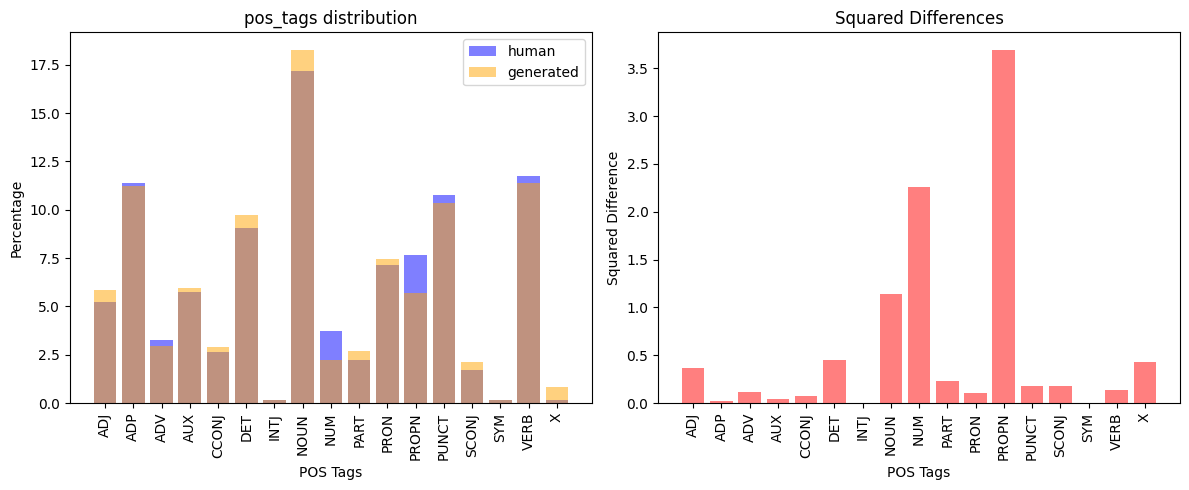

In [ ]:
sorted_keys = sorted(set(human_pos_perc.keys()).union(gen_pos_perc.keys()))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

human_values = [human_pos_perc[key] for key in sorted_keys]
gen_values = [gen_pos_perc[key] for key in sorted_keys]
axs[0].bar(sorted_keys, human_values, alpha=0.5, color='blue', label='human')
axs[0].bar(sorted_keys, gen_values, alpha=0.5, color='orange', label='generated')
axs[0].set_xlabel('POS Tags')
axs[0].set_ylabel('Percentage')
axs[0].set_title('pos_tags distribution')
axs[0].legend()

sq_diff_values = [sq_diff_pos[key] for key in sorted_keys]
axs[1].bar(sorted_keys, sq_diff_values, alpha=0.5, color='red')
axs[1].set_xlabel('POS Tags')
axs[1].set_ylabel('Squared Difference')
axs[1].set_title('Squared Differences')

for ax in axs:
    ax.set_xticklabels(sorted_keys, rotation=90)

plt.tight_layout()
plt.show()

It seems from the plot above that most of the POS tags are pretty similar in the generated and human text. The main **differences** are present in the PROPN, NUM and NOUN tags.

Instead, for **NER tags**:

<ipython-input-10-7e3837b82b2c>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_keys, rotation=90)


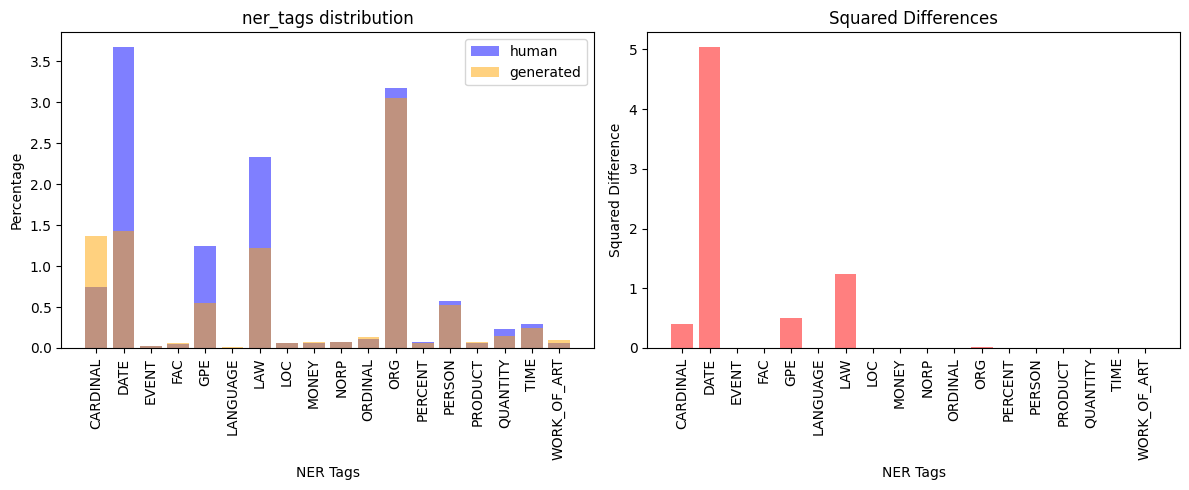

In [ ]:
sorted_keys = sorted(set(human_ner_perc.keys()).union(gen_ner_perc.keys()))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

human_values = [human_ner_perc[key] for key in sorted_keys]
gen_values = [gen_ner_perc[key] for key in sorted_keys]
axs[0].bar(sorted_keys, human_values, alpha=0.5, color='blue', label='human')
axs[0].bar(sorted_keys, gen_values, alpha=0.5, color='orange', label='generated')
axs[0].set_xlabel('NER Tags')
axs[0].set_ylabel('Percentage')
axs[0].set_title('ner_tags distribution')
axs[0].legend()

sq_diff_values = [sq_diff_ner[key] for key in sorted_keys]
axs[1].bar(sorted_keys, sq_diff_values, alpha=0.5, color='red')
axs[1].set_xlabel('NER Tags')
axs[1].set_ylabel('Squared Difference')
axs[1].set_title('Squared Differences')

for ax in axs:
    ax.set_xticklabels(sorted_keys, rotation=90)

plt.tight_layout()
plt.show()

For the NER tags, we can see most **differences** for DATE and LAW.

Instead, for **DEP tags**:

<ipython-input-11-6644c4d17fed>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_keys, rotation=90)


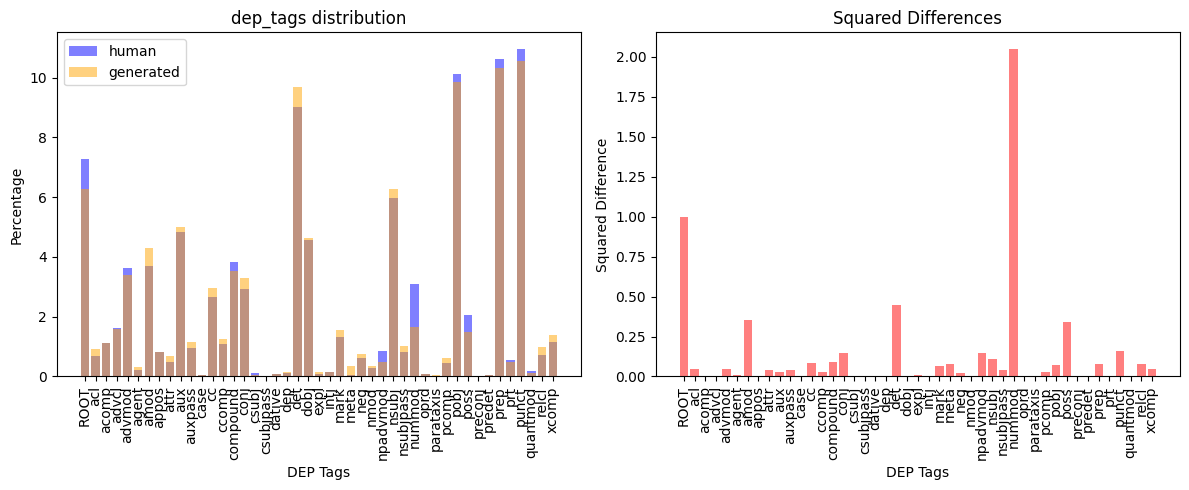

In [ ]:
sorted_keys = sorted(set(human_dep_perc.keys()).union(gen_dep_perc.keys()))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

human_values = [human_dep_perc[key] for key in sorted_keys]
gen_values = [gen_dep_perc[key] for key in sorted_keys]
axs[0].bar(sorted_keys, human_values, alpha=0.5, color='blue', label='human')
axs[0].bar(sorted_keys, gen_values, alpha=0.5, color='orange', label='generated')
axs[0].set_xlabel('DEP Tags')
axs[0].set_ylabel('Percentage')
axs[0].set_title('dep_tags distribution')
axs[0].legend()

sq_diff_values = [sq_diff_dep[key] for key in sorted_keys]
axs[1].bar(sorted_keys, sq_diff_values, alpha=0.5, color='red')
axs[1].set_xlabel('DEP Tags')
axs[1].set_ylabel('Squared Difference')
axs[1].set_title('Squared Differences')

for ax in axs:
    ax.set_xticklabels(sorted_keys, rotation=90)

plt.tight_layout()
plt.show()

For the DEP tags, we can see most differences for NUMMOD, ROOT e DET.

### T-statistics, Boxplot, Histograms and Density plots on the other features

We split the train dataset in two, creating the dataframes for generated and human text.

In [ ]:
class_1 = train_df1_en_features[train_df1_en_features['label'] == 1]
class_2 = train_df1_en_features[train_df1_en_features['label'] == 0]

We drop the string type features and the label column, keeping only the numerical features

In [ ]:
train_columns_nc=train_df1_en_features.columns
columns_nc_train_numeric=train_df1_en_features.copy()

columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="text")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="pos_tags")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="ner_tags")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="dep_tags")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="label")

We calculate the p-value of the t-statistic for the feature values of the two classes and we print only the value of the features having a p-value *above 0.05*. Those columns allow us to accept the null hypothesis and concluding that there is not a statistically significant difference between the values of the feature on the two classes.

In [ ]:
for feature in columns_nc_train_numeric:
  t_stat, p_val = stats.ttest_ind(class_1[feature], class_2[feature], equal_var=False)
  if p_val>0.05:
    print("The T-statistics for the feature ", feature, "has a p-value of: ", p_val)

The T-statistics for the feature  vv2 has a p-value of:  0.6359834891252047
The T-statistics for the feature  clauses has a p-value of:  0.7119746399653177


We plot the Box Plots, Histograms and Density plots of the feature above.

**VV2**:

--------------------------------------------------
T-statistic: -0.473, P-value: 0.635983489125205


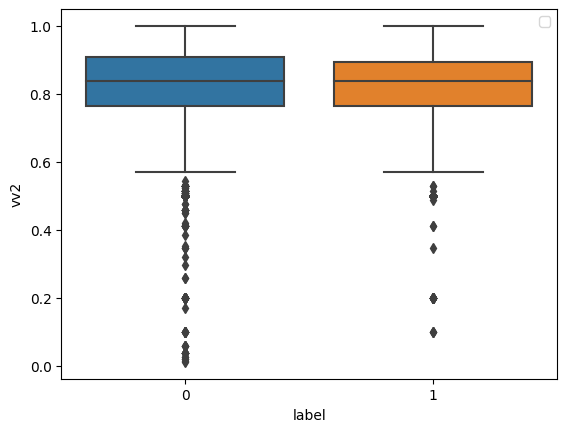

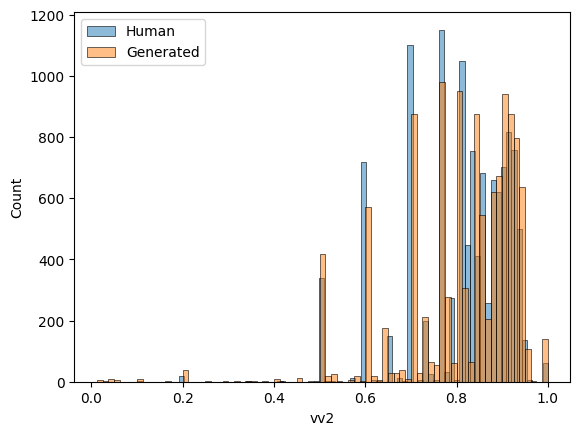

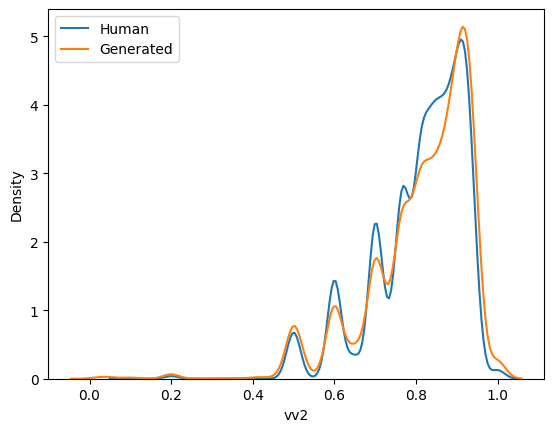

In [ ]:
feature = 'vv2'
# Calculate the t-statistic and p-value using a t-test
t_stat, p_val = stats.ttest_ind(class_1[feature], class_2[feature], equal_var=False)
print("--------------------------------------------------")
print("T-statistic: {:.3f}, P-value: {:.15f}".format(t_stat, p_val))

# Create a box plot using Seaborn
sns.boxplot(x='label', y=feature, data=train_df1_en_features)
plt.legend()
plt.show()

# Create a histogram using Seaborn
sns.histplot(data=class_1, x=feature, label='Human', alpha=0.5)
sns.histplot(data=class_2, x=feature, label='Generated', alpha=0.5)
plt.legend()
plt.show()

# Create a density plot using Seaborn
sns.kdeplot(data=class_1, x=feature, label='Human')
sns.kdeplot(data=class_2, x=feature, label='Generated')
plt.legend()
plt.show()

**Clauses**:

--------------------------------------------------
T-statistic: 0.369, P-value: 0.711974639965318


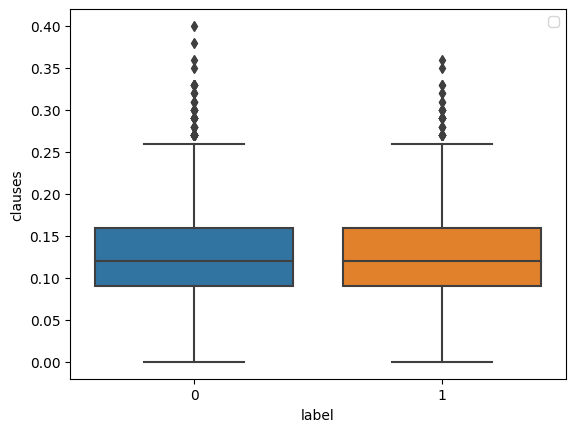

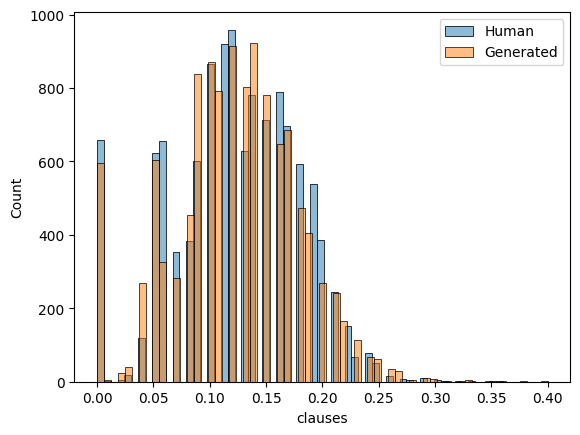

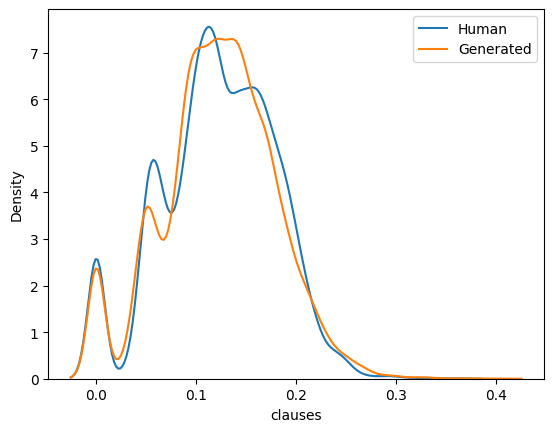

In [ ]:
feature = 'clauses'

# Calculate the t-statistic and p-value using a t-test
t_stat, p_val = stats.ttest_ind(class_1[feature], class_2[feature], equal_var=False)
print("--------------------------------------------------")
print("T-statistic: {:.3f}, P-value: {:.15f}".format(t_stat, p_val))

# Create a box plot using Seaborn
sns.boxplot(x='label', y=feature, data=train_df1_en_features_not_correlated)
plt.legend()
plt.show()

# Create a histogram using Seaborn
sns.histplot(data=class_1, x=feature, label='Human', alpha=0.5)
sns.histplot(data=class_2, x=feature, label='Generated', alpha=0.5)
plt.legend()
plt.show()

# Create a density plot using Seaborn
sns.kdeplot(data=class_1, x=feature, label='Human')
sns.kdeplot(data=class_2, x=feature, label='Generated')
plt.legend()
plt.show()

As you can see from the boxplots above, the median and range of the feature values are not very different between the two classes. Also the histogram and density plots show us not so strong dissimilarity.

For this reason we decided to drop the "vv2" and "clauses" features.

In [ ]:
train_df1_en_features_temp=train_df1_en_features.copy()
train_df1_en_features_temp=train_df1_en_features_temp.drop(columns="vv2")
train_df1_en_features_temp=train_df1_en_features_temp.drop(columns="clauses")

## Dimensionality Reduction

Some features are correlated with each other. We extract the most useful ones.

### Correlation Matrix

We print the correlation matrix:

In [ ]:
corr_matrix = train_df1_en_features_temp.corr()

In [ ]:
corr_matrix

label      mtld    logttr       VV1  \
label                             1.000000 -0.081337  0.097066  0.082100   
mtld                             -0.081337  1.000000  0.255260  0.112617   
logttr                            0.097066  0.255260  1.000000  0.492029   
VV1                               0.082100  0.112617  0.492029  1.000000   
nv                                0.113331  0.014404  0.377449 -0.192742   
ttr                               0.067442  0.233834  0.980722  0.491058   
cttr                              0.047023 -0.138295  0.755051  0.394201   
rttr                              0.081929  0.246504  0.993921  0.494370   
svv1                             -0.131789  0.065325 -0.553893 -0.119848   
cvv1                             -0.047492  0.375223 -0.162843  0.160186   
lv                                0.048938  0.242775  0.973766  0.493711   
advv                              0.123380  0.192328  0.133866  0.087369   
advjv                             0.013585  0.189480  0.052626 -0.074610   
mlc                              -0.168229  0.100281 -0.297635 -0.232967   
mls                              -0.140582  0.077975 -0.289943 -0.219578   
mlt                              -0.142992  0.074199 -0.283957 -0.221455   
clause_per_sentence              -0.168229  0.100281 -0.297635 -0.232967   
t_units_per_sentence             -0.013093 -0.032097  0.010692 -0.022708   
dependent_clause_to_clause_ratio -0.168229  0.100281 -0.297635 -0.232967   
clause_per_tunits                -0.168229  0.100281 -0.297635 -0.232967   
dependent_clause_per_tunits      -0.168229  0.100281 -0.297635 -0.232967   
coordinate_phrase_per_clause     -0.059258  0.053995 -0.002304 -0.057332   
complex_nominal_per_clause       -0.072198  0.096136 -0.011781 -0.193069   
complex_nominal_per_tunits       -0.131716  0.127732 -0.132822 -0.226598   
verb_phrase_per_tunits            0.037990  0.135636  0.025323  0.208323   
perc_punctuations                 0.066298 -0.108742  0.037051 -0.042716   
vocab_size                       -0.047623  0.425722 -0.294524 -0.183037   
vocab_complexity_avg              0.081269  0.211142  0.966847  0.497018   
avg_sent_len                     -0.137098  0.053845 -0.350510 -0.277315   
avg_phrase_length                -0.051202  0.068424 -0.125669 -0.047231   
avg_adv_count                     0.061531  0.037015  0.311411  0.199396   
ease_read                         0.033195 -0.039971  0.343246  0.322388   
school_grade                     -0.062826  0.077567 -0.347962 -0.307690   
errors                            0.058088 -0.022539  0.085272  0.066941   

                                        nv       ttr      cttr      rttr  \
label                             0.113331  0.067442  0.047023  0.081929   
mtld                              0.014404  0.233834 -0.138295  0.246504   
logttr                            0.377449  0.980722  0.755051  0.993921   
VV1                              -0.192742  0.491058  0.394201  0.494370   
nv                                1.000000  0.379290  0.355135  0.380132   
ttr                               0.379290  1.000000  0.820224  0.996186   
cttr                              0.355135  0.820224  1.000000  0.793483   
rttr                              0.380132  0.996186  0.793483  1.000000   
svv1                             -0.428727 -0.550540 -0.590499 -0.553815   
cvv1                             -0.328725 -0.237950 -0.583162 -0.203423   
lv                                0.361498  0.982383  0.790702  0.983409   
advv                             -0.186202  0.099985 -0.092015  0.116716   
advjv                            -0.064019  0.009235 -0.194852  0.029502   
mlc                              -0.100305 -0.316041 -0.397433 -0.309622   
mls                              -0.094724 -0.305235 -0.362109 -0.300309   
mlt                              -0.074995 -0.298488 -0.351306 -0.293915   
clause_per_sentence              -0.100305 -0.316041 -0.397433 -0.309622   
t_units_

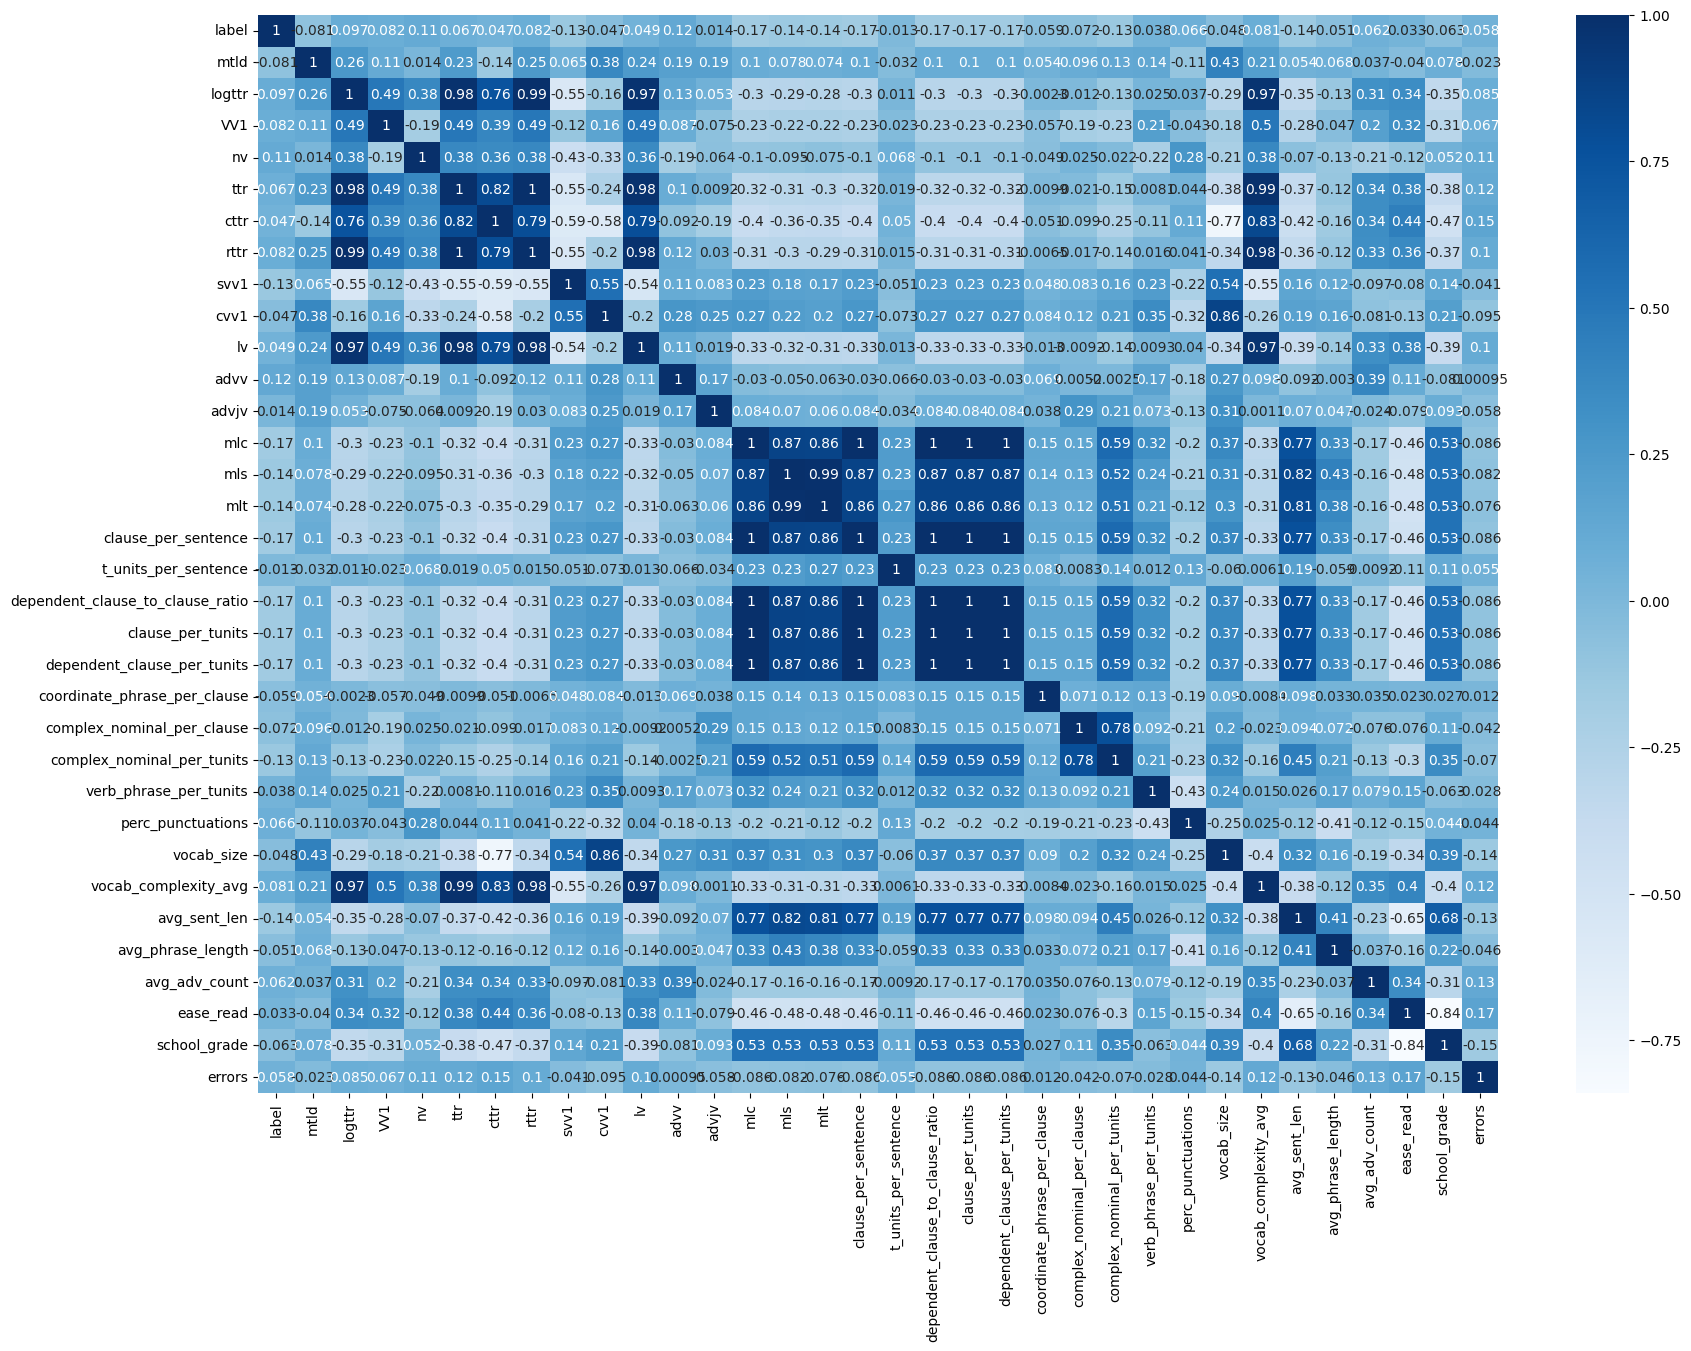

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Show the plot
plt.show()

We now check the correlation between the features. If two features have a correlation above 70%, we save those features in a dictionary and subsequently we eliminate the one of the two which is more overall correlated with the other features.

In [ ]:
dicts = dict.fromkeys(corr_matrix.index, 0)
dimension=len(corr_matrix)
for i in range(dimension):
    indice=corr_matrix.index[i]
    for j in range(i+1, dimension):
        colonna=corr_matrix.columns[j]
        value=corr_matrix.values[i,j]*100
        if (abs(value)>70):
            dicts[indice]+=1
            dicts[colonna]+=1
            print("The variable", indice,"and the variable", colonna, "have a correlation of {:.2f}".format(value), "%\n")
dicts

The final features to be eliminated are:

In [ ]:
nomi=[]
for i in range(dimension):
    indice=corr_matrix.index[i]
    for j in range(i+1, dimension):
        colonna=corr_matrix.columns[j]
        value=corr_matrix.values[i,j]*100
        if (abs(value)>70):
            if(dicts[indice]<dicts[colonna]):
                nomi.append(indice)
            else:
                nomi.append(colonna)

colonne_to_remove=np.unique(nomi)
colonne_to_remove

array(['avg_sent_len', 'clause_per_sentence', 'clause_per_tunits',
       'complex_nominal_per_tunits', 'cvv1',
       'dependent_clause_per_tunits', 'dependent_clause_to_clause_ratio',
       'logttr', 'lv', 'mls', 'mlt', 'rttr', 'school_grade', 'ttr',
       'vocab_complexity_avg', 'vocab_size'], dtype='<U32')

We then create a dataframe for the non-correlated features:

In [ ]:
train_df1_en_features_not_correlated=train_df1_en_features_temp.copy()

In [ ]:
for colonna in colonne_to_remove:
    train_df1_en_features_not_correlated=train_df1_en_features_not_correlated.drop(columns=str(colonna))
train_df1_en_features_not_correlated

text  \
0      A facial wipe is simply a tool to remove makeu...   
1      (b). Article 2 shall apply from 1 April 2004. ...   
2      The words three working days` in Article 4 (1)...   
3      HAS ADOPTED THIS DECISION: Article 1. The pref...   
4      You’ll see if the person’s name is in their ph...   
...                                                  ...   
23686  so cross that i forgot about printers row this...   
23687  Use a tape measure to see how much fabric is b...   
23688  Decision of the Management Committee for Fishe...   
23689  Yet, in today’s society, they are everywhere. ...   
23690  Managers determine which futures to buy or sel...   

                                                pos_tags  \
0      [DET, ADJ, NOUN, AUX, ADV, DET, NOUN, PART, VE...   
1      [PUNCT, NOUN, PUNCT, PUNCT, NOUN, NUM, AUX, VE...   
2      [DET, NOUN, NUM, VERB, NOUN, PUNCT, ADP, PROPN...   
3      [AUX, VERB, DET, NOUN, PUNCT, NOUN, NUM, PUNCT...   
4      [PRON, AUX, VERB, SCONJ, DET, NOUN, PART, NOUN...   
...                                                  ...   
23686  [ADV, VERB, SCONJ, PRON, VERB, ADP, NOUN, VERB...   
23687  [VERB, DET, NOUN, NOUN, PART, VERB, SCONJ, ADJ...   
23688  [NOUN, ADP, DET, PROPN, PROPN, ADP, PROPN, CCO...   
23689  [ADV, PUNCT, ADP, NOUN, PART, NOUN, PUNCT, PRO...   
23690  [NOUN, VERB, DET, NOUN, PART, VERB, CCONJ, VER...   

                                                ner_tags  \
0      [, , , , , , , , , , , , , , , , , , , , , , ,...   
1      [, , , , LAW, LAW, , , , DATE, DATE, DATE, , ,...   
2      [, , DATE, DATE, DATE, , , LAW, LAW, , CARDINA...   
3      [, , , , , LAW, LAW, , , , , , , , ORG, , , , ...   
4      [, , , , , , , , , , , , , , , , , , , , , , ,...   
...                                                  ...   
23686  [, , , , , , , , DATE, DATE, , , , , , DATE, ,...   
23687  [, , , , , , , , , , , , , , , , , , , , , , ,...   
23688  [, , ORG, ORG, ORG, ORG, ORG, ORG, ORG, , , , ...   
23689  [, , , DATE, , , , , , , , , , , , , , , , , ,...   
23690  [, , , , , , , , , , , , , , , , , , , , , , ,...   

                                                dep_tags  label        mtld  \
0      [det, amod, nsubj, ROOT, advmod, det, attr, au...      0   28.347962   
1      [punct, ROOT, punct, punct, nsubj, nummod, aux...      1   38.539147   
2      [det, nsubjpass, nummod, amod, nsubjpass, punc...      0   22.000000   
3      [aux, ROOT, det, dobj, punct, ROOT, nummod, pu...      1   67.463529   
4      [nsubj, aux, ROOT, mark, det, poss, case, nsub...      0  169.000000   
...                                                  ...    ...         ...   
23686  [advmod, ROOT, mark, nsubj, ccomp, prep, nsubj...      1  123.480000   
23687  [ROOT, det, compound, dobj, aux, xcomp, advmod...      1   68.101523   
23688  [ROOT, prep, det, compound, pobj, prep, pobj, ...      0   28.000000   
23689  [advmod, punct, prep, poss, case, pobj, punct,...      1  102.060000   
23690  [nsubj, ROOT, det, nsubj, aux, ccomp, cc, conj...      1   85.886400   

            VV1        nv      cttr  svv1  ...        mlc  \
0      0.166667  0.138889  0.061266    33  ...  14.500000   
1      0.193548  0.258065  0.123176     6  ...   8.333333   
2      0.054545  0.127273  0.035435    96  ...  13.571429   
3      0.118644  0.288136  0.093750     6  ...  15.600000   
4      0.188406  0.304348  0.116402    17  ...  19.000000   
...         ...       ...       ...   ...  ...        ...   
23686  0.190476  0.190476  0.207827     4  ...  11.500000   
23687  0.138889  0.236111  0.079840    16  ...  22.000000   
23688  0.023810  0.119048  0.025978    18  ...  84.000000   
23689  0.156627  0.228916  0.086420    28  ...  19.000000   
23690  0.195402  0.264368  0.078868    20  ...  15.833333   

       t_units_per_sentence  coordinate_phrase_per_clause  \
0                       1.0                      0.000000   
1                       1.0                      0.020000   
2                       

In [ ]:
directory = '/content/gdrive/MyDrive/PROJ/DF/'
file_path = directory + 'train_df1_en_features_laststep_notcorrelated.csv'
train_df1_en_features_not_correlated.to_csv(file_path, index=False)

The remaing columns after the previous analysis are:

In [ ]:
train_df1_en_features_not_correlated.columns

Index(['text', 'pos_tags', 'ner_tags', 'dep_tags', 'label', 'mtld', 'VV1',
       'nv', 'cttr', 'svv1', 'advv', 'advjv', 'mlc', 't_units_per_sentence',
       'coordinate_phrase_per_clause', 'complex_nominal_per_clause',
       'verb_phrase_per_tunits', 'perc_punctuations', 'avg_phrase_length',
       'avg_adv_count', 'ease_read', 'errors'],
      dtype='object')

We create a dataset of only numerical features for the plots below:

In [ ]:
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated.copy()

train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="text")
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="pos_tags")
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="ner_tags")
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="dep_tags")
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="label")

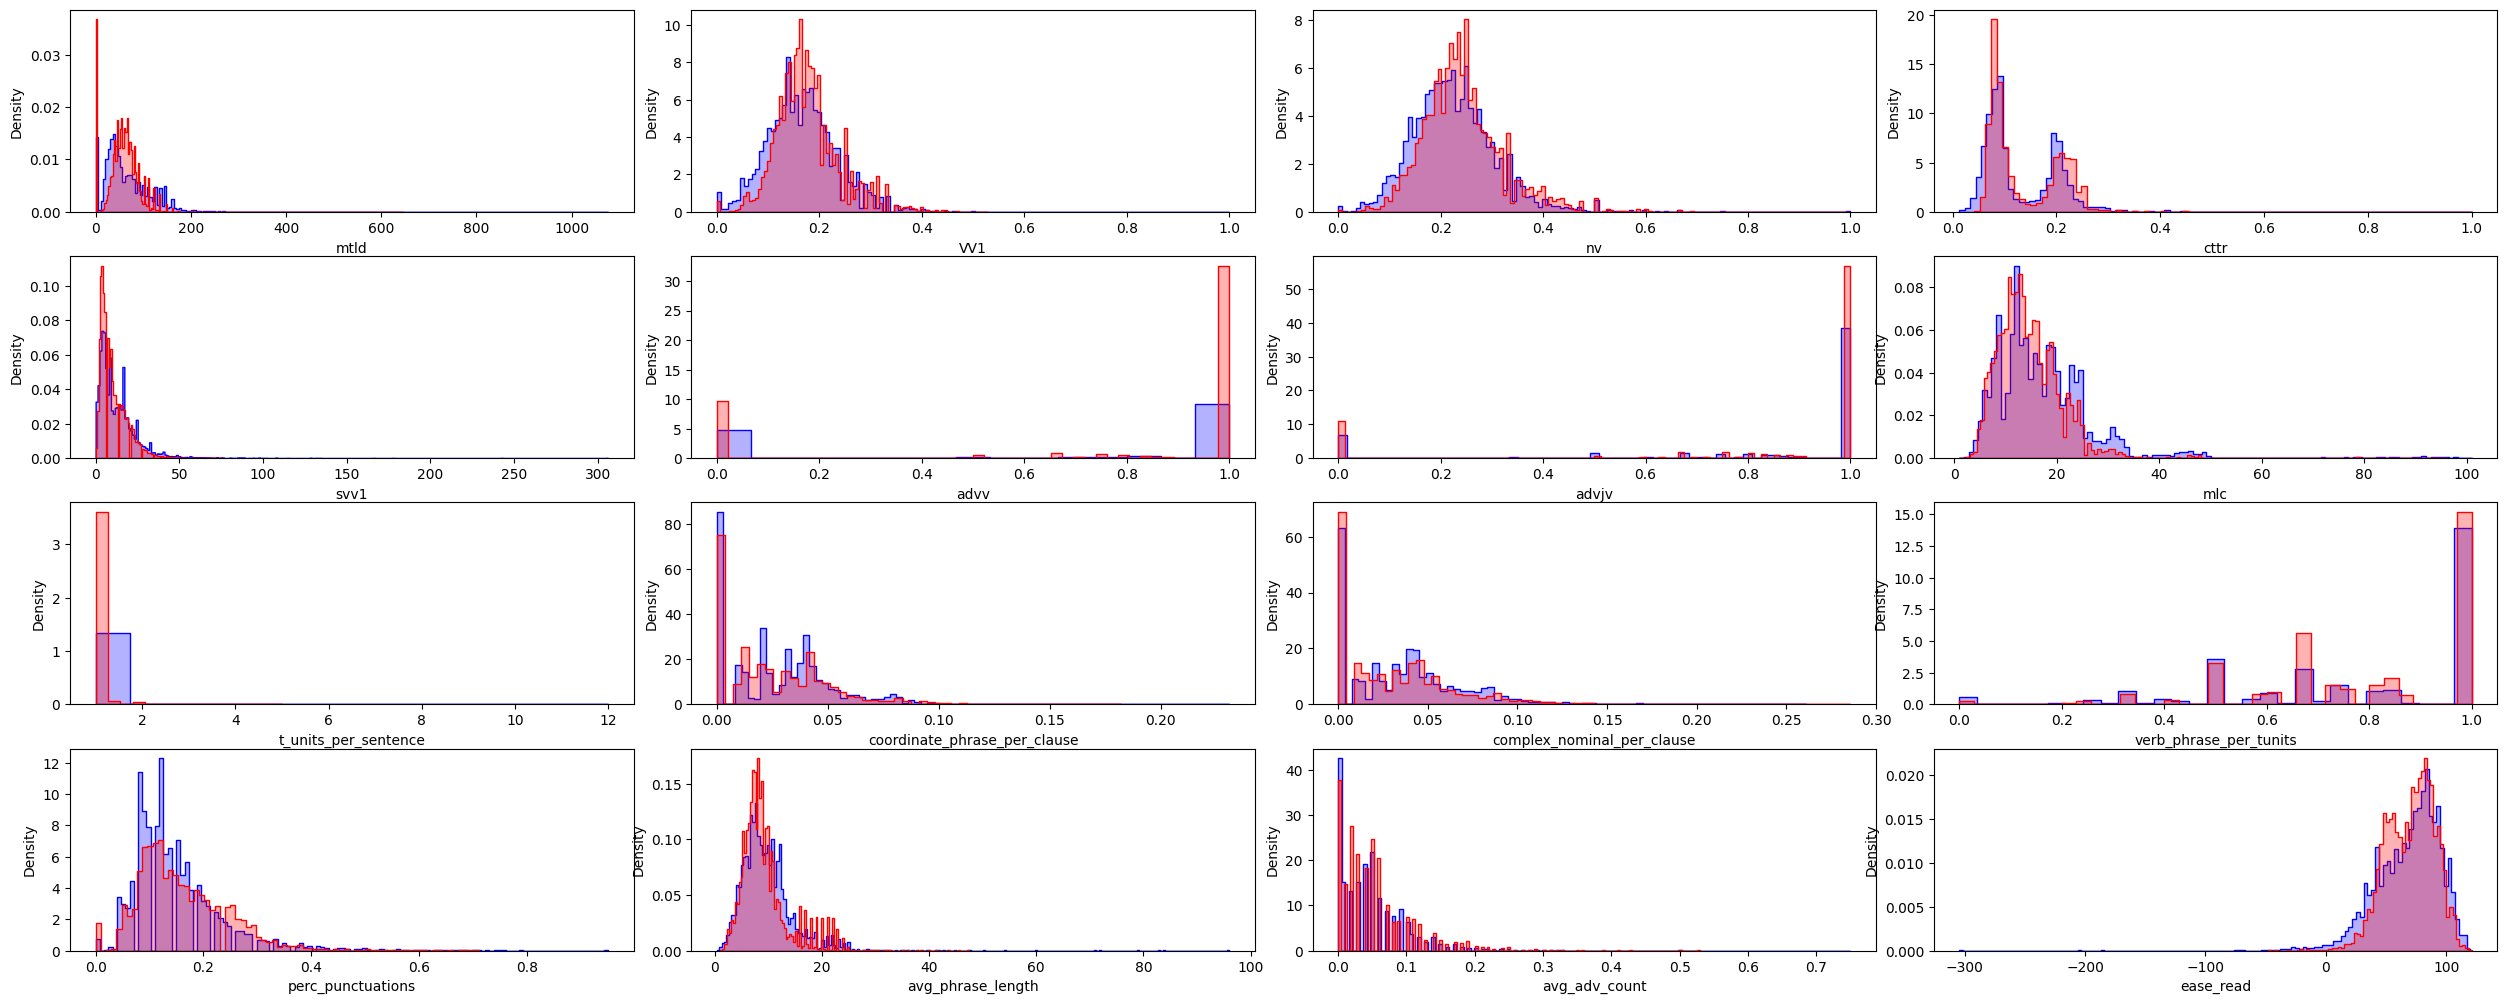

In [ ]:
%matplotlib inline

X0 = train_df1_en_features_not_correlated_nc[train_df1_en_features_not_correlated['label']==0]
X1 = train_df1_en_features_not_correlated_nc[train_df1_en_features_not_correlated['label']==1]

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(25,10))
fig.tight_layout()

for i, ax in zip(range(train_df1_en_features_not_correlated_nc.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

It seems that most of the features have a Gaussian distribution. However, they do not seems able to separate well enough the two classes.

### Principal Component Analysis (PCA)

To deal with the high number of features of the dataset, we decide to perfom Principal Component Analysis, applying this tecnhique on the numerical features:

In [ ]:
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated.copy()

train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="text")
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="pos_tags")
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="ner_tags")
train_df1_en_features_not_correlated_nc=train_df1_en_features_not_correlated_nc.drop(columns="dep_tags")

In [ ]:
train_dataset_pca = train_df1_en_features_not_correlated_nc.drop(['label'],axis = 1)

In [ ]:
##-----------------------TRAIN------------------------------
features = train_dataset_pca.columns
X_train_pca = train_dataset_pca.loc[:, features].values
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
pca = PCA(n_components=len(features))
X_train_pca = pca.fit_transform(X_train_pca)

#-----------------------VALIDATION------------------------------
columns_train_pca=train_df1_en_features_not_correlated_nc.columns
val_df1_en_features_not_correlated_nc=val_df1_en_features[columns_train_pca]
val_dataset_pca = val_df1_en_features_not_correlated_nc.drop(['label'],axis = 1)
features = val_dataset_pca.columns
X_val_pca = val_dataset_pca.loc[:, features].values
X_val_pca=scaler.transform(X_val_pca)
X_val_pca = pca.transform(X_val_pca)

#-----------------------TEST------------------------------
columns_train_pca=train_df1_en_features_not_correlated_nc.columns
test_df1_en_features_not_correlated_nc=test_df1_en_features[columns_train_pca]
test_dataset_pca = test_df1_en_features_not_correlated_nc.drop(['label'],axis = 1)
features = test_dataset_pca.columns
X_test_pca = test_dataset_pca.loc[:, features].values
X_test_pca=scaler.transform(X_test_pca)
X_test_pca = pca.transform(X_test_pca)

In [ ]:
temp=train_df1_en_features_not_correlated_nc.copy()
temp= train_df1_en_features_not_correlated_nc.drop(['label'],axis = 1)

In [ ]:
columns_pca = []
for i in range(len(temp.columns)):
  columns_pca.append('PC'+str(i+1))
print(columns_pca)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']


In [ ]:
principal_df = pd.DataFrame(data = X_train_pca, columns = columns_pca)

In [ ]:
principal_df['label'] = train_df1_en_features['label']

We now select the number of Principal Components checking the cumulative explained variance of them:

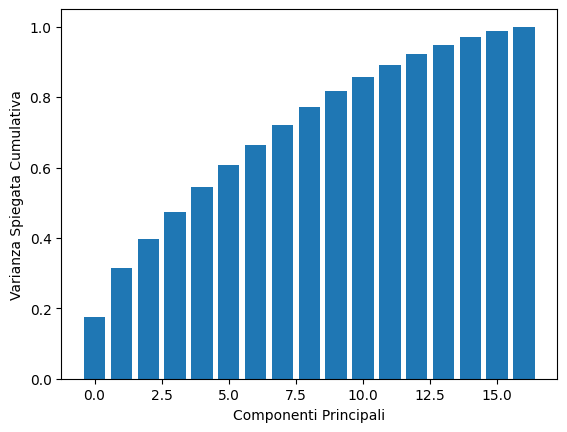

In [ ]:
variance = pca.explained_variance_ratio_

# Calcola la varianza spiegata cumulativa
cumulative_variance = np.cumsum(variance)

# Crea un grafico a barre della varianza spiegata cumulativa
plt.bar(range(len(cumulative_variance)), cumulative_variance)

# Aggiungi le etichette agli assi
plt.xlabel('Componenti Principali')
plt.ylabel('Varianza Spiegata Cumulativa')

# Mostra il grafico
plt.show()

In [ ]:
X=train_dataset_pca.loc[:, features].values
color= train_df1_en_features['label']

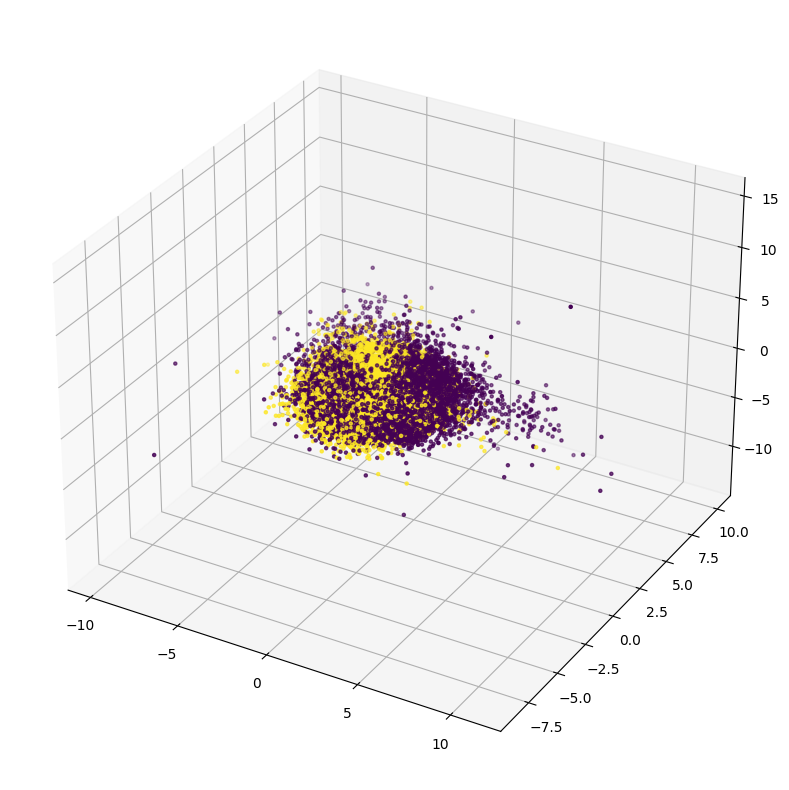

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=color, marker='.')

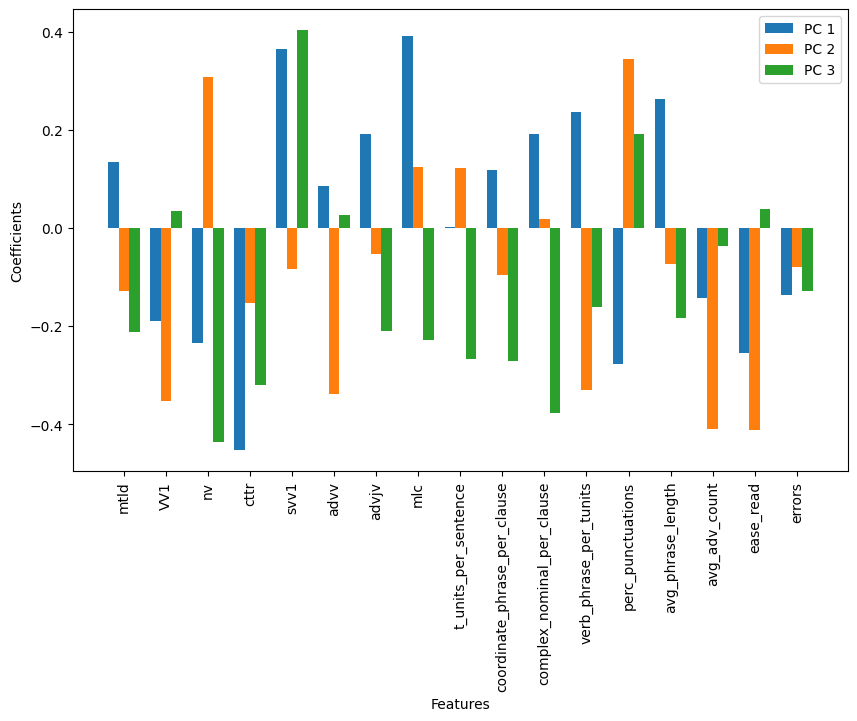

In [ ]:
## Ottieni i coefficienti delle features per le prime tre componenti principali
coefficients = pca.components_[:3, :]
n_components, n_features = coefficients.shape

# Prepara il grafico a barre
plt.figure(figsize=(10, 6))
index = np.arange(n_features)
bar_width = 0.25

# Crea una barra per ogni componente principale
for i in range(n_components):
    plt.bar(index + i * bar_width, coefficients[i, :], bar_width, label=f"PC {i+1}")

# Prendi i nomi delle feature dal DataFrame
feature_names = temp.columns.tolist()

# Aggiungi etichette alle feature sull'asse x
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(index + bar_width, feature_names, rotation=90)

# Aggiungi legenda
plt.legend()

# Mostra il grafico
plt.show()

### Feature Selection - Recursive Feature Elimination (RFE)

We try to reduce the number of numerical features to a fixed number with Logistic Regression model estimator using Recursive Feature Elimination (**RFE**).

In [ ]:
numerical_columns = train_df1_en_features.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop("label")

# Create a new DataFrame with numerical features only
numerical_df = train_df1_en_features[numerical_columns]
numerical_df.columns
y = train_df1_en_features["label"]

In [ ]:
estimator = LogisticRegression(solver='liblinear')

rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(numerical_df, y)

selected_features = rfe.support_
selected_feature_names = numerical_df.columns[rfe.support_]

print("Selected Feature Names:")
for feature_name in selected_feature_names:
    print(feature_name)

Selected Feature Names:
logttr
ttr
clause_per_tunits
dependent_clause_per_tunits
avg_adv_count


We found that with 5-6 features we get approximately the same results in terms of accuracy as the ones using the whole dataset.

The selected Feature Names are: logttr, ttr, clause_per_tunits, dependent_clause_per_tunits, avg_adv_count.


In [ ]:
# Create a new DataFrame with only the selected features
#TRAIN
train_df1_en_top5features = train_df1_en_features[selected_feature_names].copy()
train_df1_en_top5features['label'] = train_df1_en_features['label'].copy()

#VALIDATION
val_df1_en_top5features = val_df1_en_features[selected_feature_names].copy()
val_df1_en_top5features['label'] = val_df1_en_features['label'].copy()

#TEST
test_df1_en_top5features = test_df1_en_features[selected_feature_names].copy()
test_df1_en_top5features['label'] = test_df1_en_features['label'].copy()

## Embedding Analysis
We also worked on the embedded words. Each word is represented by a vector of 50 elements (float values).
To get a summary of the text, a sum of  words(vectors) can be used. Alternatively, it is used the mean of words.

We relied on the Twitter vocabolary. The words that were contained in the vocabolary were used to compute the summary vector of document.

In [ ]:
emoticon_regex = '(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)'
united = ' '.join(train_df1_en)
emoticons_in_pos_tweets = re.findall(emoticon_regex,united)
counts = nltk.Counter(emoticons_in_pos_tweets)
temp1 = [re.sub(emoticon_regex,'',doc) for doc in train_df1_en]

data_regex='\d+(\.\d+[.,])?'
temp2 = [re.sub(data_regex,'',doc) for doc in temp1]

user_regex = '@[a-zA-Z0-9.-]+'
temp3 = [re.sub(user_regex,'',doc) for doc in temp2]

In [ ]:
vocab= api.load("glove-twitter-50")

In [ ]:
regex = '[' + string.punctuation + ']'

def vectorize(docs, embedding_model=vocab, useSum=False):
    vectors = np.zeros((len(docs),50))
    for i in range(len(docs)):
        tokens = re.sub(regex, '', docs[i].lower()).split()
        embeddings = [embedding_model.get_vector(token) for token in tokens if token in embedding_model]
        if (len(embeddings) > 0):
            if (useSum):
                vectors[i] = sum(embeddings)
            else:
                vectors[i] = np.mean(embeddings, axis=0)
    return vectors

In [ ]:
#TRAIN
twitter_train_df1_en = vectorize(temp3)

#VALIDATION
temp1 = [re.sub(emoticon_regex,'',doc) for doc in val_df1_en]
temp2 = [re.sub(data_regex,'',doc) for doc in temp1]
temp3 = [re.sub(user_regex,'',doc) for doc in temp2]
twitter_val_df1_en= vectorize(temp3)

#TEST
temp1 = [re.sub(emoticon_regex,'',doc) for doc in test_df1_en]
temp2 = [re.sub(data_regex,'',doc) for doc in temp1]
temp3 = [re.sub(user_regex,'',doc) for doc in temp2]
twitter_test_df1_en= vectorize(temp3)

## Description of the dataset
The analysis below are done using different datasets and searching for the best combination of features and parameters that gives the best perfomances. The datasets are:
- Text
- Text Embedded
- Extracted Features
- Text & Extracted Features
- Principal Components

In [ ]:
train_df1_en_text=train_df1_en_features_not_correlated['text']
train_df1_en_feat=train_df1_en_features_not_correlated.drop(columns='text')
train_df1_en_text_and_feat=train_df1_en_features_not_correlated

In [ ]:
col_temp=train_df1_en_text_and_feat.columns
val_df1_en_text_and_feat=val_df1_en_features[col_temp]
test_df1_en_text_and_feat=test_df1_en_features[col_temp]

In [ ]:
y_train=train_df1_en_text_and_feat['label']
y_val=val_df1_en_text_and_feat['label']
y_test=test_df1_en_text_and_feat['label']

## Vectorize
We convert the collection of text documents to a vector of term/token counts using CountVectoriezer. This implementation also enables the ​pre-processing of text data prior to generating the vector representation.

Trying different **parameters combinations** we found out that the following one is the best one to preprocess the text data:

*   *analyzer = 'char'*:  feature should be made of character n-grams.
*   *ngram_range=(1, 4)*: looking at char n-grams from 1 to 4 n-grams.
*   *min_df=5*: ignore terms that have a document frequency strictly lower than 5
*   *lowercase=False*: not converting all characters to lowercase before tokenizing
*   *binary=True*:  useful for discrete probabilistic models that model binary events


In [ ]:
# Create a CountVectorizer to convert POS tags to numerical features
pos_vectorizer = CountVectorizer(tokenizer=lambda text: text, lowercase=False)
pos_vectorizer.fit(train_df1_en_text_and_feat['pos_tags'])
train_pos_features = pos_vectorizer.transform(train_df1_en_text_and_feat['pos_tags'])

# Create a CountVectorizer to convert NER tags to numerical features
ner_vectorizer = CountVectorizer(tokenizer=lambda text: text, lowercase=False)
ner_vectorizer.fit(train_df1_en_text_and_feat['ner_tags'])
train_ner_features = ner_vectorizer.transform(train_df1_en_text_and_feat['ner_tags'])

# Create a CountVectorizer to convert DEP tags to numerical features
dep_vectorizer = CountVectorizer(tokenizer=lambda text: text, lowercase=False)
dep_vectorizer.fit(train_df1_en_text_and_feat['dep_tags'])
train_dep_features = dep_vectorizer.transform(train_df1_en_text_and_feat['dep_tags'])

#For Text
text_vectorizer = CountVectorizer(ngram_range=(1, 4), min_df=5, lowercase=False, analyzer = 'char', binary=True)
text_vectorizer.fit(train_df1_en_text_and_feat['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(analyzer='char', binary=True, lowercase=False, min_df=5,
                ngram_range=(1, 4))

In [ ]:
#Colonne numeriche
colonne=train_df1_en_text_and_feat.columns
colonne_numeriche=colonne.drop('text')
colonne_numeriche=colonne_numeriche.drop('pos_tags')
colonne_numeriche=colonne_numeriche.drop('ner_tags')
colonne_numeriche=colonne_numeriche.drop('dep_tags')
colonne_numeriche=colonne_numeriche.drop('label')

In [ ]:
def extract_features(matrice, scaler, colonne_num):
    text_features = text_vectorizer.transform(matrice['text'])
    pos_features = pos_vectorizer.transform(matrice['pos_tags'])
    ner_features = ner_vectorizer.transform(matrice['ner_tags'])
    dep_features = dep_vectorizer.transform(matrice['dep_tags'])
    scaled_numerical_features = scaler.transform(matrice[colonne_num])


    return hstack([text_features, pos_features, ner_features, dep_features, scaled_numerical_features])

# Convert the training data to a feature matrix
X_train_vectorized = extract_features(train_df1_en_text_and_feat, scaler, colonne_numeriche)
X_val_vectorized =  extract_features(val_df1_en_text_and_feat, scaler, colonne_numeriche)
X_test_vectorized =  extract_features(test_df1_en_text_and_feat, scaler, colonne_numeriche)

In [ ]:
y_train=train_df1_en_text_and_feat['label']
y_val=val_df1_en_text_and_feat['label']
y_test=test_df1_en_text_and_feat['label']

## Training models

We proceed the analysis by training different classification models and searching for their best parameters. To compare their different perfomances, we print the **accuracy, precision, recall** and **macro F1 score** of each of the models.

The **best dataset** for our analysis is the one that combines *the text and the extracted features*. The others gave us worse results.

For reaching our ultimate result we have looked at different parameters to improve the perfomances on the validation set.

In order to not creating a messy code, we print just the best model with the best perfomances.

These are the perfomances on the validation set:

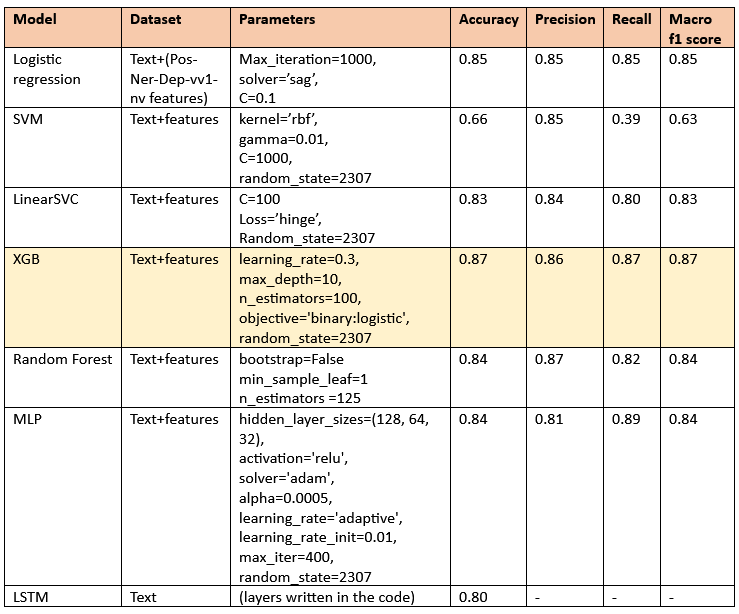

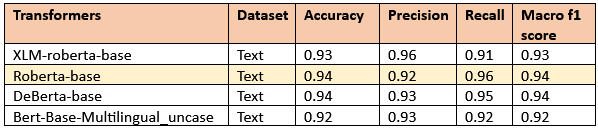

### Logistic Regression

Firstly, we reduce the number of features to give in input to the logistic regression, using RFE.

In [ ]:
estimator = LogisticRegression(max_iter=1000, solver='sag', C=0.1)
selector = RFE(estimator, n_features_to_select=2, step=1)

In [ ]:
selector = selector.fit(train_df1_en_text_and_feat[colonne_numeriche], y_train)

In [ ]:
selector.support_

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
selected_feat_dataset = colonne_numeriche[selector.support_]
selected_feat_dataset

Index(['VV1', 'nv'], dtype='object')

Then we apply the StandardScaler just on the reduce numerical dataset:

In [ ]:
scaler = StandardScaler()
scaler.fit(train_df1_en_text_and_feat[selected_feat_dataset])

StandardScaler()

In [ ]:
def extract_features(matrice, scaler, colonne_num):
    text_features = text_vectorizer.transform(matrice['text'])
    pos_features = pos_vectorizer.transform(matrice['pos_tags'])
    ner_features = ner_vectorizer.transform(matrice['ner_tags'])
    dep_features = dep_vectorizer.transform(matrice['dep_tags'])
    scaled_numerical_features = scaler.transform(matrice[colonne_num])


    return hstack([text_features, pos_features, ner_features, dep_features, scaled_numerical_features])

# Convert the training data to a feature matrix
X_train_vectorized_lr = extract_features(train_df1_en_text_and_feat, scaler, selected_feat_dataset)
X_val_vectorized_lr =  extract_features(val_df1_en_text_and_feat, scaler, selected_feat_dataset)
X_test_vectorized_lr =  extract_features(test_df1_en_text_and_feat, scaler, selected_feat_dataset)

In [ ]:
model = LogisticRegression(max_iter=1000, solver='sag', C=0.1).fit(X_train_vectorized_lr, y_train)

In [ ]:
pred_y_lr = model.predict(X_val_vectorized_lr)

In [ ]:
#Accuracy score
acs_lr=metrics.accuracy_score(y_val, pred_y_lr)

#Precision value
pv_lr=metrics.precision_score(y_val, pred_y_lr)

#Recall value
rcl_lr=metrics.recall_score(y_val, pred_y_lr)

#Macro F1 score
f1_macro_lr = f1_score(y_val, pred_y_lr, average='macro')

print("Accuracy: ", acs_lr)
print("Precision Value: ", pv_lr)
print("Recall: ", rcl_lr)
print("F1 score macro:", f1_macro_lr)

Accuracy:  0.851487098680323
Precision Value:  0.853390827126617
Recall:  0.8513883457176379
F1 score macro: 0.8514815614902025


### Support Vector Machine (SVM)

In [ ]:
directory = '/content/gdrive/MyDrive/PROJ/DF/'

import scipy.sparse as sp

# LOAD
X_train_vectorized = sp.load_npz(directory + 'X_train_withfeatures_vectorized.npz')
y_train = np.load(directory + 'y_train_withfeatures_vectorized.npy')
X_val_vectorized = sp.load_npz(directory + 'X_val_withfeatures_vectorized.npz')
y_val = np.load(directory + 'y_val_withfeatures_vectorized.npy')
X_test_vectorized = sp.load_npz(directory + 'X_test_withfeatures_vectorized.npz')
y_test = np.load(directory + 'y_test_withfeatures_vectorized.npy')

#### SVM (Linear basis function)

In [ ]:
svm_clf1 = LinearSVC(C=100, loss="hinge", random_state=2307)
svm_clf1.fit(X_train_vectorized,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, loss='hinge', random_state=2307)

In [ ]:
# Utilizzo del modello per fare le previsioni sui dati di test
y_pred1 = svm_clf1.predict(X_val_vectorized)

In [ ]:
# Confusion matrix
#cm=metrics.confusion_matrix(test_y_en, y_pred1)

#accuracy score
acs_svm1=metrics.accuracy_score(y_val, y_pred1)

#precision value
pv_svm1=metrics.precision_score(y_val, y_pred1)

#recall value
rcl_svm1=metrics.recall_score(y_val, y_pred1)

f1_macro_svm1 = f1_score(y_val, y_pred1, average='macro')

print("Accuracy: ", acs_svm1)
print("Precision Value: ", pv_svm1)
print("Recall: ", rcl_svm1)
print("F1 score macro:", f1_macro_svm1)

Accuracy:  0.8248965924758715
Precision Value:  0.8432098765432099
Recall:  0.8013296832225264
F1 score macro: 0.8248415495150949


#### SVM (Radial basis function)

In [ ]:
svm_clf1 = SVC(kernel='rbf', gamma=0.01, C=1000, random_state=2307)
svm_clf1.fit(X_train_vectorized, y_train)

SVC(C=1000, gamma=0.01, random_state=2307)

In [ ]:
# Utilizzo del modello per fare le previsioni sui dati di test
y_pred1 = svm_clf1.predict(X_val_vectorized)

In [ ]:
# Confusion matrix
#cm=metrics.confusion_matrix(test_y_en, y_pred1)

#accuracy score
acs_svm1=metrics.accuracy_score(y_val, y_pred1)

#precision value
pv_svm1=metrics.precision_score(y_val, y_pred1)

#recall value
rcl_svm1=metrics.recall_score(y_val, y_pred1)

f1_macro_svm1 = f1_score(y_val, y_pred1, average='macro')

print("Accuracy: ", acs_svm1)
print("Precision Value: ", pv_svm1)
print("Recall: ", rcl_svm1)
print("F1 score macro:", f1_macro_svm1)

Accuracy:  0.6580657868820169
Precision Value:  0.848768054375531
Recall:  0.3906922174423152
F1 score macro: 0.6323390182327255


### XGB

We perform a randomize search of the learning rate looking for values between 0.01 e 0.5 using RandomizedSearchCV function.

In [ ]:
#XGBoost classifier
xgb = XGBClassifier()

params = {
    'learning_rate': 0.5,
    'max_depth': 10,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'random_state': 2307
}
xgb.set_params(**params)

learning_rate_range = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions={'learning_rate': learning_rate_range},
    n_iter=5,
    scoring='accuracy',
    cv=5,
    random_state=2307
)
random_search.fit(X_train_vectorized, y_train)

best_learning_rate = random_search.best_params_['learning_rate']

xgb_final = XGBClassifier(
    learning_rate=best_learning_rate,
    max_depth=10,
    n_estimators=100,
    objective='binary:logistic',
    random_state=2307
)
xgb_final.fit(X_train_vectorized, y_train)

y_pred_xgb = xgb_final.predict(X_val_vectorized)

In [ ]:
print("Randomized optimization on XGBOOST")
for i in range(random_search.n_iter):
    print(f"Iteration {i+1}:")
    print("  Learning Rate:", random_search.cv_results_['param_learning_rate'][i])
    print("  Accuracy:", random_search.cv_results_['mean_test_score'][i])
    print()

Randomized optimization on XGBOOST
Iteration 1:
  Learning Rate: 0.4
  Accuracy: 0.8624373557622633

Iteration 2:
  Learning Rate: 0.1
  Accuracy: 0.8606647675615193

Iteration 3:
  Learning Rate: 0.01
  Accuracy: 0.8081131474982254

Iteration 4:
  Learning Rate: 0.3
  Accuracy: 0.8626063102654202

Iteration 5:
  Learning Rate: 0.2
  Accuracy: 0.8617197266763643



The best one has learning rate of 0.3. We print the final perfomances of the best model above:

In [ ]:
#Accuracy score
acs_xgb=metrics.accuracy_score(y_val, y_pred_xgb)

#Precision value
pv_xgb=metrics.precision_score(y_val, y_pred_xgb)

#Recall value
rcl_xgb=metrics.recall_score(y_val, y_pred_xgb)

#Macro F1 score
f1_macro_xgb = f1_score(y_val, y_pred_xgb, average='macro')

print("Randomized optimization on XGBOOST: best learning rate:", best_learning_rate)
print("Accuracy: ", acs_xgb)
print("Precision Value: ", pv_xgb)
print("Recall: ", rcl_xgb)
print("F1 score macro:", f1_macro_xgb)

Randomized optimization on XGBOOST with best learning rate: 0.3
Accuracy:  0.8666535355524916
Precision Value:  0.8643410852713178
Recall:  0.8721157606570199
F1 score macro: 0.8666349090918404


### Random Forest

As for the XGB classifier, we search for the best parameters using RandomizedSearchCV.

In [ ]:
param_distribs = {
    'n_estimators': randint(low=50, high=200),
    'min_samples_leaf': randint(low=1, high=5),
    'bootstrap': [True, False]
}
rnd_clf = RandomForestClassifier(random_state=2307)

rnd_search = RandomizedSearchCV(
    rnd_clf,
    param_distributions=param_distribs,
    n_iter=10,
    cv=5,
    random_state=2307
)

rnd_search.fit(X_train_vectorized, y_train)
best_params = rnd_search.best_params_
best_rnd_clf = RandomForestClassifier(random_state=2307, **best_params)
best_rnd_clf.fit(X_train_vectorized, y_train)
y_pred_rf = best_rnd_clf.predict(X_val_vectorized)

In [ ]:
print('Random forest classifier - now with char vectorization - with best parameters found:')
print(best_params)

#Accuracy score
acs_rf=metrics.accuracy_score(y_val, y_pred_rf)

#Precision value
pv_rf=metrics.precision_score(y_val, y_pred_rf)

#Recall value
rcl_rf=metrics.recall_score(y_val, y_pred_rf)

#Macro F1 score
f1_macro_rf = f1_score(y_val, y_pred_rf, average='macro')


print("Accuracy: ", acs_rf)
print("Precision Value: ", pv_rf)
print("Recall: ", rcl_rf)
print("F1 score macro:", f1_macro_rf)
#print("AUC: ", auc)

Random forest classifier with best parameters found:
{'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 125}
Accuracy:  0.8428205633247982
Precision Value:  0.8653926049023681
Recall:  0.8146265154477904
F1 score macro: 0.8427426604500381


### Neural Network
We try using also Neural Network for our task.

#### Multi-layer Percepetron (MLP)

In [ ]:
directory = '/content/gdrive/MyDrive/PROJ/DF/'

# LOAD
X_train_vectorized = sp.load_npz(directory + 'X_train_withfeatures_vectorized.npz')
y_train = np.load(directory + 'y_train_withfeatures_vectorized.npy')
X_val_vectorized = sp.load_npz(directory + 'X_val_withfeatures_vectorized.npz')
y_val = np.load(directory + 'y_val_withfeatures_vectorized.npy')
X_test_vectorized = sp.load_npz(directory + 'X_test_withfeatures_vectorized.npz')
y_test = np.load(directory + 'y_test_withfeatures_vectorized.npy')

In [ ]:
clf = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    learning_rate='adaptive',
    learning_rate_init=0.01,
    max_iter=400,
    random_state=2307
).fit(X_train_vectorized, y_train)

In [ ]:
pred_y_mlp = clf.predict(X_val_vectorized)

In [ ]:
#Accuracy score
acs_mlp=metrics.accuracy_score(y_val, pred_y_mlp)

#Precision value
pv_mlp=metrics.precision_score(y_val, pred_y_mlp)

#Recall value
rcl_mlp=metrics.recall_score(y_val, pred_y_mlp)

#Macro F1 score
f1_macro_mlp = f1_score(y_val, pred_y_mlp, average='macro')

print("Accuracy: ", acs_mlp)
print("Precision Value: ", pv_mlp)
print("Recall: ", rcl_mlp)
print("F1 score macro:", f1_macro_mlp)

Accuracy:  0.8390781957849124
Precision Value:  0.8096085409252669
Recall:  0.8897145091904576
F1 score macro: 0.8385514320525798


#### Long short-term memory (LSTM)

In [ ]:
#TRAIN
train_text = train_df1_en_top5features['text']
train_y = np.array(train_df1_en_top5features['label'])

#VAL
val_text = val_df1_en_top5features['text']
val_y = np.array(val_df1_en_top5features['label'])

#TEST
test_text = test_df1_en_top5features['text']
test_y = np.array(test_df1_en_top5features['label'])

train_tf = tf.data.Dataset.from_tensor_slices((train_text, train_y))
valid_tf = tf.data.Dataset.from_tensor_slices((val_text, val_y))

train_dataset = train_tf.shuffle(buffer_size=10000).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)

In [ ]:
vectorizer = TextVectorization(max_tokens=4000)
train_text = train_dataset.map(lambda text, label: text)
vectorizer.adapt(train_text)

model = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(1e-4))
model.fit(train_dataset, epochs=100, validation_data=valid_dataset, validation_steps=20,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)]
)

Epoch 1/100
371/371 [==============================] - 80s 162ms/step - loss: 0.6224 - accuracy: 0.5652 - val_loss: 0.5023 - val_accuracy: 0.7289
Epoch 2/100
371/371 [==============================] - 14s 37ms/step - loss: 0.4623 - accuracy: 0.7521 - val_loss: 0.4635 - val_accuracy: 0.7789
Epoch 3/100
371/371 [==============================] - 10s 28ms/step - loss: 0.4092 - accuracy: 0.7972 - val_loss: 0.4467 - val_accuracy: 0.7844
Epoch 4/100
371/371 [==============================] - 12s 32ms/step - loss: 0.3754 - accuracy: 0.8213 - val_loss: 0.4529 - val_accuracy: 0.8000
Epoch 5/100
371/371 [==============================] - 10s 27ms/step - loss: 0.3565 - accuracy: 0.8355 - val_loss: 0.4411 - val_accuracy: 0.8008
Epoch 6/100
371/371 [==============================] - 12s 33ms/step - loss: 0.3392 - accuracy: 0.8474 - val_loss: 0.4456 - val_accuracy: 0.8023
Epoch 7/100
371/371 [==============================] - 7s 20ms/step - loss: 0.3236 - accuracy: 0.8583 - val_loss: 0.4559 - val_ac

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(valid_dataset)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

80/80 [==============================] - 1s 15ms/step - loss: 0.5737 - accuracy: 0.7997
Test Loss: 0.5736513137817383
Test Accuracy: 0.7996848821640015


### Transformer Models


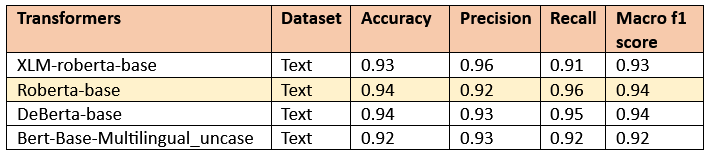

The data to be uses later are:

In [ ]:
train_texts=train_df1_en.tolist()
val_texts=val_df1_en.tolist()
test_texts=test_df1_en.tolist()

train_labels=train_labels_en
val_labels=val_labels_en
test_labels=test_labels_en

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### XLM-Roberta-Base

XLM-RoBERTa model pre-trained on 2.5TB of filtered CommonCrawl data containing 100 languages. This model is a variant of the RoBERTa model trained on multilingual data.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2)

We load the tokenizer pretrained on the XLM-RoBERTa base model and then we use it to encode the text data.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

#TRAIN
encoded_data_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')

#VALIDATION
encoded_data_val = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')

#TEST
encoded_data_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')

We then assign the value of the 'input_ids' tensora and 'attention_mask' tensor from the encoded data. Furthermore, we create the PyTorch tensor for the labels.

The data are then organized into a 'TensorDataset' object which combine the three tensors described above.

Then a DataLoader object is created facilitating the batching of the data with a batch size of 16.

In [ ]:
#TRAIN
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_labels)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, batch_size=16)

#VAL
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_labels)

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, batch_size=16)

#TEST
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_labels)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, batch_size=16)

We set up the optimizer and specify the number of epochs for training:

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 3

We move model to GPU:

In [ ]:
model.to(device)

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

We then loop to train the model for the specified number of epochs and evaluates it on the validation set after each epoch:

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device).long()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model on the val set after each epoch
    model.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")

Epoch 1: Accuracy 0.922
Epoch 2: Accuracy 0.933
Epoch 3: Accuracy 0.933


In [ ]:
#Accuracy score
acs_xlmroberta=metrics.accuracy_score(true_labels, predictions)

#Precision value
pv_xlmroberta=metrics.precision_score(true_labels, predictions)

#Recall value
rcl_xlmroberta=metrics.recall_score(true_labels, predictions)

#Macro F1 score
f1_macro_xlmroberta = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_xlmroberta)
print("Precision Value: ", pv_xlmroberta)
print("Recall: ", rcl_xlmroberta)
print("F1 score macro:", f1_macro_xlmroberta)

Accuracy:  0.933228284419933
Precision Value:  0.9586435070306039
Recall:  0.906531091122409
F1 score macro: 0.9332013223095589


#### Roberta-Base

It's a pretrained model on English language using a masked language modeling (MLM) objective.

In [ ]:
model_name = 'roberta-base'
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
model = transformers.AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
encoded_data_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_val = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
#TRAIN
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_labels)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, batch_size=16)

#VAL
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_labels)

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, batch_size=16)

#TEST
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_labels)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, batch_size=16)

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 3

In [ ]:
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    model.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")

Epoch 1: Accuracy 0.915
Epoch 2: Accuracy 0.930
Epoch 3: Accuracy 0.938


In [ ]:
#Accuracy score
acs_roberta=metrics.accuracy_score(true_labels, predictions)

#Precision value
pv_roberta=metrics.precision_score(true_labels, predictions)

#Recall value
rcl_roberta=metrics.recall_score(true_labels, predictions)

#Macro F1 score
f1_macro_roberta = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_roberta)
print("Precision Value: ", pv_roberta)
print("Recall: ", rcl_roberta)
print("F1 score macro:", f1_macro_roberta)

Accuracy:  0.9381524522355722
Precision Value:  0.9233673084182711
Recall:  0.9565897536175205
F1 score macro: 0.9381124975193413


In [ ]:
model.eval()

test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in dataloader_test:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        test_predictions.extend(torch.argmax(logits, dim=1).tolist())
        test_true_labels.extend(labels.tolist())

In [ ]:
#Accuracy score
acs_roberta_test=metrics.accuracy_score(test_true_labels, test_predictions)

#Precision value
pv_roberta_test=metrics.precision_score(test_true_labels, test_predictions)

#Recall value
rcl_roberta_test=metrics.recall_score(test_true_labels, test_predictions)

#Macro F1 score
f1_macro_roberta_test = f1_score(test_true_labels, test_predictions, average='macro')

print("Accuracy: ", acs_roberta_test)
print("Precision Value: ", pv_roberta_test)
print("Recall: ", rcl_roberta_test)
print("F1 score macro:", f1_macro_roberta_test)

Accuracy:  0.9334252511325586
Precision Value:  0.9217027746104143
Recall:  0.9483770043019163
F1 score macro: 0.9333934129101793


#### DeBerta-Base

DeBERTa improves the BERT and RoBERTa models using disentangled attention and enhanced mask decoder.

In [ ]:
# Load the pre-trained DeBERTa tokenizer and model
model_name = 'microsoft/deberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
encoded_data_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_val = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
#TRAIN
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_labels)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, batch_size=16)

#VAL
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_labels)

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, batch_size=16)

#TEST
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_labels)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, batch_size=16)

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 3

In [ ]:
model.to(device)

DebertaForSequenceClassification(
  (deberta): DebertaModel(
    (embeddings): DebertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=0)
      (LayerNorm): DebertaLayerNorm()
      (dropout): StableDropout()
    )
    (encoder): DebertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaLayer(
          (attention): DebertaAttention(
            (self): DisentangledSelfAttention(
              (in_proj): Linear(in_features=768, out_features=2304, bias=False)
              (pos_dropout): StableDropout()
              (pos_proj): Linear(in_features=768, out_features=768, bias=False)
              (pos_q_proj): Linear(in_features=768, out_features=768, bias=True)
              (dropout): StableDropout()
            )
            (output): DebertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): DebertaLayerNorm()
              (dropout): StableDropout()
            )
          )
          (

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model on the validation set after each epoch
    model.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")


Epoch 1: Accuracy 0.929
Epoch 2: Accuracy 0.935
Epoch 3: Accuracy 0.938


In [ ]:
#Accuracy score
acs_deroberta=metrics.accuracy_score(true_labels, predictions)

#Precision value
pv_deroberta=metrics.precision_score(true_labels, predictions)

#Recall value
rcl_deroberta=metrics.recall_score(true_labels, predictions)

#Macro F1 score
f1_macro_deroberta = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_deroberta)
print("Precision Value: ", pv_deroberta)
print("Recall: ", rcl_deroberta)
print("F1 score macro:", f1_macro_deroberta)

Accuracy:  0.9383494189481978
Precision Value:  0.9292272379495027
Recall:  0.9499413375048885
F1 score macro: 0.9383282778542383


#### Bert-Base-Multilingual-Uncased

Pretrained model on the top 102 languages with the largest Wikipedia using a masked language modeling (MLM) objective.

In [ ]:
model_name = 'bert-base-multilingual-uncased'

In [ ]:
bert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
bert = bert.to(device)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
encoded_data_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_val = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
#TRAIN
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_labels)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, batch_size=16)

#VAL
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_labels)

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, batch_size=16)

#TEST
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_labels)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, batch_size=16)

In [ ]:
optimizer = AdamW(bert.parameters(), lr=1e-5)
epochs = 3

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = bert(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model on the validation set after each epoch
    bert.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = bert(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")

    torch.save(bert.state_dict(), f"model_epoch_{epoch + 1}.pt")

Epoch 1: Accuracy 0.892
Epoch 2: Accuracy 0.913
Epoch 3: Accuracy 0.923


In [ ]:
#Accuracy score
acs_bert=metrics.accuracy_score(true_labels, predictions)

#Precision value
pv_bert=metrics.precision_score(true_labels, predictions)

#Recall value
rcl_bert=metrics.recall_score(true_labels, predictions)

#Macro F1 score
f1_macro_bert = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_bert)
print("Precision Value: ", pv_bert)
print("Recall: ", rcl_bert)
print("F1 score macro:", f1_macro_bert)

Accuracy:  0.9225920819381525
Precision Value:  0.929024583663759
Recall:  0.9163081736409855
F1 score macro: 0.9225920699257156


We try to look at the perfomance of the bert model (trained on english) inferenced on the Spanish dataset:

In [ ]:
task1_es_filenameTSV = r"/content/gdrive/MyDrive/PROJ/AUTEXTIFICATION/subtask_1/es/train.tsv"
dataset_task1_es=pd.read_csv(task1_es_filenameTSV,sep='\t')

label_encoder = LabelEncoder()
spanish_labels = label_encoder.fit_transform(dataset_task1_es['label'])

spanish_texts=dataset_task1_es['text'].tolist() #il tokenizer li vuole in lista

In [ ]:
encoded_spanish = tokenizer(spanish_texts, padding=True, truncation=True, return_tensors='pt')

input_ids_spanish = encoded_spanish['input_ids']
attention_masks_spanish = encoded_spanish['attention_mask']
labels_spanish = torch.tensor(spanish_labels)

dataset_spanish = TensorDataset(input_ids_spanish, attention_masks_spanish, labels_spanish)
dataloader_spanish = DataLoader(dataset_spanish, batch_size=16)

In [ ]:
spanish_predictions = []
spanish_true_labels = []

with torch.no_grad():
    for spanish_batch in dataloader_spanish:
        spanish_input_ids = spanish_batch[0].to(device)
        spanish_attention_mask = spanish_batch[1].to(device)
        spanish_labels = spanish_batch[2].to(device)

        spanish_outputs = bert(spanish_input_ids, attention_mask=spanish_attention_mask)
        spanish_logits = spanish_outputs.logits

        spanish_predictions.extend(torch.argmax(spanish_logits, dim=1).tolist())
        spanish_true_labels.extend(spanish_labels.tolist())

In [ ]:
#Accuracy score
acs_bert_spanish=metrics.accuracy_score(spanish_true_labels, spanish_predictions)

#Precision value
pv_bert_spanish=metrics.precision_score(spanish_true_labels, spanish_predictions)

#Recall value
rcl_bert_spanish=metrics.recall_score(spanish_true_labels, spanish_predictions)

#Macro F1 score
f1_macro_bert_spanish = f1_score(spanish_true_labels, spanish_predictions, average='macro')

print("Accuracy: ", acs_bert_spanish)
print("Precision Value: ", pv_bert_spanish)
print("Recall: ", rcl_bert_spanish)
print("F1 score macro:", f1_macro_bert_spanish)

Accuracy:  0.8095876738818539
Precision Value:  0.8736492744674282
Recall:  0.7169823272312662
F1 score macro: 0.8075251102067502


## Final results

These are the final results of our best models on the **test set**:

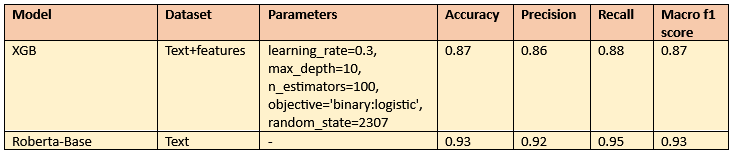

### Best ML models: XGB

In [ ]:
xgb = XGBClassifier()

params = {
    'learning_rate': 0.3,
    'max_depth': 10,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'random_state': 2307
}
xgb.set_params(**params)

# Fit the model
xgb.fit(X_train_vectorized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2307, ...)

In [ ]:
# Evaluate the model on TEST SET
y_pred_xgb = xgb.predict(X_test_vectorized)

#Accuracy score
acs_xgb=metrics.accuracy_score(y_test, y_pred_xgb)

#Precision value
pv_xgb=metrics.precision_score(y_test, y_pred_xgb)

#Recall value
rcl_xgb=metrics.recall_score(y_test, y_pred_xgb)

#Macro F1 score
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print("\tON TEST SET", "-------"*2)
print("\tAccuracy: {:.5f}".format(acs_xgb))
print("\tPrecision Value: {:.5f}".format(pv_xgb))
print("\tRecall: {:.5f}".format(rcl_xgb))
print("\tF1 score macro: {:.5f}".format(f1_macro_xgb))

	ON TEST SET --------------
	Accuracy: 0.86862
	Precision Value: 0.86402
	Recall: 0.87720
	F1 score macro: 0.86859


### Best Transformer Model: Roberta-Base

In [ ]:
model.eval()

test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in dataloader_test:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        test_predictions.extend(torch.argmax(logits, dim=1).tolist())
        test_true_labels.extend(labels.tolist())

In [ ]:
#Accuracy score
acs_roberta_test=metrics.accuracy_score(test_true_labels, test_predictions)

#Precision value
pv_roberta_test=metrics.precision_score(test_true_labels, test_predictions)

#Recall value
rcl_roberta_test=metrics.recall_score(test_true_labels, test_predictions)

#Macro F1 score
f1_macro_roberta_test = f1_score(test_true_labels, test_predictions, average='macro')

print("Accuracy: ", acs_roberta_test)
print("Precision Value: ", pv_roberta_test)
print("Recall: ", rcl_roberta_test)
print("F1 score macro:", f1_macro_roberta_test)

Accuracy:  0.9334252511325586
Precision Value:  0.9217027746104143
Recall:  0.9483770043019163
F1 score macro: 0.9333934129101793


# **Subtask 1** - *Spanish*

We now load the spanish dataset for subtask 1.

The analysis that we carried on is pretty similar to the English case. Following this assumption, we inserted only the most relevant outcomes.

In [ ]:
task1_es_filenameTSV = r"/content/gdrive/MyDrive/PROJ/AUTEXTIFICATION/subtask_1/es/train.tsv"

print(dataset_task1_es)

In [ ]:
dataset_task1_es=pd.read_csv(task1_es_filenameTSV,sep='\t')

print(dataset_task1_es)

          id                                               text      label
0       5464  Entrada en vigor. La presente Directiva entrar...      human
1      30129  Preguntas: 1. ¿Cuáles son los principales argu...  generated
2      19553  ¿Desea algo? Póngame una caja de madera. ¿Qué ...  generated
3      13005  @victor28088 1665 Tweets no originales, que as...      human
4      16919  De pequeño Dios me dio a elegir entre tener un...      human
...      ...                                                ...        ...
32057  16850  Mamá, ¿por qué no me despertaste? Te hable 5 v...      human
32058   6265  . Artículo 2. Los Estados miembros aplicarán l...      human
32059  11284  Mi memoria es:  5% de los médicos tienen una ...  generated
32060    860  APROBAR el proyecto de resolución que se adjun...  generated
32061  15795  Siento que todo el mundo se alejó de mí por se...      human

[32062 rows x 3 columns]


Dataset is approximately balanced:

In [ ]:
print('Spanish data:\n')
counts_es = dataset_task1_es['label'].value_counts()
print(counts_es)

Spanish data:

generated    16275
human        15787
Name: label, dtype: int64


In [ ]:
#Splitting the dataset in training, validation and test sets.
train_df1_es, temp_df1_es, train_labels_es, temp_labels_es = train_test_split(dataset_task1_es['text'], labels_es, test_size=0.3, stratify=labels_es, random_state=2307)
val_df1_es, test_df1_es, val_labels_es, test_labels_es = train_test_split(temp_df1_es, temp_labels_es, test_size=0.5, stratify=temp_labels_es, random_state=2307)

### Feature extraction
To write a condensed notebook we do not rewrite all the feature extraction functions for spanish, which are analogous to the english case. The results (text + extracted features) is saved in the following dataset.

**NB:** The features extracted through NTLK (VV1, NV) are not available for spanish. The SpaCy model we adopted to extract spanish features is *es_core_news_sm*, trained on news and media written data




In [ ]:
train_df1_es_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/train_df1_es_features_Step7.csv')
val_df1_es_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/val_df1_es_features_Step7.csv')
test_df1_es_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/test_df1_es_features_Step7.csv')

### Data visualization



In [ ]:
train_df1_es_features['pos_tags'] = train_df1_es_features['pos_tags'].apply(ast.literal_eval)
train_df1_es_features['ner_tags'] = train_df1_es_features['ner_tags'].apply(ast.literal_eval)
train_df1_es_features['dep_tags'] = train_df1_es_features['dep_tags'].apply(ast.literal_eval)

val_df1_es_features['pos_tags'] = val_df1_es_features['pos_tags'].apply(ast.literal_eval)
val_df1_es_features['ner_tags'] = val_df1_es_features['ner_tags'].apply(ast.literal_eval)
val_df1_es_features['dep_tags'] = val_df1_es_features['dep_tags'].apply(ast.literal_eval)

test_df1_es_features['pos_tags'] = test_df1_es_features['pos_tags'].apply(ast.literal_eval)
test_df1_es_features['ner_tags'] = test_df1_es_features['ner_tags'].apply(ast.literal_eval)
test_df1_es_features['dep_tags'] = test_df1_es_features['dep_tags'].apply(ast.literal_eval)

In [ ]:
# Initialize dictionaries to store counts
human_pos_counts = {}
human_ner_counts = {}
human_dep_counts = {}
gen_pos_counts = {}
gen_ner_counts = {}
gen_dep_counts = {}

# Iterate over the rows in the data frame
for i,label in enumerate(train_df1_es_features['label']):
    if label == 1:
      for token in train_df1_es_features['pos_tags'][i]:
        if token not in human_pos_counts:
            human_pos_counts[token] = 1
        else:
            human_pos_counts[token] += 1
      for token in train_df1_es_features['ner_tags'][i]:
        if token not in human_ner_counts:
            human_ner_counts[token] = 1
        else:
            human_ner_counts[token] += 1
      for token in train_df1_es_features['dep_tags'][i]:
        if token not in human_dep_counts:
            human_dep_counts[token] = 1
        else:
            human_dep_counts[token] += 1

    elif label == 0:
      for token in train_df1_es_features['pos_tags'][i]:
        if token not in gen_pos_counts:
            gen_pos_counts[token] = 1
        else:
            gen_pos_counts[token] += 1
      for token in train_df1_es_features['ner_tags'][i]:
        if token not in gen_ner_counts:
            gen_ner_counts[token] = 1
        else:
            gen_ner_counts[token] += 1
      for token in train_df1_es_features['dep_tags'][i]:
        if token not in gen_dep_counts:
            gen_dep_counts[token] = 1
        else:
            gen_dep_counts[token] += 1

# Calculate the total number of tags for each category
total_human_pos = sum(human_pos_counts.values())
total_gen_pos = sum(gen_pos_counts.values())
total_human_ner = sum(human_ner_counts.values())
total_gen_ner = sum(gen_ner_counts.values())
total_human_dep = sum(human_dep_counts.values())
total_gen_dep = sum(gen_dep_counts.values())

# Calculate the percentage of each tag for each category
human_pos_perc = {pos: count/total_human_pos*100 for pos, count in human_pos_counts.items()}
gen_pos_perc = {pos: count/total_gen_pos*100 for pos, count in gen_pos_counts.items()}
human_ner_perc = {ner: count/total_human_ner*100 for ner, count in human_ner_counts.items()}
gen_ner_perc = {ner: count/total_gen_ner*100 for ner, count in gen_ner_counts.items()}
human_dep_perc = {dep: count/total_human_dep*100 for dep, count in human_dep_counts.items()}
gen_dep_perc = {dep: count/total_gen_dep*100 for dep, count in gen_dep_counts.items()}

human_ner_perc = {k: v for k, v in human_ner_perc.items() if k != ''}
gen_ner_perc = {k: v for k, v in gen_ner_perc.items() if k != ''}

# Calculate the squared differences for POS
sq_diff_pos = {pos: (human_pos_perc.get(pos, 0) - gen_pos_perc.get(pos, 0))**2 for pos in set(human_pos_perc) | set(gen_pos_perc)}
sq_diff_ner = {ner: (human_ner_perc.get(ner, 0) - gen_ner_perc.get(ner, 0))**2 for ner in set(human_ner_perc) | set(gen_ner_perc)}
sq_diff_dep = {dep: (human_dep_perc.get(dep, 0) - gen_dep_perc.get(dep, 0))**2 for dep in set(human_dep_perc) | set(gen_dep_perc)}

**POS tags**:

<ipython-input-102-eb2c85087015>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_keys, rotation=90)


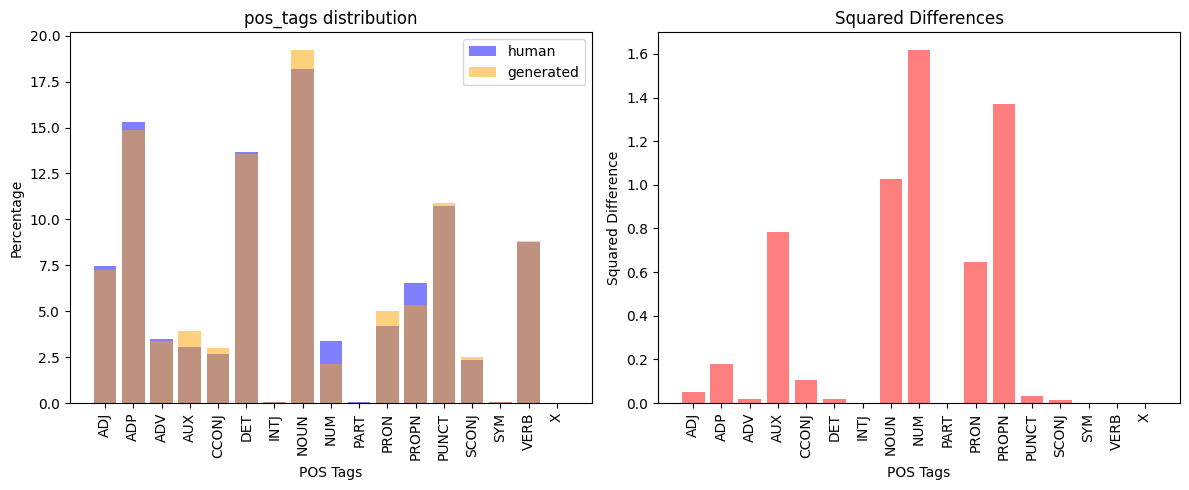

In [ ]:
sorted_keys = sorted(set(human_pos_perc.keys()).union(gen_pos_perc.keys()))

# Plot histograms for POS
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

human_values = [human_pos_perc[key] for key in sorted_keys]
gen_values = [gen_pos_perc[key] for key in sorted_keys]
axs[0].bar(sorted_keys, human_values, alpha=0.5, color='blue', label='human')
axs[0].bar(sorted_keys, gen_values, alpha=0.5, color='orange', label='generated')
axs[0].set_xlabel('POS Tags')
axs[0].set_ylabel('Percentage')
axs[0].set_title('pos_tags distribution')
axs[0].legend()

sq_diff_values = [sq_diff_pos[key] for key in sorted_keys]
axs[1].bar(sorted_keys, sq_diff_values, alpha=0.5, color='red')
axs[1].set_xlabel('POS Tags')
axs[1].set_ylabel('Squared Difference')
axs[1].set_title('Squared Differences')

for ax in axs:
    ax.set_xticklabels(sorted_keys, rotation=90)

plt.tight_layout()
plt.show()

The only sensitive difference from English datatest is *Aux* tag.

**NER tags**:

<ipython-input-103-cda25e7f4160>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_keys, rotation=90)


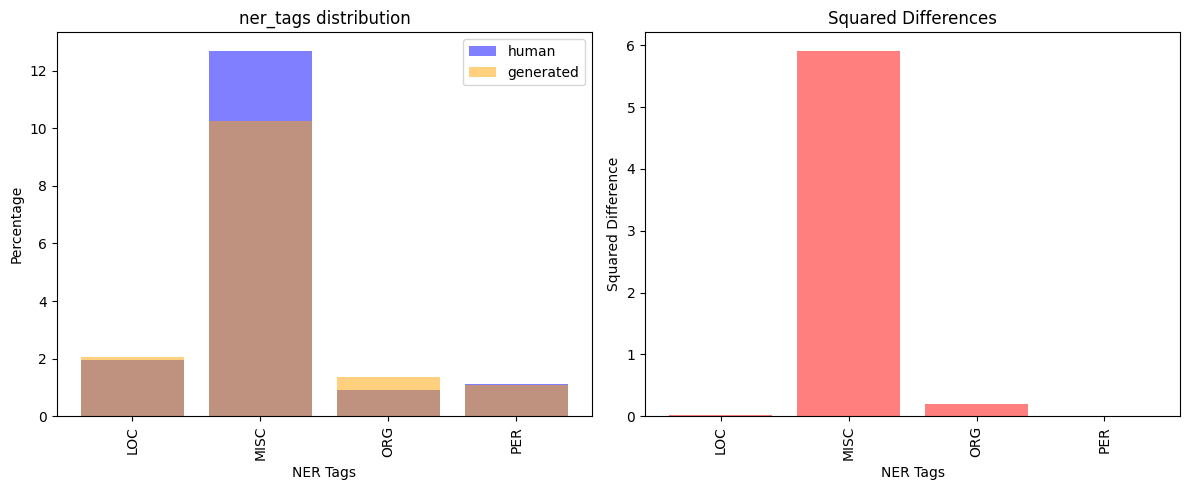

In [ ]:
sorted_keys = sorted(set(human_ner_perc.keys()).union(gen_ner_perc.keys()))

# Plot histograms for NER
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

human_values = [human_ner_perc[key] for key in sorted_keys]
gen_values = [gen_ner_perc[key] for key in sorted_keys]
axs[0].bar(sorted_keys, human_values, alpha=0.5, color='blue', label='human')
axs[0].bar(sorted_keys, gen_values, alpha=0.5, color='orange', label='generated')
axs[0].set_xlabel('NER Tags')
axs[0].set_ylabel('Percentage')
axs[0].set_title('ner_tags distribution')
axs[0].legend()

sq_diff_values = [sq_diff_ner[key] for key in sorted_keys]
axs[1].bar(sorted_keys, sq_diff_values, alpha=0.5, color='red')
axs[1].set_xlabel('NER Tags')
axs[1].set_ylabel('Squared Difference')
axs[1].set_title('Squared Differences')

for ax in axs:
    ax.set_xticklabels(sorted_keys, rotation=90)

plt.tight_layout()
plt.show()

In this case the Tags are different from English so it is difficult to make a comparison

**DEP tags**:

<ipython-input-104-539f1c91e6f5>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_keys, rotation=90)


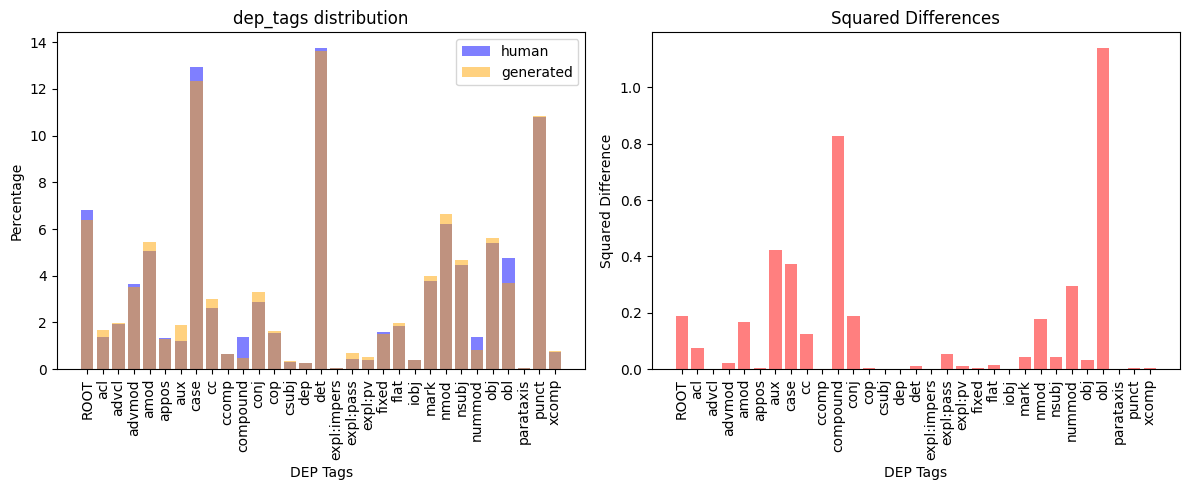

In [ ]:
sorted_keys = sorted(set(human_dep_perc.keys()).union(gen_dep_perc.keys()))

# Plot histograms for NER
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

human_values = [human_dep_perc[key] for key in sorted_keys]
gen_values = [gen_dep_perc[key] for key in sorted_keys]
axs[0].bar(sorted_keys, human_values, alpha=0.5, color='blue', label='human')
axs[0].bar(sorted_keys, gen_values, alpha=0.5, color='orange', label='generated')
axs[0].set_xlabel('DEP Tags')
axs[0].set_ylabel('Percentage')
axs[0].set_title('dep_tags distribution')
axs[0].legend()

sq_diff_values = [sq_diff_dep[key] for key in sorted_keys]
axs[1].bar(sorted_keys, sq_diff_values, alpha=0.5, color='red')
axs[1].set_xlabel('DEP Tags')
axs[1].set_ylabel('Squared Difference')
axs[1].set_title('Squared Differences')

for ax in axs:
    ax.set_xticklabels(sorted_keys, rotation=90)

plt.tight_layout()
plt.show()

The most relevant differences human-generated are Compound and Oblique, that are nominal (noun, pronoun, noun phrase) functioning as a non-core (oblique) argument or adjunct.

In [ ]:
# Split your dataset into two classes
class_1 = train_df1_es_features[train_df1_es_features['label'] == 1]
class_2 = train_df1_es_features[train_df1_es_features['label'] == 0]

In [ ]:
#To get only numerical features
train_columns_nc=train_df1_es_features.columns
columns_nc_train_numeric=train_df1_es_features.copy()

columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="text")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="pos_tags")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="ner_tags")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="dep_tags")
columns_nc_train_numeric=columns_nc_train_numeric.drop(columns="label")
columns_nc_train_numeric

mtld    logttr       ttr      cttr      rttr  svv1  cvv1  \
0       48.304351 -0.534336  0.690476  0.075337  0.830949     2   2.0   
1       27.440000 -0.222392  0.857143  0.229081  0.925820     0   0.0   
2      171.156364 -0.207805  0.865854  0.095618  0.930513     6   6.0   
3       30.870000 -0.222392  0.857143  0.187044  0.925820     2   2.0   
4       19.634984 -1.530515  0.346154  0.039194  0.588348    51   1.4   
...           ...       ...       ...       ...       ...   ...   ...   
22438   67.760000 -0.137504  0.909091  0.193819  0.953463     3   3.0   
22439   83.006000 -0.433897  0.740260  0.084360  0.860383    10  10.0   
22440    0.000000  0.000000  1.000000  0.242536  1.000000     2   2.0   
22441    0.000000  0.000000  1.000000  0.258199  1.000000     0   0.0   
22442  144.500000 -0.259644  0.835294  0.090600  0.913944     6   6.0   

               lv       vv2      advv  ...      CN_C      CN_T      VP_T  \
0       70.238095  0.600000  1.000000  ...  0.053191  0.833333  0.333333   
1      100.000000  1.000000  1.000000  ...  0.000000  0.000000  1.000000   
2       90.243902  0.837838  1.000000  ...  0.054945  1.000000  1.000000   
3       90.476190  0.600000  0.000000  ...  0.000000  0.000000  0.000000   
4       35.897436  0.581967  0.285714  ...  0.000000  0.000000  0.714286   
...           ...       ...       ...  ...       ...       ...       ...   
22438   90.909091  0.700000  1.000000  ...  0.000000  0.000000  1.000000   
22439   80.519481  0.900990  0.555556  ...  0.097561  1.600000  1.000000   
22440  100.000000  0.600000  1.000000  ...  0.100000  2.000000  1.000000   
22441  100.000000  1.000000  1.000000  ...  0.000000  0.000000  1.000000   
22442   88.235294  0.837838  0.750000  ...  0.043478  0.800000  1.000000   

       perc_punctuations  vocab_complexity_avg  avg_sent_len  \
0                   0.16                  0.66         28.00   
1                   0.45                  0.82          7.00   
2                   0.10                  0.85         20.50   
3                   0.29                  0.80         10.50   
4                   0.09                  0.33         11.14   
...                  ...                   ...           ...   
22438               0.08                  0.86         22.00   
22439               0.06                  0.73         15.40   
22440               0.15                  1.00         17.00   
22441               0.35                  1.00          7.50   
22442               0.08                  0.81         17.00   

       avg_phrase_length  ease_read  school_grade  vocab_size  
0                   7.64      26.14          17.0          52  
1                   3.50      64.37           8.0           9  
2                   9.11      50.67          14.0          70  
3                  10.50      60.82           7.0          16  
4                   9.75      60.21           9.0          26  
...                  ...        ...           ...         ...  
22438               7.33      74.53           8.0          19  
22439              12.83      55.84          12.0          56  
22440               4.25      71.14           9.0          17  
22441               5.00      63.86           8.0          13  
22442              10.62      62.68           8.0          69  

[22443 rows x 31 columns]

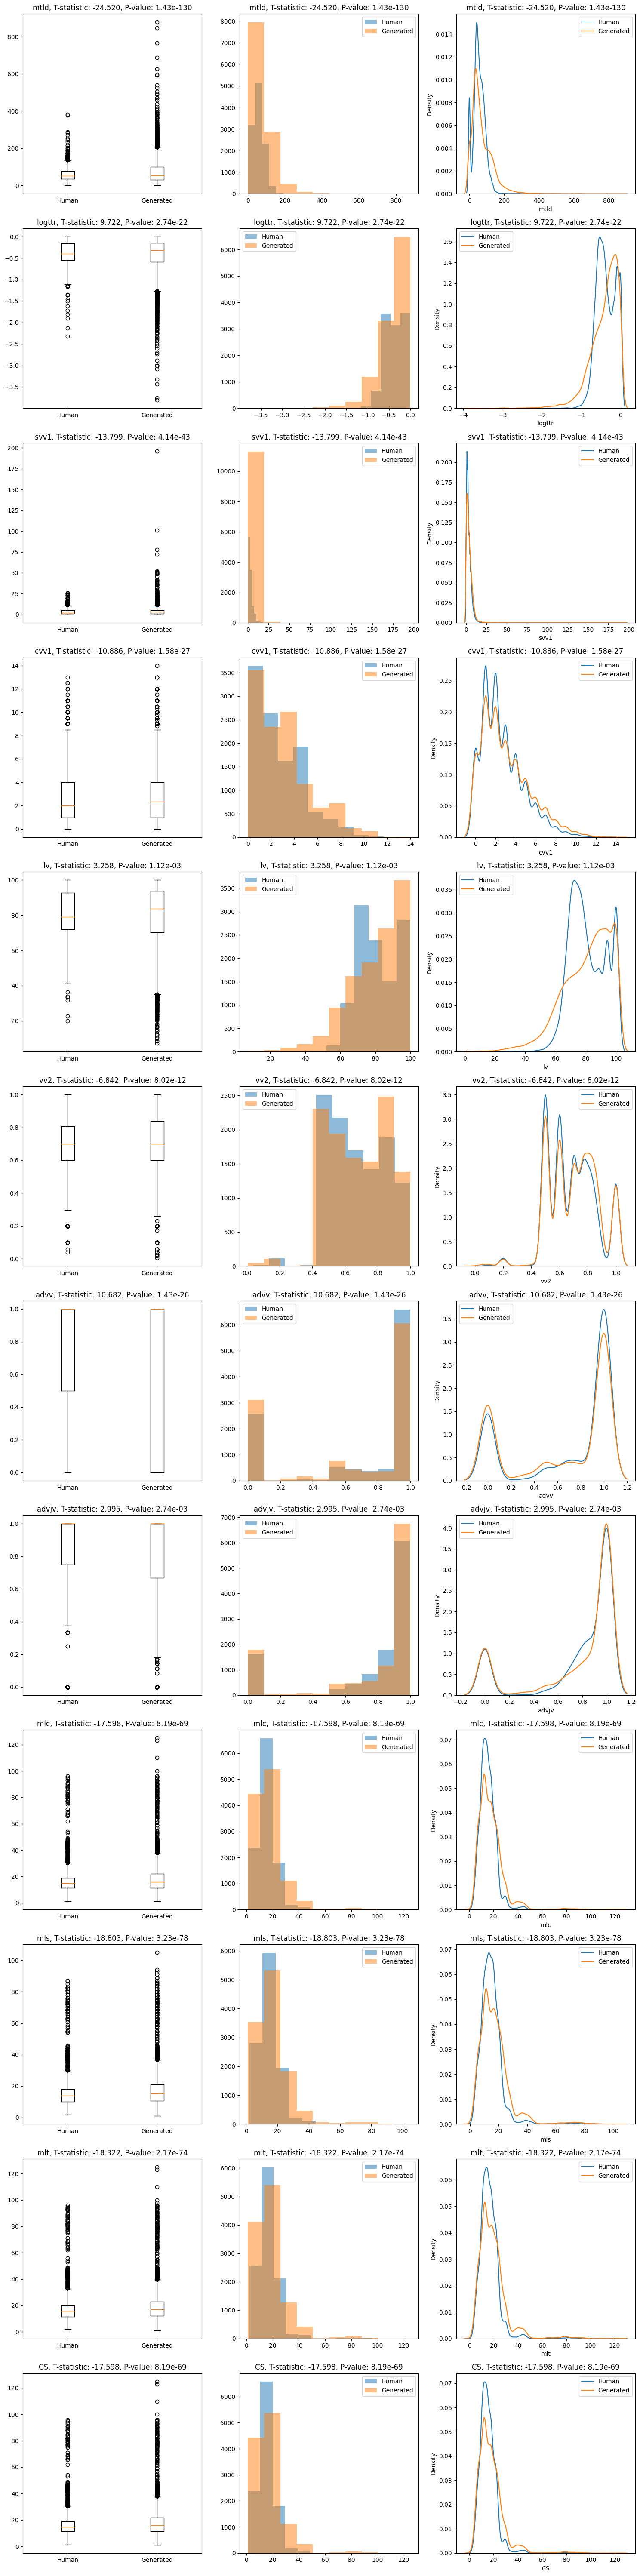

In [ ]:
# List of features
features = ['mtld', 'logttr', 'svv1', 'cvv1', 'lv', 'vv2', 'advv', 'advjv', 'mlc', 'mls', 'mlt', 'CS']

n_rows = len(features)
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, feature in enumerate(features):
    # T-statistic and p-value
    t_stat, p_val = stats.ttest_ind(class_1[feature], class_2[feature], equal_var=False)
    p_val_exp = "{:.2e}".format(p_val)

    # Plot boxplot
    axes[i, 0].boxplot([class_1[feature], class_2[feature]], labels=['Human', 'Generated'])
    axes[i, 0].set_title("{}, T-statistic: {:.3f}, P-value: {}".format(feature, t_stat, p_val_exp))

    # Plot histogram
    axes[i, 1].hist(class_1[feature], alpha=0.5, label='Human')
    axes[i, 1].hist(class_2[feature], alpha=0.5, label='Generated')
    axes[i, 1].set_title("{}, T-statistic: {:.3f}, P-value: {}".format(feature, t_stat, p_val_exp))
    axes[i, 1].legend()

    # Plot density plot
    sns.kdeplot(data=class_1[feature], label='Human', ax=axes[i, 2])
    sns.kdeplot(data=class_2[feature], label='Generated', ax=axes[i, 2])
    axes[i, 2].set_title("{}, T-statistic: {:.3f}, P-value: {}".format(feature, t_stat, p_val_exp))
    axes[i, 2].legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

### Dimensionality reduction

#### Correlation matrix

In [ ]:
corr_matrix = train_df1_es_features.corr()
corr_matrix

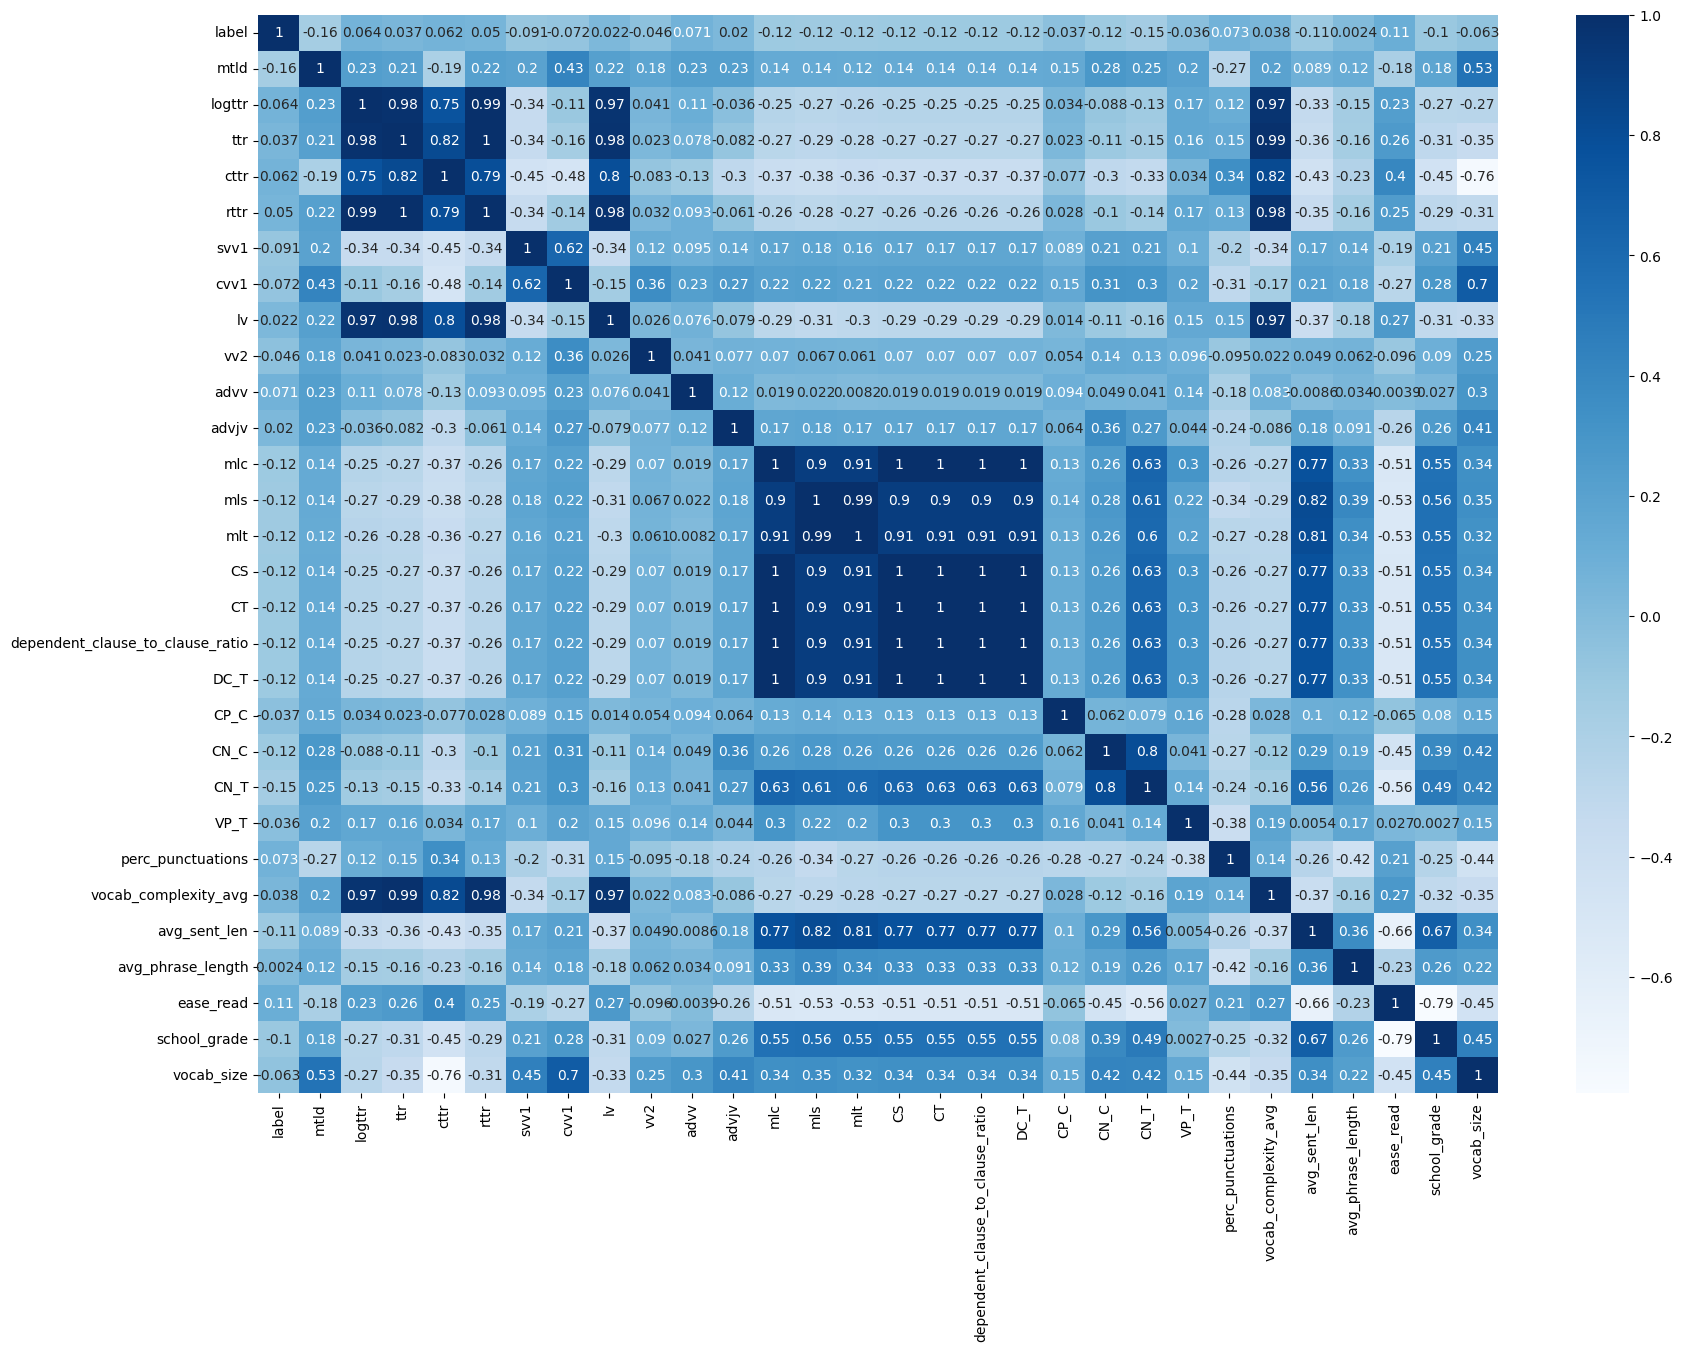

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))
# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Show the plot
plt.show()

In [ ]:
dicts = dict.fromkeys(corr_matrix.index, 0)
dimension=len(corr_matrix)
for i in range(dimension):
    indice=corr_matrix.index[i]
    for j in range(i+1, dimension):
        colonna=corr_matrix.columns[j]
        value=corr_matrix.values[i,j]*100
        if (abs(value)>70):
            dicts[indice]+=1
            dicts[colonna]+=1
            print("The variable", indice,"and the variable", colonna, "have a correlation of {:.2f}".format(value), "%\n")
dicts

The variable logttr and the variable ttr have a correlation of 97.93 %

The variable logttr and the variable cttr have a correlation of 75.50 %

The variable logttr and the variable rttr have a correlation of 99.33 %

The variable logttr and the variable lv have a correlation of 96.65 %

The variable logttr and the variable vocab_complexity_avg have a correlation of 96.57 %

The variable ttr and the variable cttr have a correlation of 81.92 %

The variable ttr and the variable rttr have a correlation of 99.60 %

The variable ttr and the variable lv have a correlation of 97.78 %

The variable ttr and the variable vocab_complexity_avg have a correlation of 98.84 %

The variable cttr and the variable rttr have a correlation of 79.35 %

The variable cttr and the variable lv have a correlation of 79.68 %

The variable cttr and the variable vocab_complexity_avg have a correlation of 82.01 %

The variable cttr and the variable vocab_size have a correlation of -76.32 %

The variable rttr and t

{'label': 0,
 'mtld': 0,
 'logttr': 5,
 'ttr': 5,
 'cttr': 6,
 'rttr': 5,
 'svv1': 0,
 'cvv1': 0,
 'lv': 5,
 'vv2': 0,
 'advv': 0,
 'advjv': 0,
 'mlc': 7,
 'mls': 7,
 'mlt': 7,
 'CS': 7,
 'CT': 7,
 'dependent_clause_to_clause_ratio': 7,
 'coordinate_phrases_per_clause': 0,
 'CP_T': 0,
 'DC_T': 7,
 'CP_C': 0,
 'CN_C': 1,
 'CN_T': 1,
 'VP_T': 0,
 'perc_punctuations': 0,
 'vocab_complexity_avg': 5,
 'avg_sent_len': 7,
 'avg_phrase_length': 0,
 'ease_read': 1,
 'school_grade': 1,
 'vocab_size': 1}

In [ ]:
# remove correlated variables

nomi=[]
for i in range(dimension):
    indice=corr_matrix.index[i]
    for j in range(i+1, dimension):
        colonna=corr_matrix.columns[j]
        value=corr_matrix.values[i,j]*100
        if (abs(value)>70):
            if(dicts[indice]<dicts[colonna]):
                nomi.append(indice)
            else:
                nomi.append(colonna)
#names
colonne_to_remove=np.unique(nomi)
print(f'features da eliminare:\n{colonne_to_remove}')

features da eliminare:
['CN_T' 'CS' 'CT' 'DC_T' 'avg_sent_len' 'dependent_clause_to_clause_ratio'
 'logttr' 'lv' 'mls' 'mlt' 'rttr' 'school_grade' 'ttr'
 'vocab_complexity_avg' 'vocab_size']


In [ ]:
train_df1_es_features_not_correlated = train_df1_es_features.copy()
for colonna in colonne_to_remove:
    train_df1_es_features_not_correlated=train_df1_es_features_not_correlated.drop(columns=str(colonna))
print(f'cosa rimane?\n{train_df1_es_features_not_correlated.columns}')

val_df1_es_features_not_correlated = val_df1_es_features.copy()
for colonna in colonne_to_remove:
    val_df1_es_features_not_correlated=val_df1_es_features_not_correlated.drop(columns=str(colonna))

test_df1_es_features_not_correlated = test_df1_es_features.copy()
for colonna in colonne_to_remove:
    test_df1_es_features_not_correlated=test_df1_es_features_not_correlated.drop(columns=str(colonna))

cosa rimane?
Index(['text', 'pos_tags', 'ner_tags', 'dep_tags', 'label', 'mtld', 'cttr',
       'svv1', 'cvv1', 'vv2', 'advv', 'advjv', 'mlc',
       'coordinate_phrases_per_clause', 'CP_T', 'CP_C', 'CN_C', 'VP_T',
       'perc_punctuations', 'avg_phrase_length', 'ease_read'],
      dtype='object')


### Datasets

We applied the same analysis that we previous showed for English task. Anyway, we decided to include just the best dataset (text + features) with the best model.

We vectorized the text and Pos, Ner and Dep Tags as we did in Subask1-Engliah with CountVectorizer. Then We included numerical features.


## Most performing models

### XGB

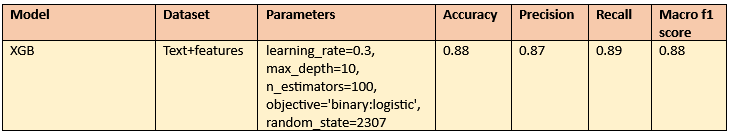

In [ ]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier()

params = {
    'learning_rate': 0.3,
    'max_depth': 10,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'random_state': 2307
}
xgb.set_params(**params)

xgb.fit(X_train_vectorized, y_train)

y_pred_xgb = xgb.predict(X_val_vectorized)

In [ ]:
#Accuracy score
acs_xgb=metrics.accuracy_score(y_val, y_pred_xgb)

#Precision value
pv_xgb=metrics.precision_score(y_val, y_pred_xgb)

#Recall value
rcl_xgb=metrics.recall_score(y_val, y_pred_xgb)

#Macro F1 score
f1_macro_xgb = f1_score(y_val, y_pred_xgb, average='macro')

print("Learning rate: 0.3 (best predicted on english data)")
print("Accuracy: ", acs_xgb)
print("Precision Value: ", pv_xgb)
print("Recall: ", rcl_xgb)
print("F1 score macro:", f1_macro_xgb)

Learning rate: 0.3 (best predicted on english data)
Accuracy:  0.8787689748388439
Precision Value:  0.8711018711018711
Recall:  0.8847128378378378
F1 score macro: 0.8787621807133651


### Transformer Models

The perfomances on the validation set:

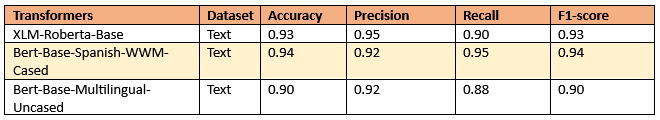

In [ ]:
train_texts_es=train_df1_es.tolist()
val_texts_es=val_df1_es.tolist()
test_texts_es=test_df1_es.tolist()

train_labels_es=train_labels_es
val_labels_es=val_labels_es
test_labels_es=test_labels_es

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### XLM-RoBERTa

It is a model pre-trained on 2.5TB of filtered CommonCrawl data containing 100 languages.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

In [ ]:
encoded_data_train_es = tokenizer(train_texts_es, padding=True, truncation=True, return_tensors='pt')
encoded_data_val_es = tokenizer(val_texts_es, padding=True, truncation=True, return_tensors='pt')
encoded_data_test_es = tokenizer(test_texts_es, padding=True, truncation=True, return_tensors='pt')

In [ ]:
#TRAIN_es
input_ids_train_es = encoded_data_train_es['input_ids']
attention_masks_train_es = encoded_data_train_es['attention_mask']
labels_train_es = torch.tensor(train_labels_es)

dataset_train_es = TensorDataset(input_ids_train_es, attention_masks_train_es, labels_train_es)
dataloader_train_es = DataLoader(dataset_train_es, batch_size=16)

#VAL_es
input_ids_val_es = encoded_data_val_es['input_ids']
attention_masks_val_es = encoded_data_val_es['attention_mask']
labels_val_es = torch.tensor(val_labels_es)

dataset_val_es = TensorDataset(input_ids_val_es, attention_masks_val_es, labels_val_es)
dataloader_val_es = DataLoader(dataset_val_es, batch_size=16)

#TEST_es
input_ids_test_es = encoded_data_test_es['input_ids']
attention_masks_test_es = encoded_data_test_es['attention_mask']
labels_test_es = torch.tensor(test_labels_es)

dataset_test_es = TensorDataset(input_ids_test_es, attention_masks_test_es, labels_test_es)
dataloader_test_es = DataLoader(dataset_test_es, batch_size=16)

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 3

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
model.to(device)

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train_es:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device).long()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model on the val set after each epoch
    model.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val_es:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")
    torch.save(model.state_dict(), f"model_epoch_{epoch + 1}.pt")

Epoch 1: Accuracy 0.919
Epoch 2: Accuracy 0.914
Epoch 3: Accuracy 0.928


In [ ]:
#Accuracy score
acs_xlmroberta=metrics.accuracy_score(true_labels, predictions)

#precision value
pv_xlmroberta=metrics.precision_score(true_labels, predictions)

#recall value
rcl_xlmroberta=metrics.recall_score(true_labels, predictions)

f1_macro_xlmroberta = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_xlmroberta)
print("Precision Value: ", pv_xlmroberta)
print("Recall: ", rcl_xlmroberta)
print("F1 score macro:", f1_macro_xlmroberta)

Accuracy:  0.9284674568517364
Precision Value:  0.9485815602836879
Recall:  0.9037162162162162
F1 score macro: 0.9283614385705754


#### Bert-Base-Spanish-WWM-Cased
It is a BERT model trained on a big Spanish corpus. BETO is of size similar to a BERT-Base and was trained with the Whole Word Masking technique.

In [ ]:
# Load the pre-trained BETO tokenizer and model
model_name = 'dccuchile/bert-base-spanish-wwm-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
encoded_data_train_es = tokenizer(train_texts_es, padding=True, truncation=True, return_tensors='pt')
encoded_data_val_es = tokenizer(val_texts_es, padding=True, truncation=True, return_tensors='pt')
encoded_data_test_es = tokenizer(test_texts_es, padding=True, truncation=True, return_tensors='pt')

In [ ]:
#TRAIN_es
input_ids_train_es = encoded_data_train_es['input_ids']
attention_masks_train_es = encoded_data_train_es['attention_mask']
labels_train_es = torch.tensor(train_labels_es)

dataset_train_es = TensorDataset(input_ids_train_es, attention_masks_train_es, labels_train_es)
dataloader_train_es = DataLoader(dataset_train_es, batch_size=16)

#VAL_es
input_ids_val_es = encoded_data_val_es['input_ids']
attention_masks_val_es = encoded_data_val_es['attention_mask']
labels_val_es = torch.tensor(val_labels_es)

dataset_val_es = TensorDataset(input_ids_val_es, attention_masks_val_es, labels_val_es)
dataloader_val_es = DataLoader(dataset_val_es, batch_size=16)

#TEST_es
input_ids_test_es = encoded_data_test_es['input_ids']
attention_masks_test_es = encoded_data_test_es['attention_mask']
labels_test_es = torch.tensor(test_labels_es)

dataset_test_es = TensorDataset(input_ids_test_es, attention_masks_test_es, labels_test_es)
dataloader_test_es = DataLoader(dataset_test_es, batch_size=16)

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 3

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train_es:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device).long()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model on the val set after each epoch
    model.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val_es:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")
    torch.save(model.state_dict(), f"model_epoch_{epoch + 1}.pt")

Epoch 1: Accuracy 0.919
Epoch 2: Accuracy 0.928
Epoch 3: Accuracy 0.935


In [ ]:
# Validation performance

#accuracy score
acs_deroberta=metrics.accuracy_score(true_labels, predictions)

#precision value
pv_deroberta=metrics.precision_score(true_labels, predictions)

#recall value
rcl_deroberta=metrics.recall_score(true_labels, predictions)

f1_macro_deroberta = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_deroberta)
print("Precision Value: ", pv_deroberta)
print("Recall: ", rcl_deroberta)
print("F1 score macro:", f1_macro_deroberta)

Accuracy:  0.9351216469120399
Precision Value:  0.9216570959803118
Recall:  0.948902027027027
F1 score macro: 0.9351216216636935


#### Bert-Base-Multilingual-Uncased

It is a pretrained model on the top 102 languages with the largest Wikipedia using a masked language modeling (MLM) objective.
This model is uncased: it does not make a difference between english and English.

In [ ]:
model_name = 'bert-base-multilingual-uncased'

In [ ]:
bert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
bert = bert.to(device)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
encoded_data_train_es = tokenizer(train_texts_es, padding=True, truncation=True, return_tensors='pt')
encoded_data_val_es = tokenizer(val_texts_es, padding=True, truncation=True, return_tensors='pt')
encoded_data_test_es = tokenizer(test_texts_es, padding=True, truncation=True, return_tensors='pt')

In [ ]:
#TRAIN_es
input_ids_train_es = encoded_data_train_es['input_ids']
attention_masks_train_es = encoded_data_train_es['attention_mask']
labels_train_es = torch.tensor(train_labels_es)

dataset_train_es = TensorDataset(input_ids_train_es, attention_masks_train_es, labels_train_es)
dataloader_train_es = DataLoader(dataset_train_es, batch_size=16)

#VAL_es
input_ids_val_es = encoded_data_val_es['input_ids']
attention_masks_val_es = encoded_data_val_es['attention_mask']
labels_val_es = torch.tensor(val_labels_es)

dataset_val_es = TensorDataset(input_ids_val_es, attention_masks_val_es, labels_val_es)
dataloader_val_es = DataLoader(dataset_val_es, batch_size=16)

#TEST_es
input_ids_test_es = encoded_data_test_es['input_ids']
attention_masks_test_es = encoded_data_test_es['attention_mask']
labels_test_es = torch.tensor(test_labels_es)

dataset_test_es = TensorDataset(input_ids_test_es, attention_masks_test_es, labels_test_es)
dataloader_test_es = DataLoader(dataset_test_es, batch_size=16)

In [ ]:
optimizer = AdamW(bert.parameters(), lr=1e-5)
epochs = 3

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
bert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train_es:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device).long()

        outputs = bert(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model on the val set after each epoch
    bert.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val_es:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = bert(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")
    torch.save(bert.state_dict(), f"model_epoch_{epoch + 1}.pt")

Epoch 1: Accuracy 0.879
Epoch 2: Accuracy 0.904
Epoch 3: Accuracy 0.904


In [ ]:
#accuracy score
acs_bert=metrics.accuracy_score(true_labels, predictions)

#precision value
pv_bert=metrics.precision_score(true_labels, predictions)

#recall value
rcl_bert=metrics.recall_score(true_labels, predictions)

f1_macro_bert = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_bert)
print("Precision Value: ", pv_bert)
print("Recall: ", rcl_bert)
print("F1 score macro:", f1_macro_bert)

Accuracy:  0.9039301310043668
Precision Value:  0.9228039041703638
Recall:  0.8783783783783784
F1 score macro: 0.9037846460638871


## Final Results
These are the final results of the best models on the **test set**:

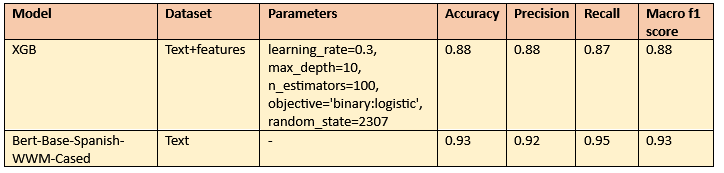

### Best ML models: XGB

In [ ]:
# Evaluate the model
y_pred_xgb_test = xgb.predict(X_test_vectorized)

#Accuracy score
acs_xgb_test=metrics.accuracy_score(y_test, y_pred_xgb_test)

#Precision value
pv_xgb_test=metrics.precision_score(y_test, y_pred_xgb_test)

#Recall value
rcl_xgb_test=metrics.recall_score(y_test, y_pred_xgb_test)

#Macro F1 score
f1_macro_xgb_test = f1_score(y_test, y_pred_xgb_test, average='macro')

print("Learning rate: 0.3 (best predicted on english data)")
print("Accuracy: ", acs_xgb_test)
print("Precision Value: ", pv_xgb_test)
print("Recall: ", rcl_xgb_test)
print("F1 score macro:", f1_macro_xgb_test)

Learning rate: 0.3 (best predicted on english data)
Accuracy:  0.8787941787941788
Precision Value:  0.879948914431673
Recall:  0.8728885135135135
F1 score macro: 0.8787488513109378


### Best Transformer Model: Bert-Base-Spanish-WWM-Cased


In [ ]:
#Test prediction

model.eval()

test_predictions = []
test_true_labels = []

with torch.no_grad():
    for batch in dataloader_test_es:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        test_predictions.extend(torch.argmax(logits, dim=1).tolist())
        test_true_labels.extend(labels.tolist())

In [ ]:
#Test evaluation

#Accuracy score
acs_bert_spanish_test=metrics.accuracy_score(test_true_labels, test_predictions)

#precision value
pv_bert_spanish_test=metrics.precision_score(test_true_labels, test_predictions)

#recall value
rcl_bert_spanish_test=metrics.recall_score(test_true_labels, test_predictions)

f1_macro_bert_spanish_test = f1_score(test_true_labels, test_predictions, average='macro')

print("Accuracy: ", acs_bert_spanish_test)
print("Precision Value: ", pv_bert_spanish_test)
print("Recall: ", rcl_bert_spanish_test)
print("F1 score macro:", f1_macro_bert_spanish_test)

Accuracy:  0.9316008316008316
Precision Value:  0.9173147769136308
Recall:  0.9463682432432432
F1 score macro: 0.9316008286444488


# Mixing languages
We try to concatenate the english and the spanish datasets in order to obtain a bigger frame to work with.

We fine tune a BERT multilingual (cased) model to see if the performance on subtask 1 improves.

In [ ]:
train_df1_en_top5features_5pc_tags = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/train_df1_en_top5features_5pc.csv')
val_df1_en_top5features_5pc_tags = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/val_df1_en_top5features_5pc.csv')
test_df1_en_top5features_5pc_tags = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/test_df1_en_top5features_5pc.csv')

X_train_en = train_df1_en_top5features_5pc_tags['text']
X_val_en = val_df1_en_top5features_5pc_tags['text']
X_test_en = test_df1_en_top5features_5pc_tags['text']
y_train_en = train_df1_en_top5features_5pc_tags['label']
y_val_en = val_df1_en_top5features_5pc_tags['label']
y_test_en = test_df1_en_top5features_5pc_tags['label']

print(type(X_train_en), X_train_en.shape, len(X_train_en[0]), '\n', X_train_en[0])

<class 'pandas.core.series.Series'> (23691,) 409 
 A facial wipe is simply a tool to remove makeup, not to replace your cleansing routine. Always remember, when youre using wipes to remove makeup, youre NOT using them to deep clean your skin. You need to scrub your skin to remove makeup – facial wipes are not a replacement for a good cleansing routine. If you use wipes to remove makeup, youre not properly cleansing your skin. 4. Youre Wasting Money You can


In [ ]:
train_df1_es_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/train_df1_es_features_Step7.csv')
val_df1_es_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/val_df1_es_features_Step7.csv')
test_df1_es_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/test_df1_es_features_Step7.csv')

X_train_es = train_df1_es_features['text']
X_val_es = val_df1_es_features['text']
X_test_es = test_df1_es_features['text']
y_train_es = train_df1_es_features['label']
y_val_es = val_df1_es_features['label']
y_test_es = test_df1_es_features['label']

print(type(X_train_es), X_train_es.shape, len(X_train_es[0]), '\n', X_train_es[0])

<class 'pandas.core.series.Series'> (22443,) 523 
 Artículo 1. Queda restablecida, del 24 de julio al 31 de diciembre de 1992, la percepción de los derechos de aduana aplicables, respecto de terceros países, a la importación en la Comunidad de los productos mencionados en el Anexo, originarios de Hungría. Artículo 2. El presente Reglamento entrará en vigor el tercer día siguiente al de su publicación en el Diario Oficial de las Comunidades Europeas. El presente Reglamento será obligatorio en todos sus elementos y directamente aplicable en cada Estado miembro. Hecho en


In [ ]:
# Concatenate the English and Spanish dataframes
df_en = pd.DataFrame({'text': X_train_en, 'label': y_train_en})
df_es = pd.DataFrame({'text': X_train_es, 'label': y_train_es})
df = pd.concat([df_en, df_es], ignore_index=True)

# Separate the text and label columns
X_train = df['text']
y_train = df['label']

df_en = pd.DataFrame({'text': X_val_en, 'label': y_val_en})
df_es = pd.DataFrame({'text': X_val_es, 'label': y_val_es})
df = pd.concat([df_en, df_es], ignore_index=True)
X_val = df['text']
y_val = df['label']

df_en = pd.DataFrame({'text': X_test_en, 'label': y_test_en})
df_es = pd.DataFrame({'text': X_test_es, 'label': y_test_es})
df = pd.concat([df_en, df_es], ignore_index=True)
X_test = df['text']
y_test = df['label']

# Print the first example to verify the dataframe
print(type(X_train), X_train.shape, len(X_train[0]), '\n', X_train[0])

<class 'pandas.core.series.Series'> (46134,) 409 
 A facial wipe is simply a tool to remove makeup, not to replace your cleansing routine. Always remember, when youre using wipes to remove makeup, youre NOT using them to deep clean your skin. You need to scrub your skin to remove makeup – facial wipes are not a replacement for a good cleansing routine. If you use wipes to remove makeup, youre not properly cleansing your skin. 4. Youre Wasting Money You can


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

encoded_train = tokenizer.batch_encode_plus(
    X_train.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

encoded_val = tokenizer.batch_encode_plus(
    X_val.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

input_ids_train = encoded_train['input_ids']
attention_masks_train = encoded_train['attention_mask']
labels_train = torch.tensor(y_train.tolist())

input_ids_val = encoded_val['input_ids']
attention_masks_val = encoded_val['attention_mask']
labels_val = torch.tensor(y_val.tolist())

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }

    def __len__(self):
        return len(self.input_ids)

In [ ]:
batch_size = 16

train_dataset = CustomDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = CustomDataset(input_ids_val, attention_masks_val, labels_val)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

epochs = 3

# Initialize variables for tracking best accuracy and corresponding model state
best_accuracy = 0.0
best_model_state = None

# Create lists to store training progress
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


for epoch in range(epochs):
    model.train()

    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())

    # Evaluate on validation set
    model.eval()
    val_accuracy = 0
    val_loss = 0

    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
              outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        logits = outputs.logits

        val_loss += loss.item()

        # Calculate validation accuracy
        preds = torch.argmax(logits, dim=1)
        val_accuracy += (preds == labels).float().mean().item()


    val_accuracy /= len(val_dataloader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Check if current accuracy is the best so far
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model_state = model.state_dict()

# Load the best model state
model.load_state_dict(best_model_state)

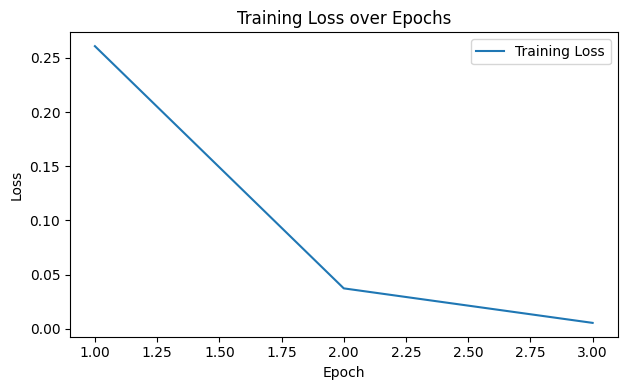

Final Validation Loss: 235.88874
Final Validation Accuracy: 0.86448


In [ ]:
# Plot the training progress
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()


plt.tight_layout()
plt.show()

# Print final performance on the validation set
print(f'Final Validation Loss: {val_losses[-1]:.5f}')
print(f'Final Validation Accuracy: {val_accuracies[-1]:.5f}')

# **Subtask 2** (MultiClass Classification) - *English*

## Preliminary Analysis



### Data preparation

We start from data preparation.

#### Data loading

We load the documents that we will use for this new task.

In this case we have text that has been generated by 6 different models.
The aim of the task is to identify the model that has generated the text.

The task includes an English classification and a Spanish one.

In [ ]:
#Names of files to read from
task2_en_filenameTSV = r"/content/gdrive/MyDrive/PROJ/AUTEXTIFICATION/subtask_2/en/train.tsv"

We print the occurencies of each class, checking if the dataset is balanced:

In [ ]:
#Read the data
dataset_task2_en=pd.read_csv(task2_en_filenameTSV,sep='\t')

#Print the data
print(dataset_task2_en)

          id                                               text label
0       6239  It was not until many years later that it coul...     A
1       9255  Users can then pin these images to their profi...     F
2       1674  The best songs are those that I can sing along...     B
3       5001  I found this book to be poorly written. It was...     D
4      20779  Regulates the application of the EU tariff quo...     E
...      ...                                                ...   ...
22411   6915  The ministry had earlier said it was working w...     B
22412  14431  Once combined, slowly add the melted butter, s...     F
22413   1288  Hightower for this new and wellwritten book!. ...     B
22414   5563  All throughout the whole book this author has ...     D
22415  13237  Once you know the pattern of your menstrual cy...     C

[22416 rows x 3 columns]


In [ ]:
print('English data:\n')
counts_en = dataset_task2_en['label'].value_counts()
print(counts_en)


English data:

D    3870
F    3827
E    3822
C    3687
B    3648
A    3562
Name: label, dtype: int64


The dataset is not dramatically unbalanced so no furhter operations among the classes are recommended.

Before training the models, we split the dataset in three pars: training, validation and test.

In [ ]:
# Encode the labels into 0,1,2,3,4,5
label_encoder = LabelEncoder()
output_l = label_encoder.fit_transform(dataset_task2_en['label'])
for i in range(6):
  print(output_l[i], '=>', dataset_task2_en['label'][i])

0 => A
5 => F
1 => B
3 => D
4 => E
2 => C


We split the dataset into training, validation and test sets:

In [ ]:
train_df2_en, temp_df2_en, train_labels_en, temp_labels_en = train_test_split(dataset_task2_en['text'], output_l, test_size=0.3, stratify=output_l, random_state=2307)
val_df2_en, test_df2_en, val_labels_en, test_labels_en = train_test_split(temp_df2_en, temp_labels_en, test_size=0.5, stratify=temp_labels_en, random_state=2307)

In [ ]:
print(f'training set has shape {train_df2_en.shape} and is associated to {len(train_labels_en)} labels')
print(f'validation set has shape {val_df2_en.shape} and is associated to {len(val_labels_en)} labels')
print(f'testing set has shape {test_df2_en.shape} and is associated to {len(test_labels_en)} labels')

training set has shape (15691,) and is associated to 15691 labels
validation set has shape (3362,) and is associated to 3362 labels
testing set has shape (3363,) and is associated to 3363 labels


## Dimensionality Reduction

### Feature Selection

In [ ]:
train_df2_en_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/train.csv')
val_df2_en_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/validation.csv')
test_df2_en_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/test.csv')

In [ ]:
corr_matrix = train_df2_en_features.corr()

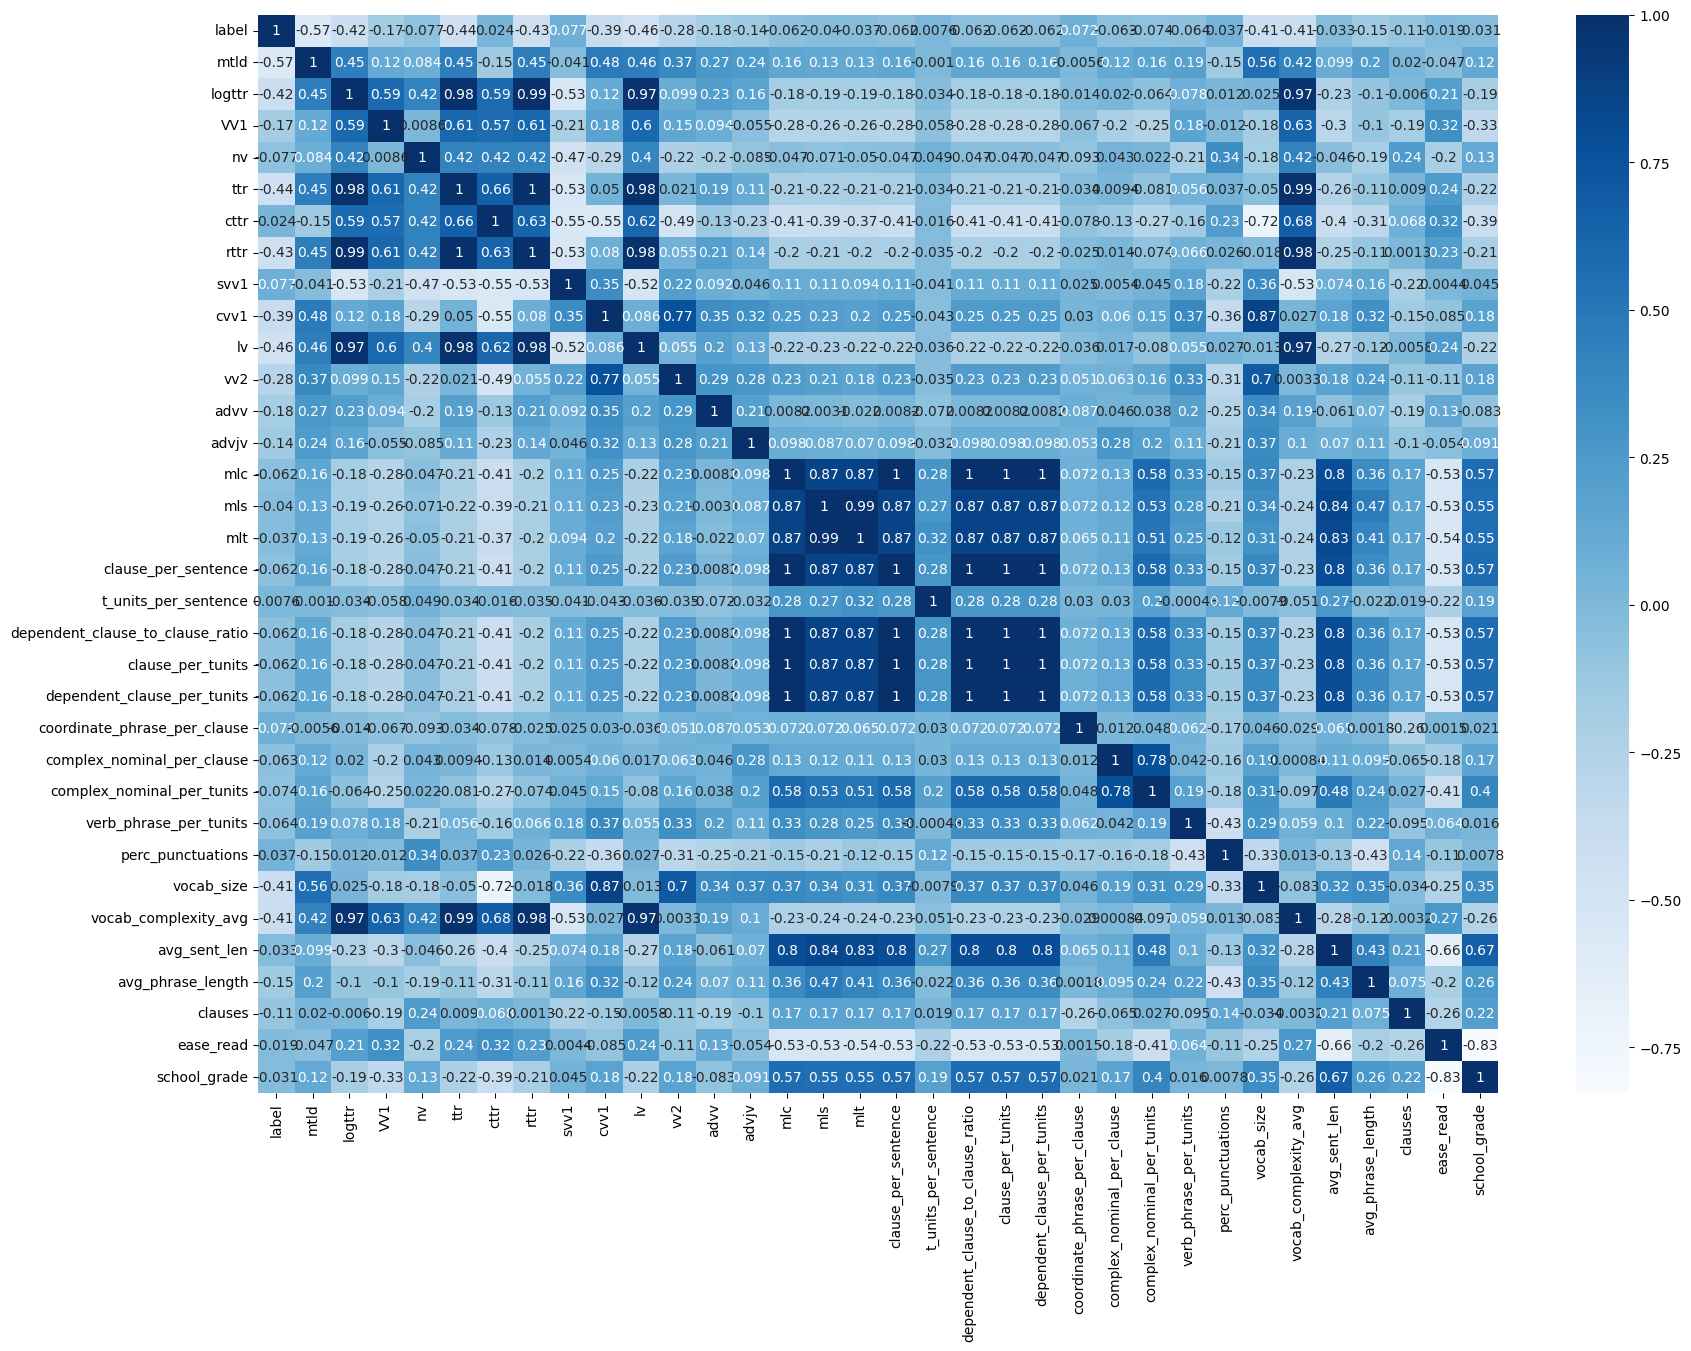

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(corr_matrix, annot=True, cmap='Blues')

plt.show()

In [ ]:
# Remove correlated ones
dicts = dict.fromkeys(corr_matrix.index, 0)
dimension=len(corr_matrix)
for i in range(dimension):
    indice=corr_matrix.index[i]
    for j in range(i+1, dimension):
        colonna=corr_matrix.columns[j]
        value=corr_matrix.values[i,j]*100
        if (abs(value)>70):
            dicts[indice]+=1
            dicts[colonna]+=1
            print("The variable", indice,"and the variable", colonna, "have a correlation of {:.2f}".format(value), "%\n")
dicts

The variable logttr and the variable ttr have a correlation of 98.06 %

The variable logttr and the variable rttr have a correlation of 99.37 %

The variable logttr and the variable lv have a correlation of 97.41 %

The variable logttr and the variable vocab_complexity_avg have a correlation of 96.80 %

The variable ttr and the variable rttr have a correlation of 99.63 %

The variable ttr and the variable lv have a correlation of 98.32 %

The variable ttr and the variable vocab_complexity_avg have a correlation of 98.92 %

The variable cttr and the variable vocab_size have a correlation of -72.01 %

The variable rttr and the variable lv have a correlation of 98.41 %

The variable rttr and the variable vocab_complexity_avg have a correlation of 98.48 %

The variable cvv1 and the variable vv2 have a correlation of 77.14 %

The variable cvv1 and the variable vocab_size have a correlation of 86.64 %

The variable lv and the variable vocab_complexity_avg have a correlation of 97.14 %

The v

{'label': 0,
 'mtld': 0,
 'logttr': 4,
 'VV1': 0,
 'nv': 0,
 'ttr': 4,
 'cttr': 1,
 'rttr': 4,
 'svv1': 0,
 'cvv1': 2,
 'lv': 4,
 'vv2': 2,
 'advv': 0,
 'advjv': 0,
 'mlc': 7,
 'mls': 7,
 'mlt': 7,
 'clause_per_sentence': 7,
 't_units_per_sentence': 0,
 'dependent_clause_to_clause_ratio': 7,
 'clause_per_tunits': 7,
 'dependent_clause_per_tunits': 7,
 'coordinate_phrase_per_clause': 0,
 'complex_nominal_per_clause': 1,
 'complex_nominal_per_tunits': 1,
 'verb_phrase_per_tunits': 0,
 'perc_punctuations': 0,
 'vocab_size': 3,
 'vocab_complexity_avg': 4,
 'avg_sent_len': 7,
 'avg_phrase_length': 0,
 'clauses': 0,
 'ease_read': 1,
 'school_grade': 1}

In [ ]:
nomi=[]
for i in range(dimension):
    indice=corr_matrix.index[i]
    for j in range(i+1, dimension):
        colonna=corr_matrix.columns[j]
        value=corr_matrix.values[i,j]*100
        if (abs(value)>70):
            if(dicts[indice]<dicts[colonna]):
                nomi.append(indice)
            else:
                nomi.append(colonna)

colonne_to_remove=np.unique(nomi)
print(f'features da eliminare:\n{colonne_to_remove}')

features da eliminare:
['avg_sent_len' 'clause_per_sentence' 'clause_per_tunits'
 'complex_nominal_per_tunits' 'cttr' 'cvv1' 'dependent_clause_per_tunits'
 'dependent_clause_to_clause_ratio' 'lv' 'mls' 'mlt' 'rttr' 'school_grade'
 'ttr' 'vocab_complexity_avg' 'vv2']


In [ ]:
train_df2_en_features_not_correlated = train_df2_en_features.copy()
for colonna in colonne_to_remove:
    train_df2_en_features_not_correlated=train_df2_en_features_not_correlated.drop(columns=str(colonna))
print(f'cosa rimane?\n{train_df2_en_features_not_correlated.columns}')


cosa rimane?
Index(['text', 'pos_tags', 'ner_tags', 'dep_tags', 'label', 'mtld', 'logttr',
       'VV1', 'nv', 'svv1', 'advv', 'advjv', 'mlc', 't_units_per_sentence',
       'coordinate_phrase_per_clause', 'complex_nominal_per_clause',
       'verb_phrase_per_tunits', 'perc_punctuations', 'vocab_size',
       'avg_phrase_length', 'clauses', 'ease_read'],
      dtype='object')


In [ ]:
# Take the same features in validation and test set

val_df2_en_features_not_correlated = val_df2_en_features.copy()
for colonna in colonne_to_remove:
    val_df2_en_features_not_correlated=val_df2_en_features_not_correlated.drop(columns=str(colonna))

test_df2_en_features_not_correlated = test_df2_en_features.copy()
for colonna in colonne_to_remove:
    test_df2_en_features_not_correlated=test_df2_en_features_not_correlated.drop(columns=str(colonna))

## Training models

We used the model of Spanish subtask 2 also for this dataset. The most relevant results are from a Random forest (Vectorized text + features) and a couple of Transformers.


The perfomances on the validation set are the following:

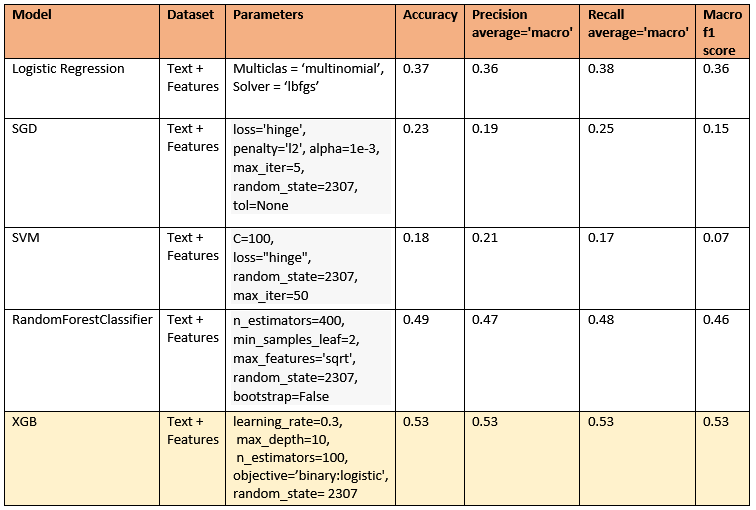

In [ ]:
# load data (text + features) previously created
train_x = pd.read_csv('gdrive/MyDrive/PROJ/DF/train_en2_vectandfeatures.csv')
val_x = pd.read_csv('gdrive/MyDrive/PROJ/DF/validation_en2_vectandfeatures.csv')
#test_x= pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/test_en2.csv') DA CAMBIARE!!!

X_train_vectorized = train_x.drop(train_x.colums[-1],axis=1)
y_train = train_x.iloc[:,-1]
X_val_vectorized = val_x.drop(val_x.colums[-1],axis=1)
y_train = train_x.iloc[:,-1]

In [ ]:
X_train_vectorized = train_x.drop(['label'],axis=1)
y_train = train_x['label']
X_val_vectorized = train_x.drop(['label'],axis=1)
y_val = train_x['label']

### Logistic Regression

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train_vectorized, y_train)
pred_y_lr = model.predict(val_x)

In [ ]:
#Accuracy score
acs_lr=metrics.accuracy_score(y_val, pred_y_lr)

#precision value
pv_lr=metrics.precision_score(y_val, pred_y_lr, average='macro')

#recall value
rcl_lr=metrics.recall_score(y_val, pred_y_lr, average='macro')

#F1 score macro
f1_macro_lr = f1_score(y_val, pred_y_lr, average='macro')

print("Accuracy: ", acs_lr)
print("Precision Value: ", pv_lr)
print("Recall: ", rcl_lr)
print("F1 score macro:", f1_macro_lr)

Accuracy:  0.37864366448542536
Precision Value:  0.3667397602801616
Recall:  0.37928052600066847
F1 score macro: 0.3607978501647615


In [ ]:
X_train_vectorized = train_x.drop(['label'],axis=1)
y_train = train_x['label']

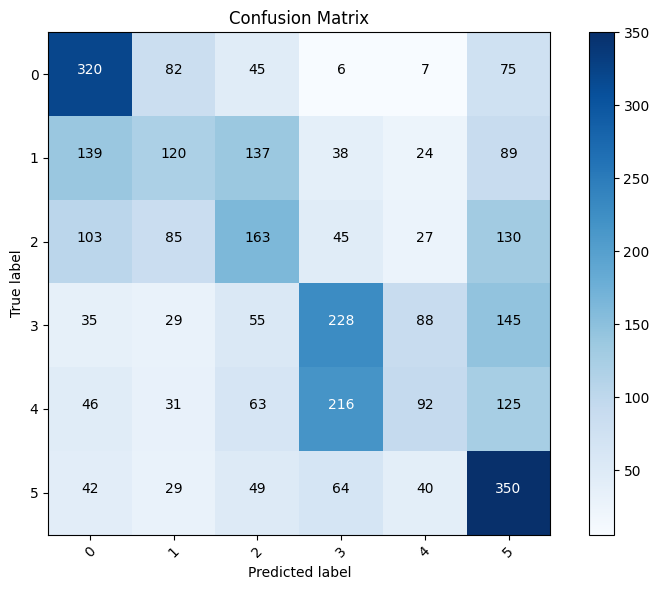

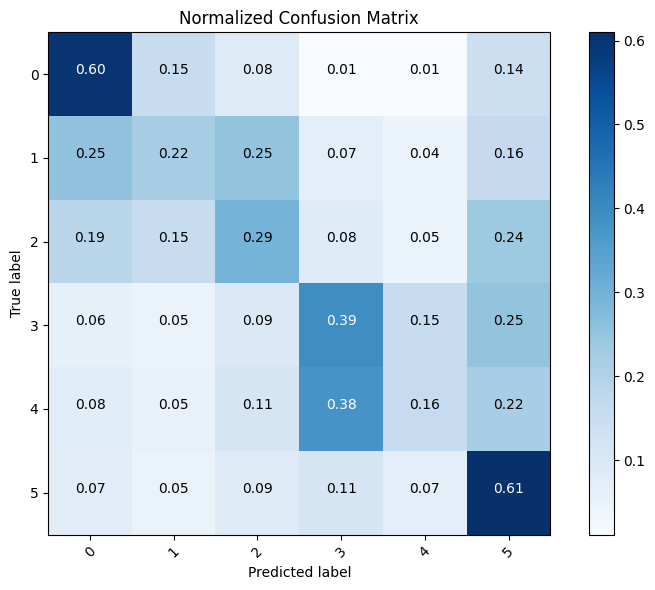

In [ ]:
test_y_en = y_val
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, pred_y_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
class_names=['0','1','2','3','4','5']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



# Normalize confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix_normalized.max() / 2.
for i in range(conf_matrix_normalized.shape[0]):
    for j in range(conf_matrix_normalized.shape[1]):
        plt.text(j, i, format(conf_matrix_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### SGD


In [ ]:
model_sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=5, random_state=2307,tol=None).fit(X_train_vectorized, y_train)
pred_y_sgd = model_sgd.predict(X_val_vectorized)

In [ ]:
#accuracy score
acs_sgd = metrics.accuracy_score(y_val, pred_y_sgd)

#precision value
pv_sgd =metrics.precision_score(y_val, pred_y_sgd, average='macro')

#recall value
rcl_sgd =metrics.recall_score(y_val, pred_y_sgd, average='macro')

f1_macro_sgd = f1_score(y_val, pred_y_sgd, average='macro')

print("Accuracy: ", acs_sgd)
print("Precision Value: ", pv_sgd)
print("Recall: ", rcl_sgd)
print("F1 score macro:", f1_macro_sgd)

Accuracy:  0.23735871505056513
Precision Value:  0.19717525862835975
Recall:  0.24249035141166195
F1 score macro: 0.15418963261793836


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


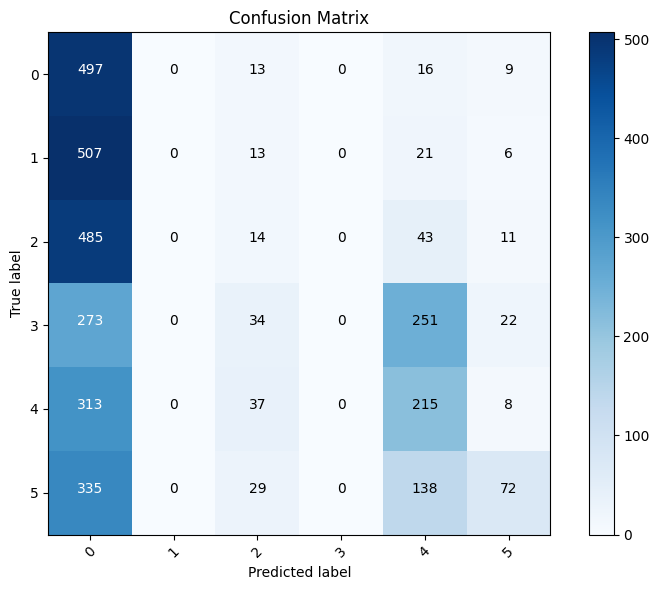

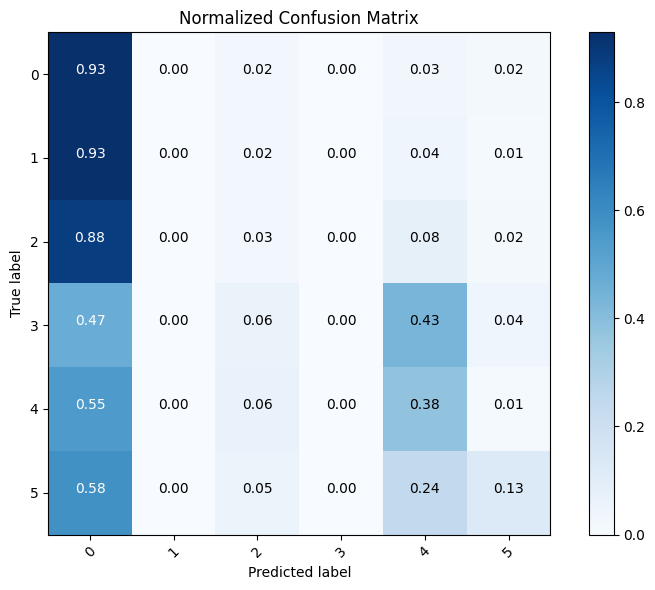

In [ ]:
test_y_en = y_val
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, pred_y_sgd)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
class_names=['0','1','2','3','4','5']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



# Normalize confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix_normalized.max() / 2.
for i in range(conf_matrix_normalized.shape[0]):
    for j in range(conf_matrix_normalized.shape[1]):
        plt.text(j, i, format(conf_matrix_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### SVM

In [ ]:
svm_clf1 = LinearSVC(C=100, loss="hinge", random_state=2307, max_iter=50)
svm_clf1.fit(X_train_vectorized, y_train)

In [ ]:
y_pred1 = svm_clf1.predict(X_val_vectorized)

In [ ]:
# Confusion matrix
#accuracy score
acs_svm = metrics.accuracy_score(y_val, y_pred1)

#precision value
pv_svm =metrics.precision_score(y_val, y_pred1, average='macro')

#recall value
rcl_svm =metrics.recall_score(y_val, y_pred1, average='macro')

f1_macro_svm = f1_score(y_val, y_pred1, average='macro')

print("Accuracy: ", acs_svm)
print("Precision Value: ", pv_svm)
print("Recall: ", rcl_svm)
print("F1 score macro:", f1_macro_svm)


Accuracy:  0.18233194527067223
Precision Value:  0.21388572398432937
Recall:  0.17816953308143235
F1 score macro: 0.07256105463582851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


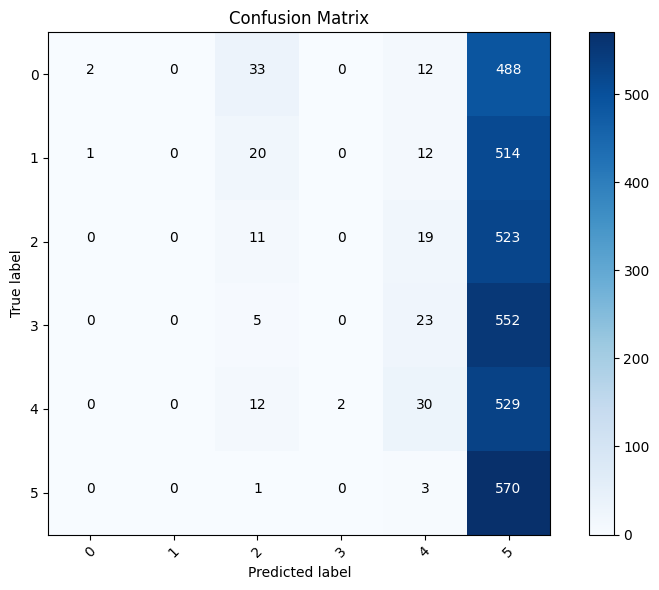

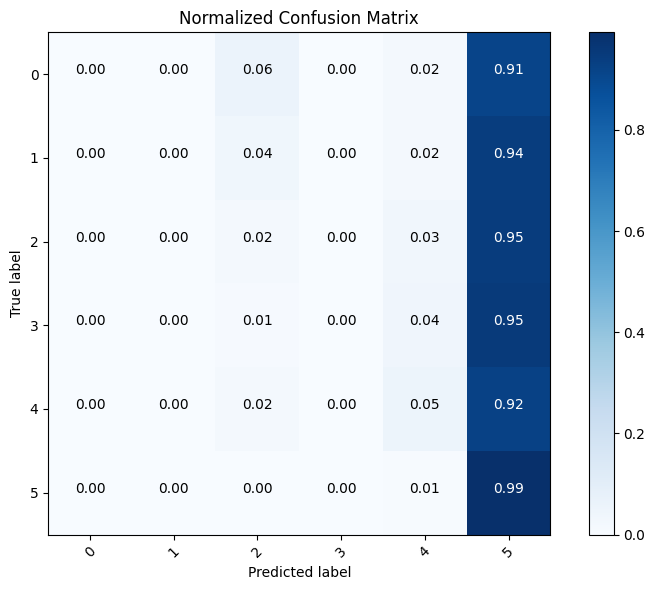

In [ ]:
import matplotlib.pyplot as plt
test_y_en = y_val
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
class_names=['0','1','2','3','4','5']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



# Normalize confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix_normalized.max() / 2.
for i in range(conf_matrix_normalized.shape[0]):
    for j in range(conf_matrix_normalized.shape[1]):
        plt.text(j, i, format(conf_matrix_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### XGB

In [ ]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier()

# Set the hyperparameters
params = {
    'learning_rate': 0.3,
    'max_depth': 10,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'random_state': 2307
}
xgb.set_params(**params)

# Fit the model
xgb.fit(X_train_vectorized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Evaluate the model on VALIDATION SET
y_pred_xgb = xgb.predict(X_val_vectorized)

#accuracy score
acs_xgb=metrics.accuracy_score(y_val, y_pred_xgb)

#precision value
pv_xgb=metrics.precision_score(y_val, y_pred_xgb, average='macro')

#recall value
rcl_xgb=metrics.recall_score(y_val, y_pred_xgb, average='macro')

#
f1_macro_xgb = f1_score(y_val, y_pred_xgb, average='macro')

print("\tON VALIDATION SET", "-------"*2)
print("\tAccuracy: {:.5f}".format(acs_xgb))
print("\tPrecision Value: {:.5f}".format(pv_xgb))
print("\tRecall: {:.5f}".format(rcl_xgb))
print("\tF1 score macro: {:.5f}".format(f1_macro_xgb))

	ON VALIDATION SET --------------
	Accuracy: 0.53361
	Precision Value: 0.53409
	Recall: 0.53429
	F1 score macro: 0.53368


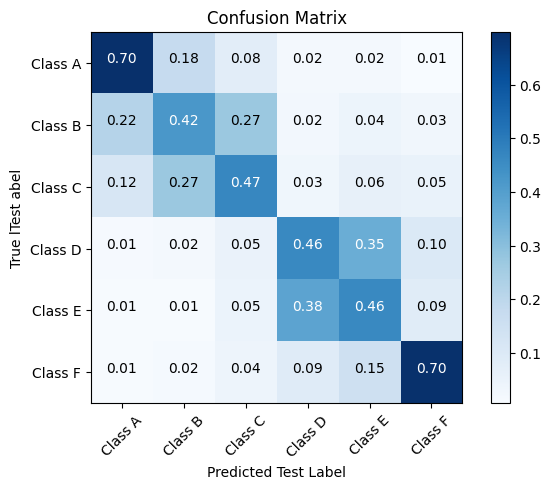

In [ ]:
classes = ['Class A', 'Class B', 'Class C','Class D', 'Class E', 'Class F']

plot_confusion_matrix(y_val, y_pred_xgb, classes)

### Random Forest

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=400,min_samples_leaf=2, max_features='sqrt',  random_state=2307, bootstrap=False) #max_features='sqrt'/'log2', max_depth=10
rnd_clf.fit(train_x_vector_2, train_y_en)
y_pred_rf = rnd_clf.predict(test_x_vector_2)

In [ ]:
#accuracy score
acs_rf=metrics.accuracy_score(test_y_en, y_pred_rf)

#precision value
pv_rf=metrics.precision_score(test_y_en, y_pred_rf, average='macro')

#recall value
rcl_rf=metrics.recall_score(test_y_en, y_pred_rf, average='macro')

f1_macro_rf = f1_score(test_y_en, y_pred_rf, average='macro')


print("Accuracy: ", acs_rf)
print("Precision Value: ", pv_rf)
print("Recall: ", rcl_rf)
print("F1 score macro:", f1_macro_rf)
#print("AUC: ", auc)

Accuracy:  0.4852974697971279
Precision Value:  0.4678109026704571
Recall:  0.4821930604345616
F1 score macro: 0.4606663557381728


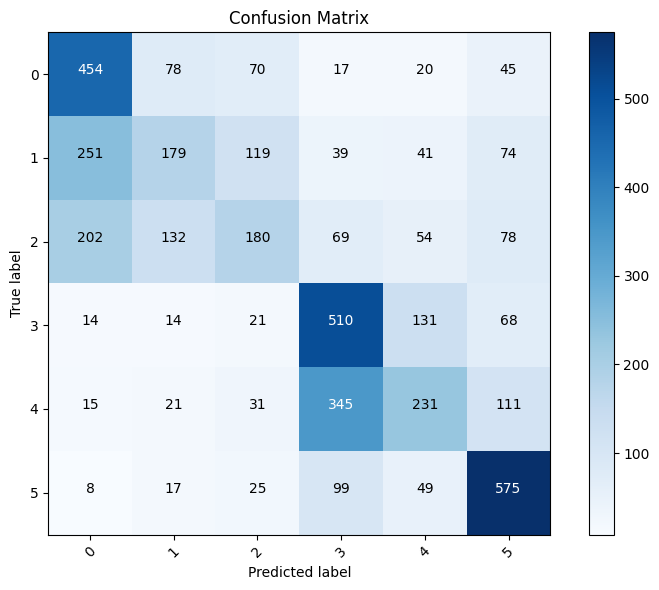

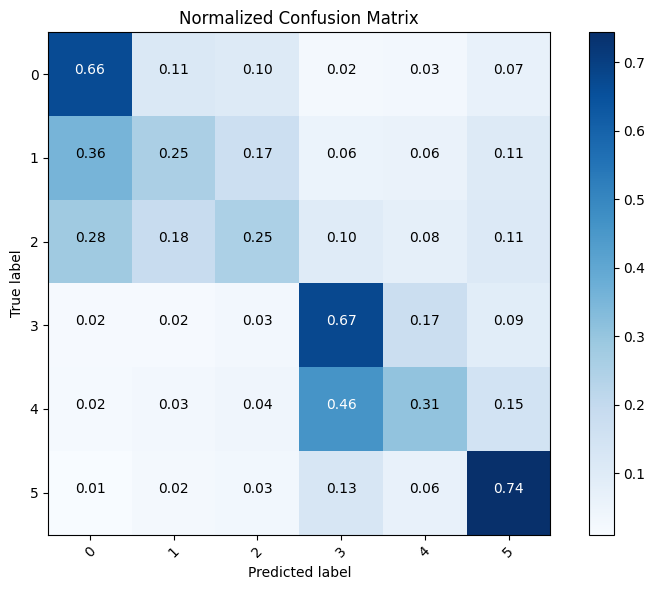

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(test_y_en, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
class_names=['0','1','2','3','4','5']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



# Normalize confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = conf_matrix_normalized.max() / 2.
for i in range(conf_matrix_normalized.shape[0]):
    for j in range(conf_matrix_normalized.shape[1]):
        plt.text(j, i, format(conf_matrix_normalized[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### Transformers Models

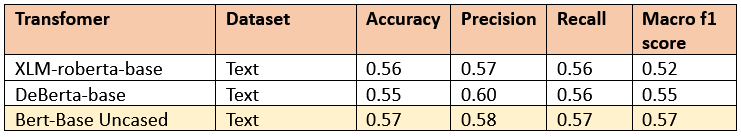

#### XLM-Roberta-Base

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=6)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

In [ ]:
train_texts=train_df2_en.tolist()
test_texts=test_df2_en.tolist()
val_texts = val_df2_en.tolist()

train_labels=train_labels_en
test_labels=test_labels_en
val_labels = val_labels_en

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

encoded_data_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
encoded_data_val = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_labels)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, batch_size=16)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_labels)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, batch_size=16)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_labels)

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, batch_size=16)

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 3

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model.to(device)

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device).long()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model on the test set after each epoch
    model.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")

Epoch 1: Accuracy 0.545
Epoch 2: Accuracy 0.565
Epoch 3: Accuracy 0.559


In [ ]:
#Accuracy score
acs_xlmroberta=metrics.accuracy_score(true_labels, predictions)

#precision value
pv_xlmroberta=metrics.precision_score(true_labels, predictions, average='macro')

#recall value
rcl_xlmroberta=metrics.recall_score(true_labels, predictions, average='macro')

f1_macro_xlmroberta = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_xlmroberta)
print("Precision Value: ", pv_xlmroberta)
print("Recall: ", rcl_xlmroberta)
print("F1 score macro:", f1_macro_xlmroberta)

Accuracy:  0.5585960737656157
Precision Value:  0.5721349897402901
Recall:  0.5600373899903267
F1 score macro: 0.523096925463915


#### DeBerta-Base

In [ ]:
# Load the pre-trained DeBERTa tokenizer and model
model_name = 'microsoft/deberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_deberta = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaForSequenceClassification: ['lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.den

In [ ]:
encoded_data_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_val = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_labels)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, batch_size=16)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_labels)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, batch_size=16)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_labels)

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, batch_size=16)

In [ ]:
optimizer = AdamW(model_deberta.parameters(), lr=1e-5)
epochs = 3

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model_deberta.to(device)

DebertaForSequenceClassification(
  (deberta): DebertaModel(
    (embeddings): DebertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=0)
      (LayerNorm): DebertaLayerNorm()
      (dropout): StableDropout()
    )
    (encoder): DebertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaLayer(
          (attention): DebertaAttention(
            (self): DisentangledSelfAttention(
              (in_proj): Linear(in_features=768, out_features=2304, bias=False)
              (pos_dropout): StableDropout()
              (pos_proj): Linear(in_features=768, out_features=768, bias=False)
              (pos_q_proj): Linear(in_features=768, out_features=768, bias=True)
              (dropout): StableDropout()
            )
            (output): DebertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): DebertaLayerNorm()
              (dropout): StableDropout()
            )
          )
          (

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model_deberta(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model_deberta on the validation set after each epoch
    model_deberta.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model_deberta(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")


Epoch 1: Accuracy 0.556
Epoch 2: Accuracy 0.559
Epoch 3: Accuracy 0.554


In [ ]:
#accuracy score
acs_deroberta=metrics.accuracy_score(true_labels, predictions)

#precision value
pv_deroberta=metrics.precision_score(true_labels, predictions, average='macro')

#recall value
rcl_deroberta=metrics.recall_score(true_labels, predictions, average='macro')

f1_macro_deroberta = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_deroberta)
print("Precision Value: ", pv_deroberta)
print("Recall: ", rcl_deroberta)
print("F1 score macro:", f1_macro_deroberta)

Accuracy:  0.5544318857822724
Precision Value:  0.5917245151903766
Recall:  0.5557091265805513
F1 score macro: 0.5523175027156151


#### Bert-Base Uncased
Pretrained model on English language using a masked language modeling (MLM) objective. This model is uncased: it does not make a difference between english and English.

In [ ]:
print(f'training set has shape {train_df2_en.shape} and is associated to {len(train_labels_en)} labels')
print(f'validation set has shape {val_df2_en.shape} and is associated to {len(val_labels_en)} labels')
print(f'testing set has shape {test_df2_en.shape} and is associated to {len(test_labels_en)} labels')

training set has shape (15691,) and is associated to 15691 labels
validation set has shape (3362,) and is associated to 3362 labels
testing set has shape (3363,) and is associated to 3363 labels


In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader

# Define the BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=6)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Tokenize and encode the text data
train_encodings = tokenizer(train_df2_en.to_list(), truncation=True, padding=True)
val_encodings = tokenizer(val_df2_en.to_list(), truncation=True, padding=True)
test_encodings = tokenizer(test_df2_en.to_list(), truncation=True, padding=True)

# Create PyTorch DataLoader
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(train_labels_en))
val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']),
                            torch.tensor(val_encodings['attention_mask']),
                            torch.tensor(val_labels_en))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             torch.tensor(test_labels_en))

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Fine-tune the BERT model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 5
best_accuracy = 0.0  # Initialize the best accuracy
best_epoch = 0  # Keep track of the best epoch

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Average training loss: {average_loss}')

    # Evaluation on the validation set
    model.eval()
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in val_dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predicted_labels = torch.argmax(logits, dim=1)

            correct_predictions += torch.sum(predicted_labels == labels).item()
            total_predictions += len(labels)

    accuracy = correct_predictions / total_predictions
    print(f'Epoch {epoch + 1}/{num_epochs} - Validation accuracy: {accuracy:.4f}')

    # Check if the current epoch's accuracy is better than the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_epoch = epoch + 1
        torch.save(model.state_dict(), f'best_model.pt')  # Save the best model

    # Check if validation accuracy does not improve
    if epoch > 0 and accuracy <= best_accuracy:
        print('Validation accuracy did not improve. Stopping training.')
        break

print(f'Best model saved at epoch {best_epoch} with accuracy {best_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5 - Average training loss: 0.11083663928146092
Epoch 1/5 - Validation accuracy: 0.5333
Epoch 2/5 - Average training loss: 0.06799127904284753
Epoch 2/5 - Validation accuracy: 0.5678
Validation accuracy did not improve. Stopping training.
Best model saved at epoch 2 with accuracy 0.5678


In [ ]:
# On validation
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1)

        predictions.extend(predicted_labels.tolist())
        true_labels.extend(labels.tolist())

precision = precision_score(true_labels, predictions, average='macro')
accuracy = accuracy_score(true_labels, predictions)
recall = recall_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.5678
Precision: 0.5821
Recall: 0.5671
F1 Score: 0.5669


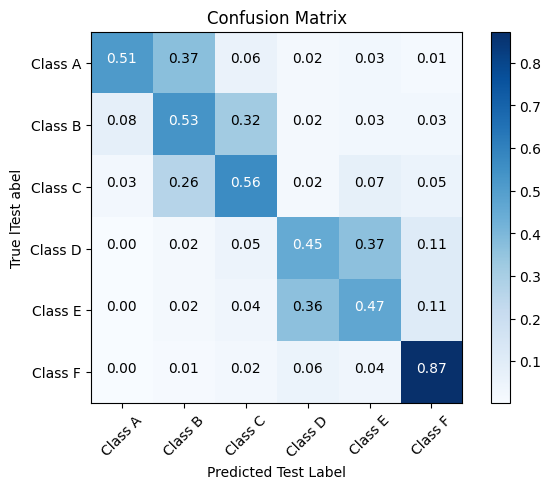

In [ ]:
classes = ['Class A', 'Class B', 'Class C','Class D', 'Class E', 'Class F']

plot_confusion_matrix(true_labels, predictions, classes)

## Final results

These are the final results of the best models on the **test set**:

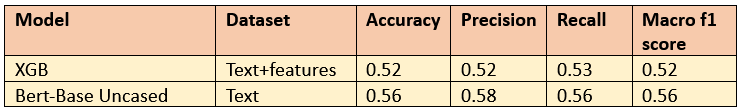

### Best ML models: XGB

In [ ]:
# Evaluate the model on TEST SET
y_pred_xgb = xgb.predict(X_test_vectorized)

#accuracy score
acs_xgb=metrics.accuracy_score(y_test, y_pred_xgb)

#precision value
pv_xgb=metrics.precision_score(y_test, y_pred_xgb, average='macro')

#recall value
rcl_xgb=metrics.recall_score(y_test, y_pred_xgb, average='macro')

#
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print("\tON TEST SET", "-------"*2)
print("\tAccuracy: {:.5f}".format(acs_xgb))
print("\tPrecision Value: {:.5f}".format(pv_xgb))
print("\tRecall: {:.5f}".format(rcl_xgb))
print("\tF1 score macro: {:.5f}".format(f1_macro_xgb))

	ON TEST SET --------------
	Accuracy: 0.52364
	Precision Value: 0.52096
	Recall: 0.52515
	F1 score macro: 0.52194


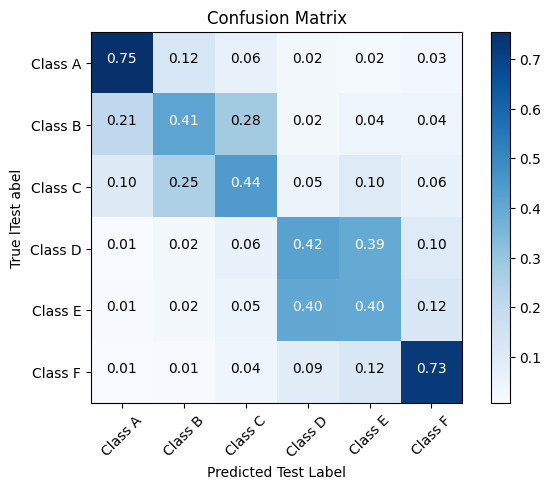

In [ ]:
classes = ['Class A', 'Class B', 'Class C','Class D', 'Class E', 'Class F']

plot_confusion_matrix(y_test, y_pred_xgb, classes)

### Best Transformers model: Bert-Base Uncased

In [ ]:
# On test
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1)

        predictions.extend(predicted_labels.tolist())
        true_labels.extend(labels.tolist())

precision = precision_score(true_labels, predictions, average='macro')
accuracy = accuracy_score(true_labels, predictions)
recall = recall_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.5629
Precision: 0.5782
Recall: 0.5624
F1 Score: 0.5634


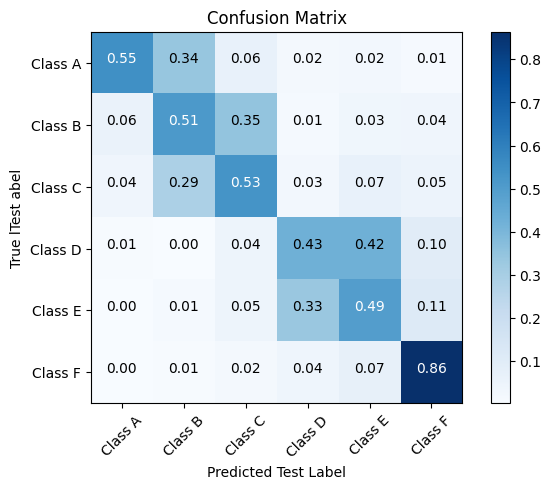

In [ ]:
plot_confusion_matrix(true_labels, predictions, classes)

# **Subtask 2** - *Spanish*

## Data

We followed the same approach of the previous tasks. We inspected the data and extracted all the features that are well presented in task 1 - English, with some minors changes to adapt the language to spanish.

We created and used different datasets:
- Vectorized text
- Features
- Vectorized text and Features

PCA, istead, did not show great results.

Below we inseterd the most relevant information that came up during our analysis

In [ ]:
#Names of files to read from
task2_es_filenameTSV = r"/content/gdrive/MyDrive/NLP/ASS/AUTEXTIFICATION/subtask_2/es/train.tsv"

#Read the spanish dataset
dataset_task2_es=pd.read_csv(task2_es_filenameTSV,sep='\t')

print(dataset_task2_es)

Text(0, 0.5, 'Occurrence')

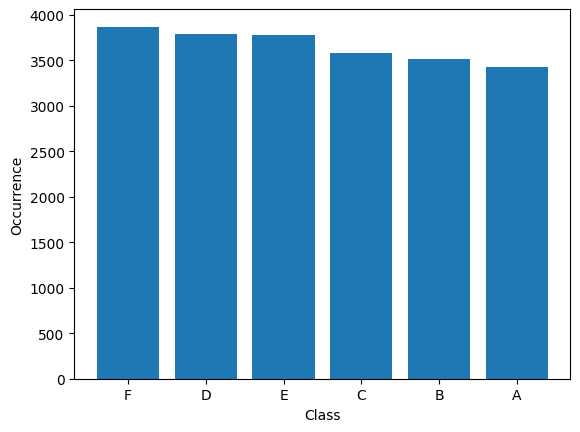

In [ ]:
counts_es = dataset_task2_es['label'].value_counts()
plt.bar(counts_es.index, counts_es.values)
plt.xlabel('Class')
plt.ylabel('Occurrence')

In [ ]:
# First split: split data into training and remaining data
train_df2_es, temp_df2_es, train_labels_es, temp_labels_en = train_test_split(dataset_task2_es['text'], labels_en, test_size=0.3, stratify=labels_en, random_state=2307)

# Second split: split the remaining data into validation and testing
val_df2_es, test_df2_es, val_labels_es, test_labels_es = train_test_split(temp_df2_es, temp_labels_en, test_size=0.5, stratify=temp_labels_en, random_state=2307)



In [ ]:
print(f'training set has shape {train_df2_es.shape} and is associated to {len(train_labels_es)} labels')
print(f'validation set has shape {val_df2_es.shape} and is associated to {len(val_labels_es)} labels')
print(f'testing set has shape {test_df2_es.shape} and is associated to {len(test_labels_es)} labels')

training set has shape (15354,) and is associated to 15354 labels
validation set has shape (3290,) and is associated to 3290 labels
testing set has shape (3291,) and is associated to 3291 labels


We extracted many features using the functions described in Task 1 - English.

## Correlation matrix
We report some highlights, the names and their correlation evaluated on the training data.

In [ ]:
train_df2_es_features = pd.read_csv('/content/gdrive/MyDrive/PROJ/DF/train_df2_es_features.csv')
corr_matrix = train_df2_es_features.corr()

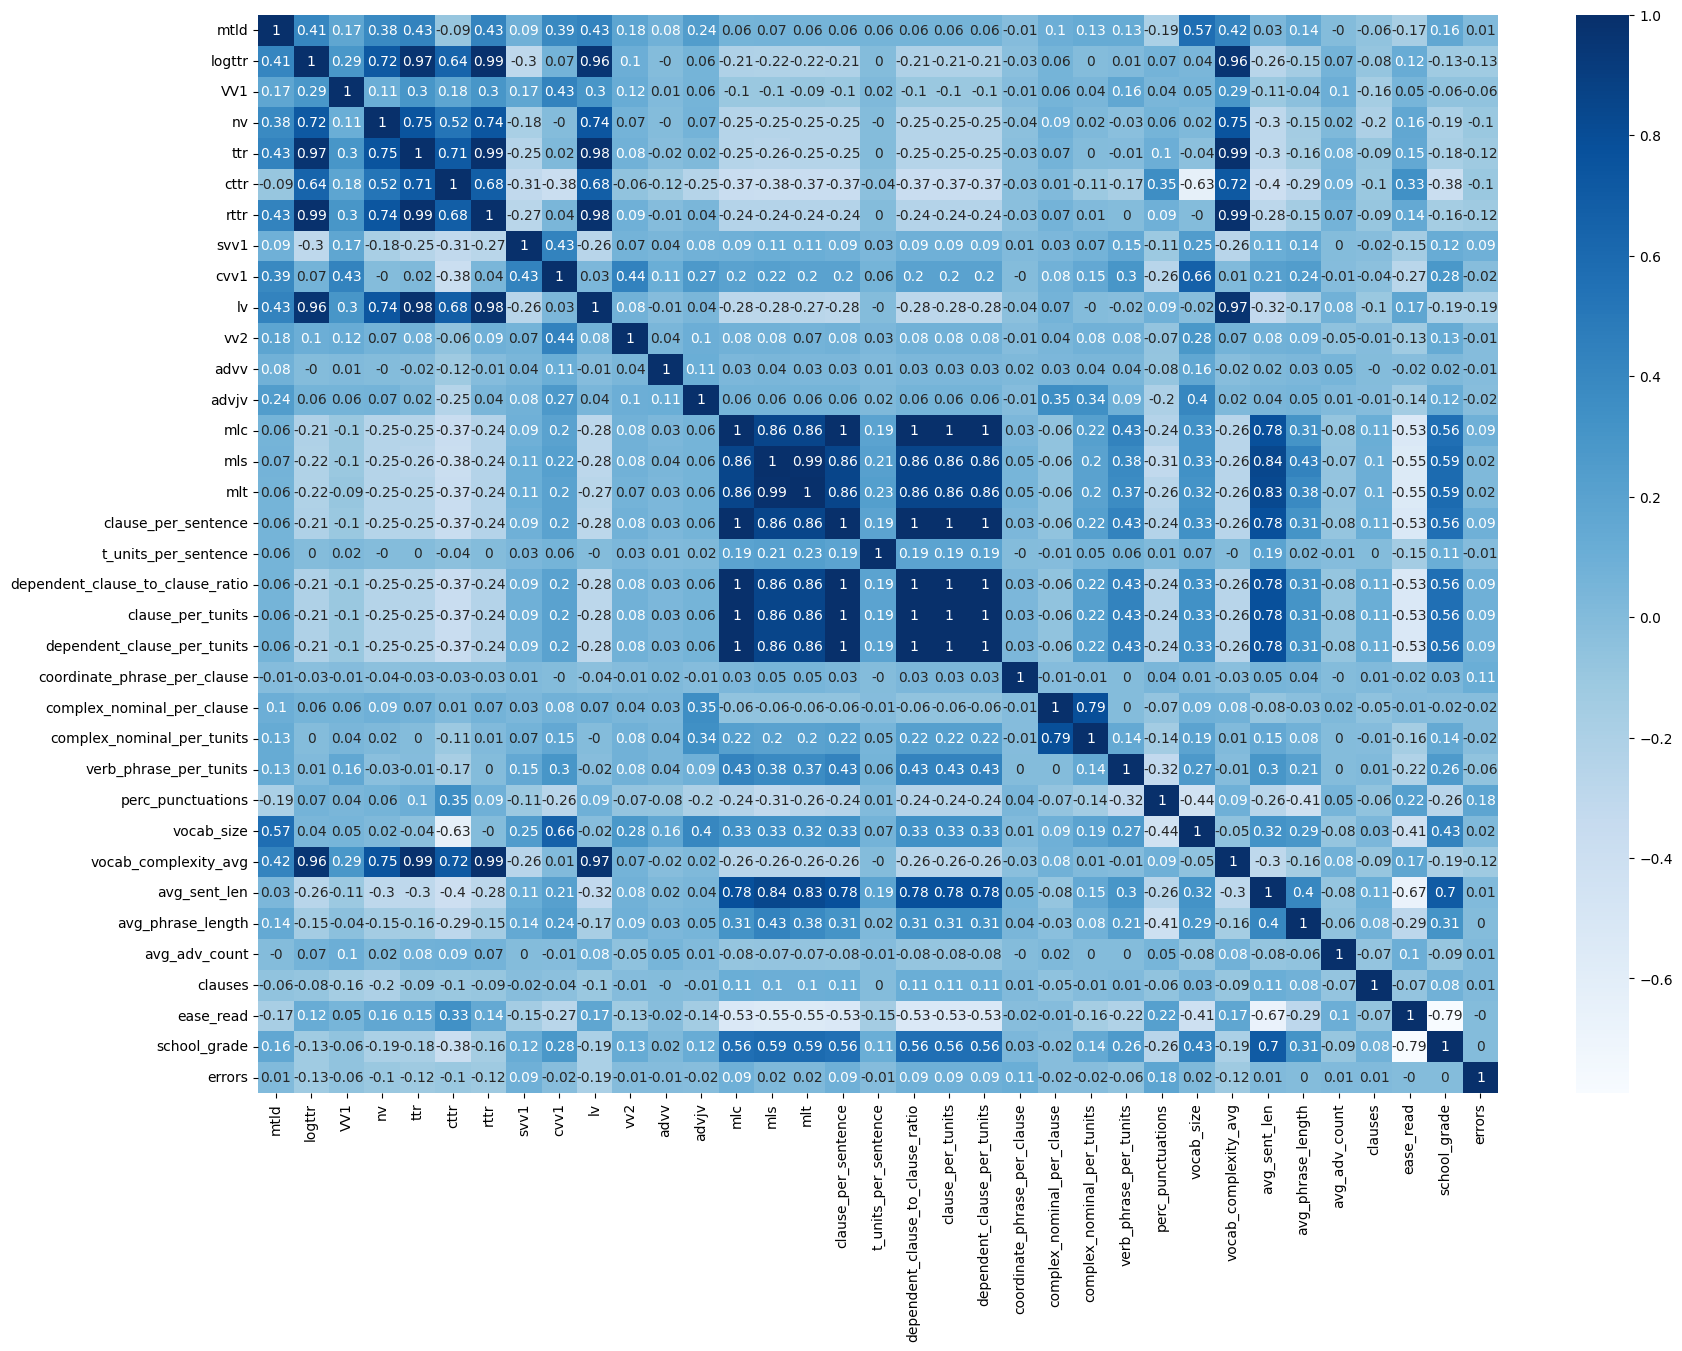

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Show the plot
plt.show()

Some of them are highly correlated so for a pair over a certain threshold (0.70 or -0.70) we removed the feature of the pair that is higher correlated with the rest of features.

This is the final dataset with a reduction of numerical features. In the first 4 columns there are text, and pos, ner and dep tags. Numerical features start from column 5. Total features are 19 (20 with the original text).


For the embedding procedure, we were afraid that the Twitter vocaboualry could work only for english. Ayway for every text we calculated the ratio between the number of embedded words and the number of tokens.
Only for 2.5% of the documents the ratio was under 0.85, so we used the Twitter vocaboulary also on the Spanish dataset.

## Models performance

### ML models perfomances

We applied several models on differents datasets. We propose a summary of the results and the detail of the top performing.

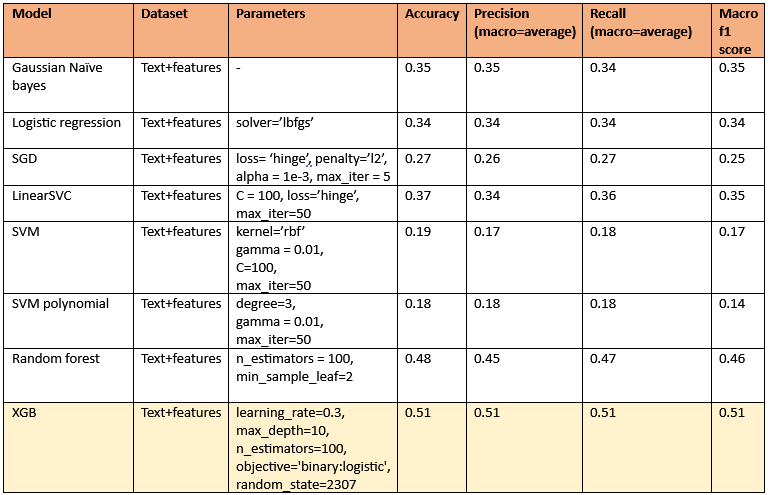

#### XGB (Best ML Model)

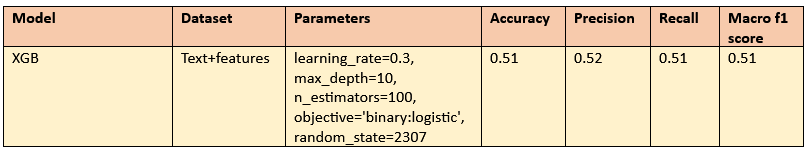

In [ ]:
xgb = XGBClassifier()

# Set the hyperparameters
params = {
    'learning_rate': 0.3,
    'max_depth': 10,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'random_state': 2307
}
xgb.set_params(**params)

# Fit the model
xgb.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred_xgb = xgb.predict(X_val_vectorized)


In [ ]:
#Validation set

#accuracy score
acs_xgb=metrics.accuracy_score(y_val, y_pred_xgb)

#precision value
pv_xgb=metrics.precision_score(y_val, y_pred_xgb, average='macro')

#recall value
rcl_xgb=metrics.recall_score(y_val, y_pred_xgb, average='macro')

f1_macro_xgb = f1_score(y_val, y_pred_xgb, average='macro')


In [ ]:
print("Accuracy: ", acs_xgb)
print("Precision Value: ", pv_xgb)
print("Recall: ", rcl_xgb)
print("F1 score macro:", f1_macro_xgb)

Accuracy:  0.5106382978723404
Precision Value:  0.5148409512833608
Recall:  0.5081466343993544
F1 score macro: 0.5089597935061537


### Transformers performances

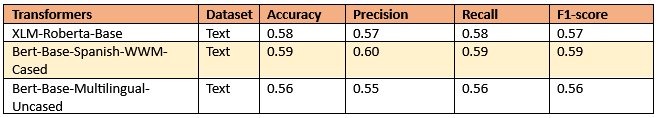

#### Bert-Base-Spanish-WWm-Cased (Best Transformer Model)

In [ ]:
train_texts=train_df2_es.tolist()
test_texts=test_df2_es.tolist()
val_texts = val_df2_es.tolist()

train_labels=train_labels_es
test_labels=test_labels_es
val_labels = val_labels_es

In [ ]:
# Load the pre-trained BETO tokenizer and model
model_name = 'dccuchile/bert-base-spanish-wwm-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_beto = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchi

In [ ]:
encoded_data_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_val = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')
encoded_data_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_labels)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, batch_size=16)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_labels)

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, batch_size=16)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_labels)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, batch_size=16)

In [ ]:
optimizer = AdamW(model_beto.parameters(), lr=1e-5)
epochs = 3

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
model_beto.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
for epoch in range(epochs):
    for batch in dataloader_train:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model_beto(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate the model_beto on the validation set after each epoch
    model_beto.eval()

    predictions = []
    true_labels = []

    for batch in dataloader_val:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model_beto(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Epoch {epoch + 1}: Accuracy {accuracy:.3f}")


Epoch 1: Accuracy 0.564
Epoch 2: Accuracy 0.598
Epoch 3: Accuracy 0.595


In [ ]:
#accuracy score
acs_beto=metrics.accuracy_score(true_labels, predictions)

#precision value
pv_beto=metrics.precision_score(true_labels, predictions, average='macro')

#recall value
rcl_beto=metrics.recall_score(true_labels, predictions, average='macro')

f1_beto = f1_score(true_labels, predictions, average='macro')

print("Accuracy: ", acs_beto)
print("Precision Value: ", pv_beto)
print("Recall: ", rcl_beto)
print("F1 score macro:", f1_beto)

Accuracy:  0.5954407294832826
Precision Value:  0.6006624140443134
Recall:  0.5938108111736622
F1 score macro: 0.589408168365471


## Final Results

These are the final results of the best models on the **test set**:

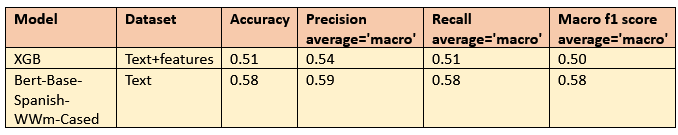

### Best ML models: XGB

In [ ]:
#Test set

y_pred_test_xgb = xgb.predict(X_test_vectorized)


#accuracy score
acs_xgb=metrics.accuracy_score(y_test, y_pred_test_xgb)

#precision value
pv_xgb=metrics.precision_score(y_test, y_pred_test_xgb, average='macro')

#recall value
rcl_xgb=metrics.recall_score(y_test, y_pred_test_xgb, average='macro')

f1_macro_xgb = f1_score(y_test, y_pred_test_xgb, average='macro')


print("Accuracy: ", acs_xgb)
print("Precision Value: ", pv_xgb)
print("Recall: ", rcl_xgb)
print("F1 score macro:", f1_macro_xgb)

Accuracy:  0.5059502994723404
Precision Value:  0.5361855072833608
Recall:  0.5081466343993544
F1 score macro: 0.5034031145241538


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)


    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Test label')
    plt.xlabel('Predicted Test Label')

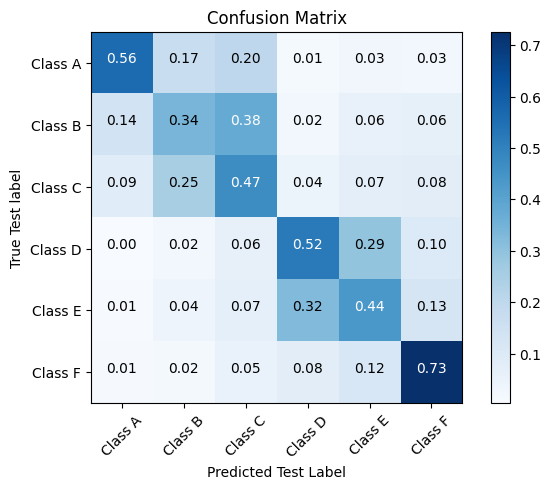

In [ ]:
classes = ['Class A', 'Class B', 'Class C','Class D', 'Class E', 'Class F']

plot_confusion_matrix(y_test, y_pred_test_xgb, classes)

### Best Transformer Model: Bert-Base-Spanish-WWm-Cased (Best Model)

In [ ]:
# Test Set
predictions = []
true_labels = []

for batch in dataloader_test:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model_beto(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())


In [ ]:
#Accuracy score
acs_Bert_Base=metrics.accuracy_score(true_labels, predictions)

#precision value
pv_Bert_Base=metrics.precision_score(true_labels, predictions, average='macro')

#recall value
rcl_Bert_Base=metrics.recall_score(true_labels, predictions, average='macro')

f1_macro_Bert_Base = f1_score(true_labels, predictions, average='macro')

print("Test Accuracy: ", acs_Bert_Base)
print("Test Precision Value: ", pv_Bert_Base)
print("Test Recall: ", rcl_Bert_Base)
print("Test F1 score macro:", f1_macro_Bert_Base)

Test Accuracy:  0.5809784260103312
Test Precision Value:  0.5858457343112612
Test Recall:  0.5792505081800795
Test F1 score macro: 0.5751522384199647


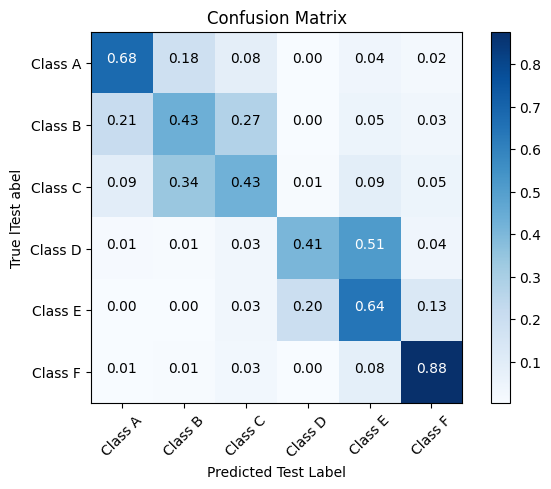

In [ ]:
classes = ['Class A', 'Class B', 'Class C','Class D', 'Class E', 'Class F']

plot_confusion_matrix(true_labels, predictions, classes)

